In [1]:
import numpy as np
from autots import AutoTS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных (датафрейм с колонками 'date' и 'value')
btc = pd.read_csv('/Users/nikita/Desktop/monero/BTC.csv', sep=',', encoding='utf-8')

In [3]:
btc['close'] = btc['close'].str.replace('.', '')
btc['high'] = btc['high'].str.replace('.', '')
btc['low'] = btc['low'].str.replace('.', '')
btc['open'] = btc['open'].str.replace('.', '')
btc['volume'] = btc['volume'].str.replace('.', '')

btc['close'] = btc['close'].str.replace(',', '.').astype(float)
btc['high'] = btc['high'].str.replace(',', '.').astype(float)
btc['low'] = btc['low'].str.replace(',', '.').astype(float)
btc['open'] = btc['open'].str.replace(',', '.').astype(float)
btc['volume'] = btc['volume'].str.replace(',', '.')  # Remove commas

btc['volume'] = btc['volume'].str.replace('K', 'e3')  # Replace 'K' with 'e3'
btc['volume'] = btc['volume'].str.replace('M', 'e6')  # Replace 'M' with 'e6'
btc['volume'] = btc['volume'].str.replace('B', 'e9')  # Replace 'B' with 'e9'
btc['volume'] = btc['volume'].astype(float)  # Convert to float

/var/folders/d3/gkk0_sdx779g33ctfnpn540m0000gn/T/ipykernel_11034/493286543.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  btc['close'] = btc['close'].str.replace('.', '')
/var/folders/d3/gkk0_sdx779g33ctfnpn540m0000gn/T/ipykernel_11034/493286543.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  btc['high'] = btc['high'].str.replace('.', '')
/var/folders/d3/gkk0_sdx779g33ctfnpn540m0000gn/T/ipykernel_11034/493286543.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  btc['low'] = btc['low'].str.replace('.', '')
/var

In [4]:
btc

,date,close,high,low,open,volume
0,27.09.2012,12.3,12.3,12.4,12.2,19330.0
1,28.09.2012,12.4,12.3,12.4,12.1,26680.0
2,29.09.2012,12.4,12.4,12.5,12.2,17060.0
3,30.09.2012,12.4,12.4,12.4,12.3,7790.0
4,01.10.2012,12.4,12.4,12.5,12.3,24830.0
...,...,...,...,...,...,...
4591,23.04.2025,93697.7,93442.2,94462.6,91963.4,90350.0
4592,24.04.2025,93980.3,93696.3,94001.0,91673.0,66680.0
4593,25.04.2025,94676.9,93979.4,95718.6,92867.2,92040.0
4594,26.04.2025,94631.4,94669.3,95207.0,93891.8,33770.0


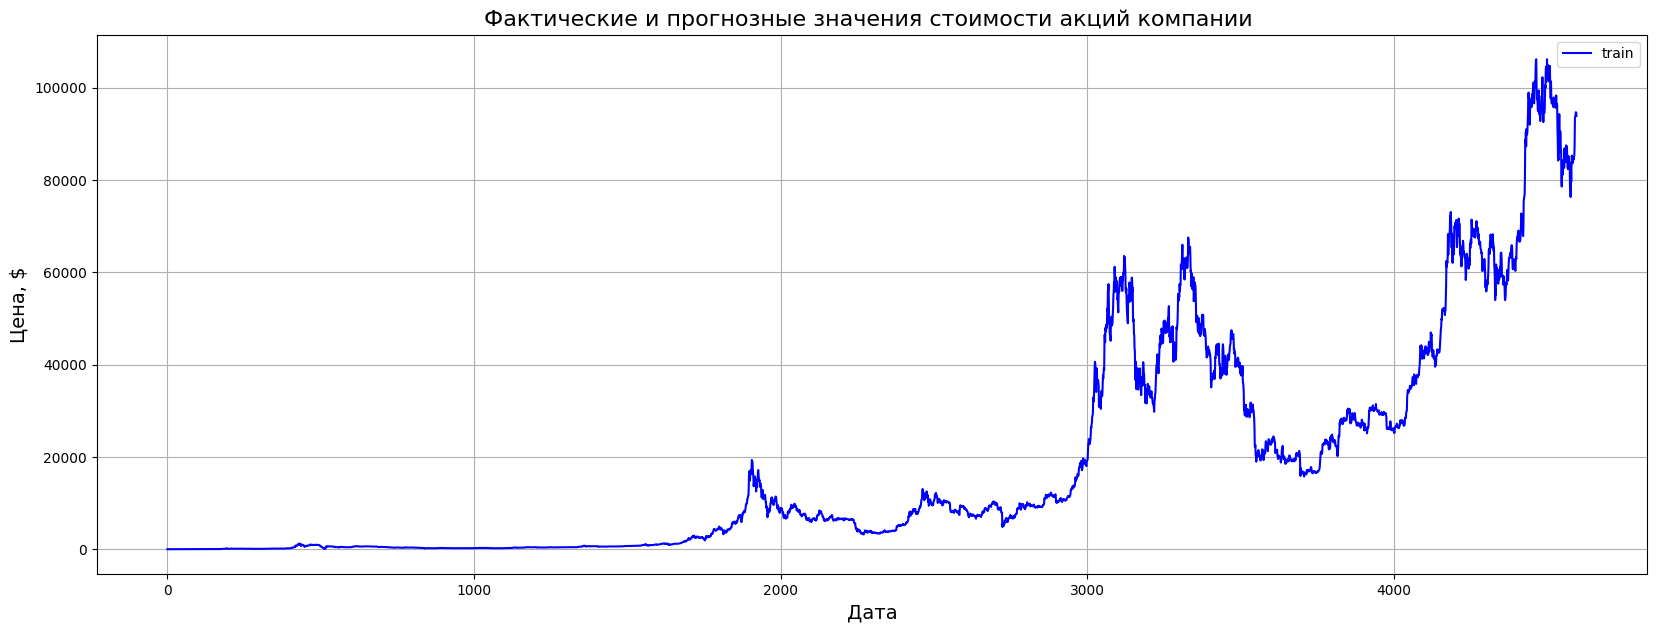

In [5]:
plt.figure(figsize=(20,7))
plt.plot(btc['close'], color = 'blue', label='train')
plt.legend()
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена, $', fontsize = 14)
plt.grid()
plt.title('Фактические и прогнозные значения стоимости акций компании ', fontsize = 16)
plt.show()

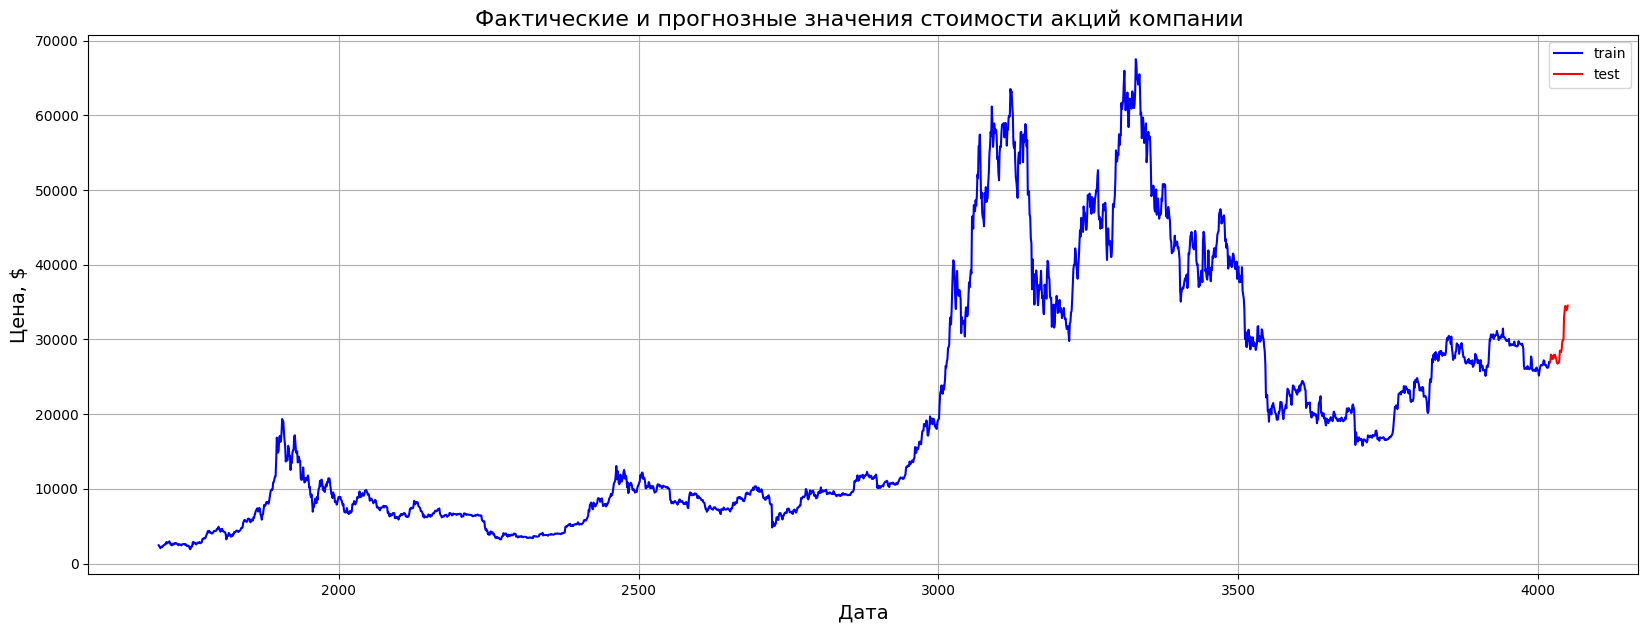

In [6]:
num_shape = 4020

train = btc.iloc[1700:num_shape]
test = btc.iloc[num_shape:num_shape+30]

plt.figure(figsize=(20,7))
plt.plot(train['close'], color = 'blue', label='train')
plt.plot(test['close'], color = 'red', label='test')
plt.legend()
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена, $', fontsize = 14)
plt.grid()
plt.title('Фактические и прогнозные значения стоимости акций компании ', fontsize = 16)
plt.show()

### AutoMl

In [7]:
model_autoML = AutoTS(
    forecast_length=30,          # Прогноз на 30 периодов вперёд
    frequency='D',               # Частота данных ('D' — daily, 'M' — monthly и т.д.)
    ensemble='simple',           # Тип ансамбля ('simple', 'weighted')
    model_list='all',            # Тестировать все модели (вместо устаревшего 'models')
    max_generations=5,           # Число итераций оптимизации
    num_validations=2,           # Количество валидаций
    validation_method='backwards' # Метод валидации ('backwards', 'seasonal')
)

Using 5 cpus for n_jobs.


/Users/nikita/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
model_autoML = model_autoML.fit(train, value_col='close', date_col='date')

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/shaping.py:183: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_long[date_col] = pd.to_datetime(df_long[date_col])


Data frequency is: None, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25071D+03    |proj g|=  2.00774D+04

At iterate    1    f=  1.44433D+01    |proj g|=  1.14866D+01

At iterate    2    f=  1.38912D+01    |proj g|=  9.95633D+00

At iterate    3    f=  1.22427D+01    |proj g|=  5.41167D+00

At iterate    4    f=  1.13337D+01    |proj g|=  3.21222D+00

At iterate    5    f=  1.03125D+01    |proj g|=  1.52600D+00

At iterate    6    f=  9.99130D+00    |proj g|=  6.49259D-01

At iterate    7    f=  9.84566D+00    |proj g|=  3.54818D-01

At iterate    8    f=  9.77939D+00    |proj g|=  3.89175D-01

At iterate    9    f=  9.71948D+00    |proj g|=  2.27822D-01

At iterate   10    f=  9.69499D+00    |proj g|=  1.06931D-01

At iterate   11    f=  9.68350D+00    |proj g|=  8.38244D-02

At iterate   12    f=  9.66222D+00    |proj g|=  8.81818D-02

At iterate   13    f=  9.6

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5
Epoch 1/50


/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4297
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4280  
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4269  
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.4273
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4268 
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4265  
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4272  
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4257  
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.4256
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4254  
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4261  
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.4255
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4269  
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4253  
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4253  
Ep

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 42 with model DatepartRegression in generation 0 of 5
Model Number: 43 with model UnobservedComponents in generation 0 of 5
Model Number: 44 with model UnobservedComponents in generation 0 of 5
Model Number: 45 with model ETS in generation 0 of 5
Model Number: 46 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 46 in generation 0: VECM
Model Number: 47 with model ARDL in generation 0 of 5
Model Number: 48 with model MultivariateMotif in generation 0 of 5
Model Number: 49 with model MultivariateMotif in generation 0 of 5
Model Number: 50 with model UnivariateMotif in generation 0 of 5
Model Number: 51 with model UnivariateMotif in generation 0 of 5
Model Number: 52 with model SectionalMotif in generation 0 of 5
Model Number: 53 with model SectionalMotif in generation 0 of 5
Model Number: 54 with model MultivariateRegression in generation 0 of 5
Template Eval Error: AttributeError("module 'numba' has no attribut

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X do

Model Number: 63 with model DynamicFactor in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not passed") in model 63 in generation 0: DynamicFactor
Model Number: 64 with model RollingRegression in generation 0 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Model Number: 65 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 65 in generation 0: ARCH
Model Number: 66 with model Cassandra in generation 0 of 5
Model Number: 67 with model SeasonalityMotif in generation 0 of 5
Model Number: 68 with model TiDE in generation 0 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embeddings'] when minimizing the loss. If using `model

epoch 0 with mape 0.061499692499637604 and rmse 0.05536051094532013


1it [00:00, 74.37it/s]
1it [00:00, 77.14it/s]
1it [00:00, 77.74it/s]
0it [00:00, ?it/s]2025-05-02 16:26:27.962379: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 75.14it/s]
1it [00:00, 76.72it/s]
1it [00:00, 71.72it/s]
1it [00:00, 74.69it/s]
1it [00:00, 76.39it/s]
1it [00:00, 76.67it/s]
1it [00:00, 78.82it/s]


epoch 1 with mape 0.06114960461854935 and rmse 0.05500519648194313


1it [00:00, 75.85it/s]
1it [00:00, 23.99it/s]
1it [00:00, 73.74it/s]
1it [00:00, 74.97it/s]
1it [00:00, 76.77it/s]
1it [00:00, 72.20it/s]
1it [00:00, 76.63it/s]
1it [00:00, 78.45it/s]
0it [00:00, ?it/s]2025-05-02 16:26:31.521110: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 77.48it/s]
1it [00:00, 74.00it/s]


epoch 2 with mape 0.06127902492880821 and rmse 0.0550653412938118


1it [00:00, 75.98it/s]
1it [00:00, 70.96it/s]
1it [00:00, 76.36it/s]
1it [00:00, 76.26it/s]
1it [00:00, 76.07it/s]
1it [00:00, 77.50it/s]
1it [00:00, 71.28it/s]
1it [00:00, 74.44it/s]
1it [00:00, 75.35it/s]
1it [00:00, 76.77it/s]


epoch 3 with mape 0.0613335520029068 and rmse 0.055083345621824265


1it [00:00, 76.10it/s]
1it [00:00, 73.87it/s]
1it [00:00, 74.24it/s]
1it [00:00, 75.74it/s]
1it [00:00, 76.79it/s]
1it [00:00, 73.88it/s]
1it [00:00, 76.66it/s]
1it [00:00, 74.50it/s]
1it [00:00, 77.75it/s]
1it [00:00, 79.61it/s]


epoch 4 with mape 0.061088163405656815 and rmse 0.054953306913375854


1it [00:00, 74.05it/s]
1it [00:00, 75.34it/s]
1it [00:00, 74.54it/s]
1it [00:00, 71.29it/s]
1it [00:00, 76.02it/s]
1it [00:00, 29.01it/s]
1it [00:00, 71.30it/s]
0it [00:00, ?it/s]2025-05-02 16:26:41.690304: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 76.29it/s]
1it [00:00, 77.70it/s]
1it [00:00, 79.20it/s]


epoch 5 with mape 0.06113544479012489 and rmse 0.05498407781124115


1it [00:00, 75.48it/s]
1it [00:00, 74.50it/s]
1it [00:00, 75.67it/s]
1it [00:00, 74.83it/s]
1it [00:00, 75.03it/s]
1it [00:00, 75.18it/s]
1it [00:00, 74.36it/s]
1it [00:00, 74.44it/s]
1it [00:00, 73.61it/s]
1it [00:00, 80.06it/s]


epoch 6 with mape 0.061104413121938705 and rmse 0.05496998876333237


1it [00:00, 75.28it/s]
1it [00:00, 75.38it/s]
1it [00:00, 74.51it/s]
1it [00:00, 56.23it/s]
1it [00:00, 74.95it/s]
1it [00:00, 76.02it/s]
1it [00:00, 75.38it/s]
1it [00:00, 76.55it/s]
1it [00:00, 78.54it/s]
1it [00:00, 73.76it/s]


epoch 7 with mape 0.06116456910967827 and rmse 0.054999854415655136


1it [00:00, 73.98it/s]
1it [00:00, 76.69it/s]
1it [00:00, 76.51it/s]
1it [00:00, 24.50it/s]
1it [00:00, 73.17it/s]
1it [00:00, 73.65it/s]
1it [00:00, 74.72it/s]
1it [00:00, 77.15it/s]
1it [00:00, 76.58it/s]
1it [00:00, 73.63it/s]


epoch 8 with mape 0.061164334416389465 and rmse 0.0550006628036499


1it [00:00, 78.46it/s]
1it [00:00, 71.40it/s]
1it [00:00, 76.18it/s]
1it [00:00, 77.29it/s]
1it [00:00, 76.30it/s]
1it [00:00, 77.57it/s]
1it [00:00, 74.34it/s]
1it [00:00, 74.91it/s]
1it [00:00, 76.05it/s]
1it [00:00, 77.30it/s]


epoch 9 with mape 0.061159756034612656 and rmse 0.05499912425875664


1it [00:00, 78.60it/s]
1it [00:00, 75.12it/s]
1it [00:00, 71.73it/s]
1it [00:00, 76.67it/s]
1it [00:00, 76.59it/s]
1it [00:00, 76.22it/s]
1it [00:00, 78.23it/s]
1it [00:00, 74.82it/s]
1it [00:00, 75.30it/s]
1it [00:00, 76.73it/s]


epoch 10 with mape 0.06114653870463371 and rmse 0.054993223398923874


1it [00:00, 77.43it/s]
1it [00:00, 25.52it/s]
1it [00:00, 72.92it/s]
1it [00:00, 78.08it/s]
1it [00:00, 76.58it/s]
0it [00:00, ?it/s]2025-05-02 16:27:01.755576: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 76.67it/s]
1it [00:00, 77.66it/s]
1it [00:00, 75.50it/s]
1it [00:00, 77.28it/s]
1it [00:00, 75.65it/s]


epoch 11 with mape 0.06115039810538292 and rmse 0.05499538779258728


1it [00:00, 75.67it/s]
1it [00:00, 73.07it/s]
1it [00:00, 74.86it/s]
1it [00:00, 77.14it/s]
1it [00:00, 23.65it/s]
1it [00:00, 75.13it/s]
1it [00:00, 78.38it/s]
1it [00:00, 77.99it/s]
1it [00:00, 79.50it/s]
1it [00:00, 75.30it/s]


epoch 12 with mape 0.06114281713962555 and rmse 0.05499193072319031


1it [00:00, 77.29it/s]
1it [00:00, 74.39it/s]
1it [00:00, 75.48it/s]
1it [00:00, 77.26it/s]
1it [00:00, 74.89it/s]
1it [00:00, 76.00it/s]
1it [00:00, 80.52it/s]
1it [00:00, 79.11it/s]
1it [00:00, 78.19it/s]
1it [00:00, 77.26it/s]


epoch 13 with mape 0.06114351376891136 and rmse 0.05499234050512314


1it [00:00, 75.11it/s]
1it [00:00, 73.51it/s]
1it [00:00, 76.55it/s]
1it [00:00, 76.77it/s]
1it [00:00, 78.69it/s]
1it [00:00, 78.04it/s]
1it [00:00, 77.91it/s]
1it [00:00, 78.51it/s]
1it [00:00, 78.18it/s]
1it [00:00, 80.15it/s]


epoch 14 with mape 0.061146341264247894 and rmse 0.054993730038404465


1it [00:00, 77.63it/s]
1it [00:00, 75.99it/s]
1it [00:00, 76.34it/s]
1it [00:00, 76.63it/s]
1it [00:00, 29.87it/s]
1it [00:00, 70.85it/s]
1it [00:00, 73.07it/s]
1it [00:00, 74.05it/s]
1it [00:00, 78.21it/s]
1it [00:00, 76.65it/s]


epoch 15 with mape 0.061146389693021774 and rmse 0.05499374866485596


1it [00:00, 77.02it/s]
1it [00:00, 72.61it/s]
1it [00:00, 75.99it/s]
1it [00:00, 75.77it/s]
1it [00:00, 75.19it/s]
1it [00:00, 78.87it/s]
1it [00:00, 76.30it/s]
1it [00:00, 76.27it/s]
1it [00:00, 77.49it/s]
1it [00:00, 79.03it/s]


epoch 16 with mape 0.061146389693021774 and rmse 0.05499374866485596


1it [00:00, 75.07it/s]
1it [00:00, 74.64it/s]
1it [00:00, 75.81it/s]
1it [00:00, 77.20it/s]
1it [00:00, 77.45it/s]
1it [00:00, 73.97it/s]
1it [00:00, 76.73it/s]
1it [00:00, 77.26it/s]
1it [00:00, 78.76it/s]
1it [00:00, 78.49it/s]


Model Number: 69 with model Cassandra in generation 0 of 5
Model Number: 70 with model Cassandra in generation 0 of 5
Model Number: 71 with model NeuralForecast in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralforecast'") in model 71 in generation 0: NeuralForecast
Model Number: 72 with model Cassandra in generation 0 of 5
Model Number: 73 with model DMD in generation 0 of 5
Model Number: 74 with model DMD in generation 0 of 5
Model Number: 75 with model NVAR in generation 0 of 5
Model Number: 76 with model BallTreeMultivariateMotif in generation 0 of 5
Model Number: 77 with model SectionalMotif in generation 0 of 5
Model Number: 78 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 78 in generation 0: FBProphet
Model Number: 79 with model ARDL in generation 0 of 5
Model Number: 80 with model FFT in generation 0 of 5
Model Number: 81 with model BasicLinearModel in generation 0 o

/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 100 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78563D-01    |proj g|=  3.12263D-01

At iterate    1    f= -1.79708D-01    |proj g|=  1.30428D-01

At iterate    2    f= -1.79984D-01    |proj g|=  6.45749D-02

At iterate    3    f= -1.80260D-01    |proj g|=  6.35653D-02

At iterate    4    f= -1.81846D-01    |proj g|=  2.36950D-01

At iterate    5    f= -1.84796D-01    |proj g|=  4.36522D-01

At iterate    6    f= -1.91330D-01    |proj g|=  6.55759D-01

At iterate    7    f= -2.02064D-01    |proj g|=  7.44822D-01

At iterate    8    f= -2.16732D-01    |proj g|=  5.01713D-01

At iterate    9    f= -2.24312D-01    |proj g|=  4.12726D-02

At iterate   10    f= -2.25052D-01    |proj g|=  1.67121D-01


 This problem is unconstrained.



At iterate   11    f= -2.25871D-01    |proj g|=  1.99479D-01

At iterate   12    f= -2.27483D-01    |proj g|=  1.24864D-01

At iterate   13    f= -2.29057D-01    |proj g|=  1.96538D-02

At iterate   14    f= -2.30741D-01    |proj g|=  7.47073D-02

At iterate   15    f= -2.33851D-01    |proj g|=  1.17171D-01

At iterate   16    f= -2.34130D-01    |proj g|=  4.21230D-02

At iterate   17    f= -2.34305D-01    |proj g|=  1.14332D-02

At iterate   18    f= -2.34346D-01    |proj g|=  9.74924D-04

At iterate   19    f= -2.34351D-01    |proj g|=  1.51774D-04

At iterate   20    f= -2.34351D-01    |proj g|=  1.61483D-04

At iterate   21    f= -2.34352D-01    |proj g|=  3.75763D-04

At iterate   22    f= -2.34354D-01    |proj g|=  5.96486D-04

At iterate   23    f= -2.34356D-01    |proj g|=  8.35778D-04

At iterate   24    f= -2.34357D-01    |proj g|=  4.57513D-04

At iterate   25    f= -2.34358D-01    |proj g|=  8.08142D-05

At iterate   26    f= -2.34358D-01    |proj g|=  3.09766D-06

       

 This problem is unconstrained.



At iterate    1    f=  2.67422D-01    |proj g|=  6.45841D-02

At iterate    2    f=  2.65524D-01    |proj g|=  1.37467D-01

At iterate    3    f=  2.58812D-01    |proj g|=  3.41429D-01

At iterate    4    f=  2.45979D-01    |proj g|=  4.81347D-01

At iterate    5    f=  2.33095D-01    |proj g|=  2.89390D-01

At iterate    6    f=  2.25859D-01    |proj g|=  7.35563D-02

At iterate    7    f=  2.22664D-01    |proj g|=  2.57925D-02

At iterate    8    f=  2.20546D-01    |proj g|=  4.63777D-02

At iterate    9    f=  2.18046D-01    |proj g|=  1.53492D-02

At iterate   10    f=  2.16308D-01    |proj g|=  3.24890D-02

At iterate   11    f=  2.15298D-01    |proj g|=  3.36365D-02

At iterate   12    f=  2.15124D-01    |proj g|=  5.11969D-02

At iterate   13    f=  2.14559D-01    |proj g|=  2.05980D-02

At iterate   14    f=  2.14154D-01    |proj g|=  9.60256D-04

At iterate   15    f=  2.13938D-01    |proj g|=  1.24926D-03

At iterate   16    f=  2.13190D-01    |proj g|=  3.02108D-02

At iter

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+10, tolerance: 5.535e+07
  model = cd_fast.enet_coordinate_descent(


Model Number: 105 with model UnobservedComponents in generation 0 of 5
Model Number: 106 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 106 in generation 0: VECM
Model Number: 107 with model DynamicFactor in generation 0 of 5
Template Eval Error: ValueError('The dynamic factors model is only valid for multivariate time series.') in model 107 in generation 0: DynamicFactor
Model Number: 108 with model MotifSimulation in generation 0 of 5
Model Number: 109 with model WindowRegression in generation 0 of 5
Model Number: 110 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 110 in generation 0: VAR
Model Number: 111 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 111 in generation 0: DatepartRegression
Model Number: 112 with model UnivariateRegression in generation 0 o

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 132 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 132 in generation 0: MLEnsemble
Model Number: 133 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 133 in generation 0: PreprocessingRegression
Model Number: 134 with model FFT in generation 0 of 5
Model Number: 135 with model BallTreeMultivariateMotif in generation 0 of 5
Model Number: 136 with model TiDE in generation 0 of 5
Template Eval Error: ValueError('in user code:\n\n    File "/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/tide.py", line 654, in train_step  *\n        optimizer.apply_gradients(zip(grads, self.trainable_variables))\n    File "/Users/nikita/Library/Python/3.

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 149 with model PytorchForecasting in generation 0 of 5
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 149 in generation 0: PytorchForecasting
Model Number: 150 with model PytorchForecasting in generation 0 of 5
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 150 in generation 0: PytorchForecasting
Model Number: 151 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 151 in generation 0: VAR
Model Number: 152 with model ARDL in generation 0 of 5
Model Number: 153 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 153 in generation 0: VAR
Model Number: 154 with model WindowRegression in generation 0 of 5
Model Number: 155 with model NVAR in generation 0 of 5
Model Number: 156 with model UnobservedComponents in generation 0 of 5
Model Number: 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 174 with model RollingRegression in generation 0 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 174 in generation 0: RollingRegression
Model Number: 175 with model Theta in generation 0 of 5
Model Number: 176 with model AverageValueNaive in generation 0 of 5
Model Number: 177 with model MLEnsemble in generation 0 of 5
Model Number: 178 with model ConstantNaive in generation 0 of 5
Model Number: 179 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 179 in generation 0: MLEnsemble
Model Number: 180 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 180 in generation 0: NeuralProphet
Model Number: 181 with model VECM in generation 0 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 186 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 186 in generation 0: PreprocessingRegression
Model Number: 187 with model LATC in generation 0 of 5
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'rows\': 5}, \'1\': {\'rows\': 1, \'lag\': 84, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'max\'}, \'3\': {\'numtaps\': 512, \'cutoff_hz\': 0.5, \'window\': [\'exponential\', None, 0.25], \'sampling_frequency\': 2, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 187 in generation 0: LATC


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.093e+01, tolerance: 2.499e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 196 with model Theta in generation 0 of 5
Model Number: 197 with model PytorchForecasting in generation 0 of 5
Template Eval Error: ImportError('pytorch, pytorch lighting, or pytorch-forecasting not present') in model 197 in generation 0: PytorchForecasting
Model Number: 198 with model MultivariateMotif in generation 0 of 5
Model Number: 199 with model Theta in generation 0 of 5
Model Number: 200 with model ConstantNaive in generation 0 of 5
Model Number: 201 with model RollingRegression in generation 0 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 201 in generation 0: RollingRegression
Model Number: 202 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 202 in generation 0: VECM
Model Number: 203 with model MAR in generation 0 of 5
Model Number: 204 with model LATC in generation 0 of 5
Model Number: 205 with model RollingRegression in generation 0 of 5
Temp

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|██████████| 18/18 [00:11<00:00,  1.63it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_

epoch 0 with mape 32.419734954833984 and rmse 9622.9423828125


1it [00:00, 72.74it/s]
1it [00:00, 74.81it/s]
1it [00:00, 75.71it/s]
1it [00:00, 77.41it/s]
1it [00:00, 76.45it/s]
1it [00:00, 73.81it/s]
1it [00:00, 67.68it/s]
1it [00:00, 72.11it/s]
1it [00:00, 75.87it/s]
1it [00:00, 75.49it/s]


epoch 1 with mape 30.93705940246582 and rmse 9164.5546875


1it [00:00, 74.90it/s]
1it [00:00, 41.19it/s]
1it [00:00, 71.51it/s]
1it [00:00, 77.28it/s]
1it [00:00, 76.16it/s]
1it [00:00, 77.04it/s]
1it [00:00, 74.66it/s]
1it [00:00, 67.28it/s]
1it [00:00, 74.28it/s]
1it [00:00, 73.11it/s]


epoch 2 with mape 30.370906829833984 and rmse 8825.32421875


1it [00:00, 73.51it/s]
1it [00:00, 69.70it/s]
1it [00:00, 76.10it/s]
1it [00:00, 75.53it/s]
1it [00:00, 73.17it/s]
1it [00:00, 75.32it/s]
1it [00:00, 75.01it/s]
1it [00:00, 26.82it/s]
1it [00:00, 73.49it/s]
1it [00:00, 75.10it/s]


epoch 3 with mape 30.019468307495117 and rmse 8574.5947265625


1it [00:00, 69.37it/s]
1it [00:00, 72.60it/s]
1it [00:00, 75.02it/s]
1it [00:00, 73.99it/s]
1it [00:00, 75.08it/s]
1it [00:00, 77.16it/s]
1it [00:00, 77.80it/s]
1it [00:00, 75.74it/s]
1it [00:00, 78.13it/s]
1it [00:00, 69.13it/s]


epoch 4 with mape 29.96882438659668 and rmse 8384.71484375


0it [00:00, ?it/s]2025-05-02 16:28:41.743806: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 76.56it/s]
1it [00:00, 70.83it/s]
1it [00:00, 74.79it/s]
1it [00:00, 76.81it/s]
1it [00:00, 74.18it/s]
1it [00:00, 72.91it/s]
1it [00:00, 78.59it/s]
1it [00:00, 73.36it/s]
1it [00:00, 77.81it/s]
1it [00:00, 78.87it/s]


epoch 5 with mape 29.953113555908203 and rmse 8238.6142578125


1it [00:00, 75.27it/s]
1it [00:00, 68.91it/s]
1it [00:00, 76.38it/s]
1it [00:00, 25.87it/s]
1it [00:00, 73.72it/s]
1it [00:00, 70.43it/s]
1it [00:00, 73.36it/s]
1it [00:00, 75.95it/s]
1it [00:00, 76.98it/s]
1it [00:00, 77.77it/s]


epoch 6 with mape 30.003276824951172 and rmse 8125.07421875


1it [00:00, 75.59it/s]
1it [00:00, 69.20it/s]
1it [00:00, 77.40it/s]
1it [00:00, 74.34it/s]
1it [00:00, 73.98it/s]
1it [00:00, 74.67it/s]
1it [00:00, 76.79it/s]
1it [00:00, 75.89it/s]
1it [00:00, 24.40it/s]
1it [00:00, 74.86it/s]


epoch 7 with mape 30.03963851928711 and rmse 8036.41015625


1it [00:00, 76.12it/s]
1it [00:00, 74.77it/s]
1it [00:00, 67.93it/s]
1it [00:00, 70.32it/s]
1it [00:00, 75.21it/s]
1it [00:00, 72.11it/s]
1it [00:00, 71.30it/s]
1it [00:00, 71.55it/s]
1it [00:00, 77.47it/s]
1it [00:00, 71.63it/s]


epoch 8 with mape 30.056337356567383 and rmse 7968.18408203125


1it [00:00, 58.28it/s]
1it [00:00, 53.41it/s]
1it [00:00, 22.96it/s]
1it [00:00, 38.45it/s]
1it [00:00, 42.14it/s]
1it [00:00, 53.90it/s]
1it [00:00, 50.54it/s]
1it [00:00, 50.91it/s]
1it [00:00, 53.57it/s]
1it [00:00, 53.44it/s]


epoch 9 with mape 30.05047035217285 and rmse 7916.72265625


1it [00:00, 74.71it/s]
1it [00:00, 77.21it/s]
1it [00:00, 76.28it/s]
1it [00:00, 77.23it/s]
1it [00:00, 74.52it/s]
1it [00:00, 74.56it/s]
1it [00:00, 71.19it/s]
1it [00:00, 73.37it/s]
1it [00:00, 50.70it/s]
1it [00:00, 64.32it/s]


epoch 10 with mape 30.04421043395996 and rmse 7878.103515625


1it [00:00, 72.28it/s]
1it [00:00, 67.74it/s]
1it [00:00, 70.04it/s]
1it [00:00, 70.28it/s]
1it [00:00, 70.17it/s]
1it [00:00, 71.62it/s]
1it [00:00, 70.01it/s]
1it [00:00, 72.71it/s]
1it [00:00, 69.60it/s]
1it [00:00, 68.64it/s]


epoch 11 with mape 30.040254592895508 and rmse 7849.8515625


1it [00:00, 73.09it/s]
1it [00:00, 70.99it/s]
1it [00:00, 72.77it/s]
1it [00:00, 70.66it/s]
1it [00:00, 73.07it/s]
1it [00:00, 68.32it/s]
1it [00:00, 71.64it/s]
1it [00:00, 74.05it/s]
1it [00:00, 74.27it/s]
1it [00:00, 77.17it/s]


epoch 12 with mape 30.03889274597168 and rmse 7830.2177734375


1it [00:00, 43.00it/s]
1it [00:00, 54.63it/s]
1it [00:00, 60.90it/s]
1it [00:00, 60.47it/s]
1it [00:00, 47.38it/s]
1it [00:00, 46.18it/s]
1it [00:00, 46.92it/s]
1it [00:00, 45.69it/s]
1it [00:00, 49.43it/s]
1it [00:00, 51.90it/s]


epoch 13 with mape 30.037771224975586 and rmse 7817.12841796875


1it [00:00, 63.93it/s]
1it [00:00, 64.77it/s]
1it [00:00, 63.58it/s]
1it [00:00, 60.27it/s]
1it [00:00, 63.42it/s]
1it [00:00, 61.14it/s]
1it [00:00, 57.99it/s]
1it [00:00, 62.62it/s]
1it [00:00, 65.48it/s]
1it [00:00, 21.50it/s]


epoch 14 with mape 30.036903381347656 and rmse 7809.23583984375


1it [00:00, 60.95it/s]
1it [00:00, 65.51it/s]
1it [00:00, 62.68it/s]
1it [00:00, 59.04it/s]
1it [00:00, 61.75it/s]
1it [00:00, 62.74it/s]
1it [00:00, 76.03it/s]
1it [00:00, 24.14it/s]
1it [00:00, 74.62it/s]
1it [00:00, 72.79it/s]


epoch 15 with mape 30.036418914794922 and rmse 7805.18505859375


1it [00:00, 76.05it/s]
1it [00:00, 73.49it/s]
1it [00:00, 73.44it/s]
1it [00:00, 47.64it/s]
1it [00:00, 57.11it/s]
1it [00:00, 69.08it/s]
1it [00:00, 72.88it/s]
1it [00:00, 75.56it/s]
1it [00:00, 72.44it/s]
1it [00:00, 74.96it/s]


epoch 16 with mape 30.03623390197754 and rmse 7803.76171875


1it [00:00, 75.65it/s]
1it [00:00, 74.18it/s]
1it [00:00, 73.50it/s]
1it [00:00, 75.42it/s]
1it [00:00, 75.80it/s]
1it [00:00, 74.97it/s]
1it [00:00, 22.33it/s]
1it [00:00, 69.22it/s]
1it [00:00, 74.40it/s]
1it [00:00, 73.82it/s]


epoch 17 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 72.12it/s]
1it [00:00, 67.68it/s]
1it [00:00, 62.58it/s]
1it [00:00, 72.18it/s]
1it [00:00, 73.78it/s]
1it [00:00, 75.01it/s]
1it [00:00, 24.35it/s]
1it [00:00, 74.52it/s]
1it [00:00, 75.72it/s]
1it [00:00, 76.24it/s]


epoch 18 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 69.19it/s]
1it [00:00, 70.70it/s]
1it [00:00, 68.44it/s]
1it [00:00, 69.47it/s]
1it [00:00, 35.80it/s]
1it [00:00, 68.60it/s]
1it [00:00, 71.52it/s]
1it [00:00, 69.11it/s]
1it [00:00, 73.01it/s]
1it [00:00, 70.21it/s]


epoch 19 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 71.58it/s]
1it [00:00, 67.39it/s]
1it [00:00, 74.37it/s]
1it [00:00, 73.88it/s]
1it [00:00, 73.46it/s]
1it [00:00, 76.47it/s]
1it [00:00, 76.52it/s]
1it [00:00, 76.83it/s]
1it [00:00, 77.51it/s]
1it [00:00, 78.78it/s]


epoch 20 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 73.55it/s]
1it [00:00, 73.05it/s]
1it [00:00, 72.52it/s]
1it [00:00, 71.49it/s]
1it [00:00, 73.70it/s]
1it [00:00, 76.25it/s]
1it [00:00, 76.95it/s]
1it [00:00, 73.29it/s]
1it [00:00, 22.90it/s]
1it [00:00, 72.08it/s]


epoch 21 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 68.40it/s]
1it [00:00, 70.21it/s]
1it [00:00, 69.12it/s]
1it [00:00, 72.02it/s]
1it [00:00, 70.29it/s]
1it [00:00, 73.44it/s]
1it [00:00, 69.10it/s]
1it [00:00, 70.33it/s]
1it [00:00, 73.44it/s]
1it [00:00, 69.38it/s]


epoch 22 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 75.56it/s]
1it [00:00, 72.63it/s]
1it [00:00, 75.29it/s]
1it [00:00, 71.59it/s]
1it [00:00, 67.05it/s]
1it [00:00, 68.33it/s]
1it [00:00, 28.30it/s]
1it [00:00, 67.71it/s]
1it [00:00, 72.83it/s]
1it [00:00, 72.53it/s]


epoch 23 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 71.27it/s]
1it [00:00, 72.36it/s]
1it [00:00, 38.01it/s]
1it [00:00, 69.49it/s]
1it [00:00, 73.63it/s]
1it [00:00, 70.05it/s]
1it [00:00, 68.56it/s]
1it [00:00, 68.74it/s]
1it [00:00, 73.15it/s]
1it [00:00, 72.12it/s]


epoch 24 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 76.63it/s]
1it [00:00, 75.75it/s]
1it [00:00, 76.41it/s]
1it [00:00, 54.87it/s]
1it [00:00, 49.64it/s]
1it [00:00, 71.66it/s]
1it [00:00, 73.37it/s]
1it [00:00, 71.18it/s]
1it [00:00, 76.31it/s]
1it [00:00, 71.28it/s]


epoch 25 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 73.93it/s]
1it [00:00, 74.38it/s]
1it [00:00, 73.41it/s]
1it [00:00, 67.60it/s]
1it [00:00, 73.89it/s]
1it [00:00, 72.49it/s]
1it [00:00, 78.87it/s]
1it [00:00, 77.04it/s]
1it [00:00, 76.46it/s]
1it [00:00, 75.90it/s]


epoch 26 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 75.59it/s]
1it [00:00, 74.81it/s]
1it [00:00, 67.75it/s]
1it [00:00, 72.66it/s]
1it [00:00, 76.13it/s]
1it [00:00, 72.73it/s]
1it [00:00, 72.56it/s]
1it [00:00, 69.35it/s]
1it [00:00, 73.26it/s]
1it [00:00, 72.25it/s]


epoch 27 with mape 30.036222457885742 and rmse 7803.6162109375


1it [00:00, 76.42it/s]
1it [00:00, 76.29it/s]
1it [00:00, 76.45it/s]
0it [00:00, ?it/s]2025-05-02 16:29:54.835748: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 72.53it/s]
1it [00:00, 74.64it/s]
1it [00:00, 76.12it/s]
1it [00:00, 76.56it/s]
1it [00:00, 77.34it/s]
1it [00:00, 78.40it/s]
1it [00:00, 24.23it/s]


Model Number: 235 with model NVAR in generation 0 of 5
Model Number: 236 with model DynamicFactorMQ in generation 0 of 5
Template Eval Error: ValueError('Number of factors (2) cannot be greater than the number of monthly endogenous variables (1).') in model 236 in generation 0: DynamicFactorMQ
Model Number: 237 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 237 in generation 0: FBProphet
Model Number: 238 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 238 in generation 0: GluonTS
Model Number: 239 with model SeasonalNaive in generation 0 of 5
Model Number: 240 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 240 in generation 0: MultivariateRegression

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Template Eval Error: LinAlgError('SVD did not converge') in model 269 in generation 0: TMF
Model Number: 270 with model MotifSimulation in generation 0 of 5
Model Number: 271 with model ConstantNaive in generation 0 of 5
Model Number: 272 with model SeasonalNaive in generation 0 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (210,1) (30,1) ') in model 272 in generation 0: SeasonalNaive
Model Number: 273 with model NeuralForecast in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralforecast'") in model 273 in generation 0: NeuralForecast
Model Number: 274 with model GluonTS in generation 0 of 5
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 274 in generation 0: GluonTS
Model Number: 275 with model NeuralProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no fu

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ValueError('Input X contains NaN.\nLinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 293 in generation 0: RollingRegression
Model Number: 294 with model SectionalMotif in generation 0 of 5
Model Number: 295 with model UnobservedComponents in generation 0 of 5
Model Number: 296 with model GLS in generation 0 of 5
Model Number: 297 with model UnivariateRegression in generation 0 of 5
Model Number: 29

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 305 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 305 in generation 0: FBProphet
Model Number: 306 with model SectionalMotif in generation 0 of 5
Model Number: 307 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 307 in generation 0: NeuralProphet
Model Number: 308 with model GLS in generation 0 of 5
Model Number: 309 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 309 in generation 0: UnivariateRegression
Model Number: 310 with model RollingRegression in generation 0 of 5
Template Eval Error: ValueError('future_regressor not supplied, necessary for regression_type') in model 310 in generation 0: RollingRegression
Model Number: 311 with model SeasonalNaive in generation 0 of 5
Model Number: 312

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 315 with model WindowRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 315 in generation 0: WindowRegression
Model Number: 316 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 316 in generation 0: ARDL
Model Number: 317 with model PreprocessingRegression in generation 0 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('Model PreprocessingRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 317 in generation 0: PreprocessingRegression
Model Number: 318 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 318 in generation 0: ARCH
Model Number: 319 with model VECM in generation 0 of 5
Model Number: 320 with model DynamicFactorMQ in generation 0 of 5
Template Eval Error: ValueError('Number of factors (3) cannot be greater than the number of monthly endogenous variables (1).') in model 320 in generation 0: DynamicFactorMQ
Model Number: 321 with model DMD in generation 0 of 5
Model Number: 322 with model RRVAR in generation 0 of 5
Model Number: 323 with model FFT in generation 0 of 5
Model Number: 324 with model DMD in generation 0 of 5
Model Number: 325 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 325 in ge

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+10, tolerance: 2.898e+07
  model = cd_fast.enet_coordinate_descent(


Model Number: 327 with model MultivariateMotif in generation 0 of 5
Model Number: 328 with model PreprocessingExperts in generation 0 of 5
Model Number: 329 with model BallTreeMultivariateMotif in generation 0 of 5
Model Number: 330 with model ETS in generation 0 of 5
Model Number: 331 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 331 in generation 0: VECM
Model Number: 332 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': True, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'i

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:995: RuntimeWarning: divide by zero encountered in reciprocal
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(regularized_s)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:995: RuntimeWarning: invalid value encountered in multiply
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(regularized_s)


Model Number: 336 with model DatepartRegression in generation 0 of 5
Model Number: 337 with model FFT in generation 0 of 5
Model Number: 338 with model GLM in generation 0 of 5
New Generation: 1 of 5
Model Number: 339 with model AverageValueNaive in generation 1 of 5
Model Number: 340 with model SeasonalityMotif in generation 1 of 5
Model Number: 341 with model TVVAR in generation 1 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'output_distribution': 'normal', 'n_quantiles': 100}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {}, '4': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'mean'}} with error ValueError('Coint only works on multivarate series')") in model 341 in generation 1: TVVAR
Model Number: 342 with model LastValueNaive in generati

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Model Number: 364 with model MultivariateMotif in generation 1 of 5
Model Number: 365 with model UnobservedComponents in generation 1 of 5
Model Number: 366 with model BasicLinearModel in generation 1 of 5
Model Number: 367 with model MetricMotif in generation 1 of 5
Model Number: 368 with model ConstantNaive in generation 1 of 5
Model Number: 369 with model ConstantNaive in generation 1 of 5
Model Number: 370 with model ConstantNaive in generation 1 of 5
Model Number: 371 with model MultivariateMotif in generation 1 of 5
Model Number: 372 with model DMD in generation 1 of 5
Model Number: 373 with model Theta in generation 1 of 5
Model Number: 374 with model LastValueNaive in generation 1 of 5
Model Number: 375 with model Cassandra in generation 1 of 5
Model Number: 376 with model Theta in generation 1 of 5
Model Number: 377 with model WindowRegression in generation 1 of 5
Model Number: 378 with model GLS in generation 1 of 5
Model Number: 379 with model SeasonalityMotif in generation 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 380 with model BasicLinearModel in generation 1 of 5
Model Number: 381 with model NVAR in generation 1 of 5
Model Number: 382 with model ARDL in generation 1 of 5
Model Number: 383 with model Cassandra in generation 1 of 5
Model Number: 384 with model ConstantNaive in generation 1 of 5
Model Number: 385 with model BasicLinearModel in generation 1 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params KNNImputer {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'lag_1': 7, 'method': 'Mean'}} with error ValueError('Coint only works on multivarate series')") in model 385 in generation 1: BasicLinearModel
Model Number: 386 with model MultivariateMotif in generation 1 of 5
Model Number: 387 with model ETS in generation 1 of 5
Model Number: 388 with model NVAR in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 389 with model SeasonalNaive in generation 1 of 5
Model Number: 390 with model DMD in generation 1 of 5
Model Number: 391 with model Cassandra in generation 1 of 5
Model Number: 392 with model UnobservedComponents in generation 1 of 5
Model Number: 393 with model MultivariateMotif in generation 1 of 5
Model Number: 394 with model DatepartRegression in generation 1 of 5
Model Number: 395 with model ARDL in generation 1 of 5
Model Number: 396 with model DatepartRegression in generation 1 of 5
Model Number: 397 with model GLM in generation 1 of 5
Model Number: 398 with model ETS in generation 1 of 5
Model Number: 399 with model BallTreeMultivariateMotif in generation 1 of 5
Model Number: 400 with model UnivariateMotif in generation 1 of 5
Model Number: 401 with model TVVAR in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 402 with model GLS in generation 1 of 5
Model Number: 403 with model LastValueNaive in generation 1 of 5
Model Number: 404 with model MAR in generation 1 of 5
Template Eval Error: ValueError('Shape of passed values is (21, 1), indices imply (30, 1)') in model 404 in generation 1: MAR
Model Number: 405 with model GLS in generation 1 of 5
Model Number: 406 with model BasicLinearModel in generation 1 of 5
Model Number: 407 with model VECM in generation 1 of 5
Model Number: 408 with model MotifSimulation in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 409 with model NVAR in generation 1 of 5
Model Number: 410 with model Theta in generation 1 of 5
Model Number: 411 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 411 in generation 1: UnobservedComponents
Model Number: 412 with model GLM in generation 1 of 5
Model Number: 413 with model MotifSimulation in generation 1 of 5
Model Number: 414 with model SeasonalNaive in generation 1 of 5
Model Number: 415 with model UnivariateMotif in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 416 with model FFT in generation 1 of 5
Model Number: 417 with model ARDL in generation 1 of 5
Model Number: 418 with model TMF in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Template Eval Error: LinAlgError('SVD did not converge') in model 418 in generation 1: TMF
Model Number: 419 with model TVVAR in generation 1 of 5
Model Number: 420 with model SeasonalityMotif in generation 1 of 5
Model Number: 421 with model MetricMotif in generation 1 of 5
Model Number: 422 with model SeasonalNaive in generation 1 of 5
Model Number: 423 with model MetricMotif in generation 1 of 5
Model Number: 424 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 424 in generation 1: UnobservedComponents
Model Number: 425 with model TVVAR in generation 1 of 5
Model Number: 426 with model ConstantNaive in generation 1 of 5
Model Number: 427 with model GLM in generation 1 of 5
Model Number: 428 with model Theta in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at

 This problem is unconstrained.


Template Eval Error: Exception('Transformer HolidayTransformer failed on fit from params rolling_mean {\'0\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 100}, \'1\': {\'theta_values\': [0, 2]}, \'2\': {\'threshold\': 0.8, \'splash_threshold\': None, \'use_dayofmonth_holidays\': True, \'use_wkdom_holidays\': True, \'use_wkdeom_holidays\': False, \'use_lunar_holidays\': False, \'use_lunar_weekday\': False, \'use_islamic_holidays\': False, \'use_hebrew_holidays\': False, \'use_hindu_holidays\': False, \'anomaly_detector_params\': {\'method\': \'rolling_zscore\', \'method_params\': {\'distribution\': \'uniform\', \'alpha\': 0.05, \'rolling_periods\': 200, \'center\': False}, \'fillna\': \'rolling_mean_24\', \'transform_dict\': {\'fillna\': \'zero\', \'transformations\': {\'0\': \'StandardScaler\', \'1\': \'CenterSplit\'}, \'transformation_params\': {\'0\': {}, \'1\': {\'fillna\': \'one\', \'center\': \'zero\'}}}, \'isolated_only\': False, \'on_inverse\': False}, \'remove_exces

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template Eval Error: ValueError('in user code:\n\n    File "/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/tide.py", line 654, in train_step  *\n        optimizer.apply_gradients(zip(grads, self.trainable_variables))\n    File "/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py", line 383, in apply_gradients  **\n        self.apply(grads, trainable_variables)\n    File "/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py", line 436, in apply\n        grads, trainable_variables = self._filter_empty_gradients(\n    File "/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py", line 772, in _filter_empty_gradients\n        raise ValueError("No gradients provided for any variable.")\n\n    ValueError: No gradients provided for any variable.\n') in model 430 in generation 1: TiDE
Model Number: 431 with model UnobservedComponents in gen

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 434 in generation 1: LATC
Model Number: 435 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params KNNImputer {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {'lag_1': 7, 'method': 'Mean'}, '2': {'det_order': 1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 435 in generation 1: AverageValueNaive
Model Number: 436 with model BasicLinearModel in generation 1 of 5
Model Number: 437 with model AverageValueNaive in generation 1 of 5
Model Number: 438 with model TVVAR in generation 1 of 5
Model Number: 439 with model DatepartRegression in generation 1 of 5
Model Number: 440 with model ARDL in generation 1 of 5
Model Number: 441 with model Cassandra in generation 1 of 5
Model Number: 442 with model TVVAR in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 443 with model MotifSimulation in generation 1 of 5
Model Number: 444 with model SeasonalNaive in generation 1 of 5
Model Number: 445 with model GLS in generation 1 of 5
Model Number: 446 with model BasicLinearModel in generation 1 of 5
Model Number: 447 with model LastValueNaive in generation 1 of 5
Model Number: 448 with model RRVAR in generation 1 of 5
Model Number: 449 with model ConstantNaive in generation 1 of 5
Model Number: 450 with model SectionalMotif in generation 1 of 5
Model Number: 451 with model SeasonalNaive in generation 1 of 5
Model Number: 452 with model LastValueNaive in generation 1 of 5
Model Number: 453 with model SeasonalNaive in generation 1 of 5
Model Number: 454 with model GLS in generation 1 of 5
Model Number: 455 with model GLS in generation 1 of 5
Model Number: 456 with model Theta in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables a

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 457 with model MotifSimulation in generation 1 of 5
Model Number: 458 with model UnivariateRegression in generation 1 of 5
Model Number: 459 with model Theta in generation 1 of 5
Model Number: 460 with model MultivariateMotif in generation 1 of 5
Model Number: 461 with model MAR in generation 1 of 5
Model Number: 462 with model DatepartRegression in generation 1 of 5
Model Number: 463 with model UnobservedComponents in generation 1 of 5
Model Number: 464 with model SectionalMotif in generation 1 of 5
Model Number: 465 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': True, 'fillna': 'mean'}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': 'unit-variance'}, '2': {'regression_model': {'model': 'LinearRegressio

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 481 with model GLS in generation 1 of 5
Model Number: 482 with model SeasonalityMotif in generation 1 of 5
Model Number: 483 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72156D+00    |proj g|=  1.46031D-02

At iterate    1    f= -1.72156D+00    |proj g|=  5.59199D-04

At iterate    2    f= -1.72156D+00    |proj g|=  5.59199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     21      1     0     0   5.592D-04

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 486 with model ConstantNaive in generation 1 of 5
Model Number: 487 with model DMD in generation 1 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 487 in generation 1: DMD
Model Number: 488 with model MultivariateMotif in generation 1 of 5
Model Number: 489 with model BasicLinearModel in generation 1 of 5
Model Number: 490 with model MetricMotif in generation 1 of 5
Model Number: 491 with model SectionalMotif in generation 1 of 5
Model Number: 492 with model LastValueNaive in generation 1 of 5
Model Number: 493 with model GLM in generation 1 of 5
Model Number: 494 with model UnivariateMotif in generation 1 of 5
Te

/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 498 with model BallTreeMultivariateMotif in generation 1 of 5
Model Number: 499 with model TVVAR in generation 1 of 5
Model Number: 500 with model NVAR in generation 1 of 5
2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model NVAR returned improper forecast_length. Returned: 22 and requested: 30') in model 500 in generation 1: NVAR
Model Number: 501 with model FFT in generation 1 of 5
Model Number: 502 with model MetricMotif in generation 1 of 5
Model Number: 503 with model DatepartRegression in generation 1 of 5
Model Number: 504 with model FFT in generation 1 of 5
Model Number: 505 with model NVAR in generation 1 of 5
2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model NVAR returned improper forecast_length. Returned: 25 and requested: 30') in model 505 in generation 1: NVAR
Model Number: 506 with model SectionalMotif in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 507 with model RollingRegression in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

Model Number: 508 with model SeasonalNaive in generation 1 of 5
Model Number: 509 with model AverageValueNaive in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Model Number: 510 with model ETS in generation 1 of 5
Model Number: 511 with model BallTreeMultivariateMotif in generation 1 of 5
Model Number: 512 with model SeasonalityMotif in generation 1 of 5
Model Number: 513 with model UnivariateMotif in generation 1 of 5
Model Number: 514 with model FFT in generation 1 of 5
Model Number: 515 with model TMF in generation 1 of 5
Model Number: 516 with model MetricMotif in generation 1 of 5
Model Number: 517 with model TVVAR in generation 1 of 5
Model Number: 518 with model UnivariateMotif in generation 1 of 5
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 518 in generation 1: UnivariateMotif
Model Number: 519 with model BasicLinearModel in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 520 with model MetricMotif in generation 1 of 5
Template Eval Error: IndexError('index 1664 is out of bounds for axis 0 with size 100') in model 520 in generation 1: MetricMotif
Model Number: 521 with model BasicLinearModel in generation 1 of 5
Template Eval Error: LinAlgError('SVD did not converge') in model 521 in generation 1: BasicLinearModel
Model Number: 522 with model UnivariateMotif in generation 1 of 5
Model Number: 523 with model MotifSimulation in generation 1 of 5
Model Number: 524 with model ETS in generation 1 of 5
Model Number: 525 with model MLEnsemble in generation 1 of 5
Model Number: 526 with model LastValueNaive in generation 1 of 5
Model Number: 527 with model ConstantNaive in generation 1 of 5
Model Number: 528 with model WindowRegression in generation 1 of 5
Model Number: 529 with model SeasonalNaive in generation 1 of 5
Model Number: 530 with model LATC in generation 1 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 533 with model NVAR in generation 1 of 5
Model Number: 534 with model LATC in generation 1 of 5
Model Number: 535 with model KalmanStateSpace in generation 1 of 5
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean {'0': {'rows': 24, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'lag': 1, 'fill': 'bfill'}, '2': {'model': 'Linear', 'phi': 1, 'window': 365, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '3': {}, '4': {}} with error ValueError('Input y contains NaN.')") in model 535 in generation 1: KalmanStateSpace

/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 548 with model MultivariateMotif in generation 1 of 5
Model Number: 549 with model AverageValueNaive in generation 1 of 5
Model Number: 550 with model RRVAR in generation 1 of 5
Model Number: 551 with model LATC in generation 1 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 551 in generation 1: LATC
Model Number: 552 with model ETS in generation 1 of 5
Model Number: 553 with model TVVAR in generation 1 of 5
Model Number: 554 with model PreprocessingExperts in generation 1 of 5
Model Number: 555 with model LastValueNaive in generation 1 of 5
Model Number: 556 with model DatepartRegression in generation 1 of 5
Model Number: 557 with model MultivariateMotif in generation 1 of 5
Model Number: 558 with model SeasonalNaive in generation 1 of 5
Model Number: 559 with model ConstantNaive in generation 1 of 5
Model Number: 560 with model LastValueNaive in generation 1 of 5
Model Number: 561 with model WindowRegression in generation 1 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 562 with model MultivariateMotif in generation 1 of 5
Model Number: 563 with model WindowRegression in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 564 with model BallTreeMultivariateMotif in generation 1 of 5
Model Number: 565 with model PreprocessingExperts in generation 1 of 5
Model Number: 566 with model KalmanStateSpace in generation 1 of 5
Model Number: 567 with model WindowRegression in generation 1 of 5
Model Number: 568 with model ETS in generation 1 of 5
Model Number: 569 with model SectionalMotif in generation 1 of 5
Model Number: 570 with model MultivariateMotif in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 571 with model SeasonalNaive in generation 1 of 5
Model Number: 572 with model LastValueNaive in generation 1 of 5
Model Number: 573 with model RRVAR in generation 1 of 5
Model Number: 574 with model UnobservedComponents in generation 1 of 5
Model Number: 575 with model AverageValueNaive in generation 1 of 5
Model Number: 576 with model GLS in generation 1 of 5
Model Number: 577 with model Cassandra in generation 1 of 5
Model Number: 578 with model RollingRegression in generation 1 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 578 in generation 1: RollingRegression
Model Number: 579 with model DMD in generation 1 of 5
Model Number: 580 with model SectionalMotif in generation 1 of 5
Model Number: 581 with model UnivariateMotif in generation 1 of 5
Model Number: 582 with model UnivariateMotif in generation 1 of 5
Model Number: 583 with model SeasonalNaive in generation 1 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


New Generation: 2 of 5
Model Number: 584 with model Cassandra in generation 2 of 5
Model Number: 585 with model SectionalMotif in generation 2 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 585 in generation 2: SectionalMotif
Model Number: 586 with model TVVAR in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 587 with model SeasonalNaive in generation 2 of 5
Model Number: 588 with model Cassandra in generation 2 of 5
Model Number: 589 with model AverageValueNaive in generation 2 of 5
Model Number: 590 with model AverageValueNaive in generation 2 of 5
Model Number: 591 with model MultivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean_24 {\'0\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 100}, \'1\': {\'lag_1\': 28, \'method\': \'Median\'}, \'2\': {}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 90, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 591 in generation 2: MultivariateMotif
Model Number: 592 with model SectionalMotif in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 593 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 593 in generation 2: UnobservedComponents
Model Number: 594 with model DatepartRegression in generation 2 of 5
Model Number: 595 with model LATC in generation 2 of 5
Model Number: 596 with model RRVAR in generation 2 of 5
Model Number: 597 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 598 with model ConstantNaive in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 599 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 600 with model Theta in generation 2 of 5
2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model Theta returned improper forecast_length. Returned: 24 and requested: 30') in model 600 in generation 2: Theta
Model Number: 601 with model GLS in generation 2 of 5
Model Number: 602 with model MetricMotif in generation 2 of 5
Model Number: 603 with model GLS in generation 2 of 5
Model Number: 604 with model MultivariateMotif in generation 2 of 5
Model Number: 605 with model MultivariateMotif in generation 2 of 5
Model Number: 606 with model ETS in generation 2 of 5
Model Number: 607 with model TMF in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Template Eval Error: LinAlgError('SVD did not converge') in model 607 in generation 2: TMF
Model Number: 608 with model RollingRegression in generation 2 of 5
Template Eval Error: ValueError('future_regressor not supplied, necessary for regression_type') in model 608 in generation 2: RollingRegression
Model Number: 609 with model WindowRegression in generation 2 of 5
Model Number: 610 with model VECM in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 611 with model RRVAR in generation 2 of 5
Model Number: 612 with model TVVAR in generation 2 of 5
Model Number: 613 with model UnobservedComponents in generation 2 of 5
Model Number: 614 with model ETS in generation 2 of 5
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'simple_poly', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'Slice'}, 'transformation_params': {'0': {'method': 0.5}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {'lag_1': 420, 'method': 'LastValue'}, '2': {}} with error ValueError('Found input variables with inconsistent numbers

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.12738D+00    |proj g|=  1.64989D+00

At iterate    1    f= -1.36992D+00    |proj g|=  5.02014D+00

At iterate    2    f= -1.41097D+00    |proj g|=  1.70976D+00

At iterate    3    f= -1.41700D+00    |proj g|=  1.43047D+00

At iterate    4    f= -1.41855D+00    |proj g|=  3.28750D-01

At iterate    5    f= -1.41889D+00    |proj g|=  2.48506D-01

At iterate    6    f= -1.41976D+00    |proj g|=  2.53473D-01

At iterate    7    f= -1.42343D+00    |proj g|=  1.26866D+00

At iterate    8    f= -1.42913D+00    |proj g|=  2.10733D+00

At iterate    9    f= -1.43967D+00    |proj g|=  2.41565D+00

At iterate   10    f= -1.44826D+00    |proj g|=  1.14120D+00

At iterate   11    f= -1.45025D+00    |proj g|=  1.34749D-01

At iterate   12    f= -1.45043D+00    |proj g|=  1.47875D-01

At iterate   13    f= -1.4

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: overflow encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: overflow encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: overflow encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


Template Eval Error: ValueError('Shape of passed values is (21, 1), indices imply (30, 1)') in model 618 in generation 2: MAR
Model Number: 619 with model MultivariateMotif in generation 2 of 5
Model Number: 620 with model MetricMotif in generation 2 of 5
Model Number: 621 with model RRVAR in generation 2 of 5
Model Number: 622 with model NVAR in generation 2 of 5
Model Number: 623 with model UnobservedComponents in generation 2 of 5
Model Number: 624 with model UnobservedComponents in generation 2 of 5
Model Number: 625 with model SectionalMotif in generation 2 of 5
Model Number: 626 with model GLS in generation 2 of 5
Model Number: 627 with model LastValueNaive in generation 2 of 5
Model Number: 628 with model RollingRegression in generation 2 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 628 in generation 2: RollingRegression
Model Number: 629 with model GLS in generation 2 of 5
Model Number: 630 with model LATC in generation 2 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 641 with model SeasonalNaive in generation 2 of 5
Model Number: 642 with model GLS in generation 2 of 5
Model Number: 643 with model UnivariateRegression in generation 2 of 5
Model Number: 644 with model MultivariateMotif in generation 2 of 5
Model Number: 645 with model ConstantNaive in generation 2 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'center': 'mean'}, '1': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 645 in generation 2: ConstantNaive
Model Number: 646 with model DMD in generation 2 of 5
Model Number: 647 with model NVAR in generation 2 of 5
Model Number: 648 with model Theta in generation 2 of 5
Model Number: 649 with model ARDL in generation 2 of 5
Model Number: 650 with model SeasonalNaive in generation 2 of 5
Model Number: 651 with model MotifSimulation in generation 2 of 5
Model Number: 652 with model GLS in generation 2 of 5
Model Numb

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 656 with model Theta in generation 2 of 5
Model Number: 657 with model LastValueNaive in generation 2 of 5
Model Number: 658 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 659 with model SeasonalityMotif in generation 2 of 5
Model Number: 660 with model TVVAR in generation 2 of 5
Model Number: 661 with model LATC in generation 2 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 661 in generation 2: LATC
Model Number: 662 with model SeasonalNaive in generation 2 of 5
Model Number: 663 with model WindowRegression in generation 2 of 5
Model Number: 664 with model SeasonalityMotif in generation 2 of 5
Model Number: 665 with model Cassandra in generation 2 of 5
Model Number: 666 with model MultivariateMotif in generation 2 of 5
Model Number: 667 with model SectionalMotif in generation 2 of 5
Model Number: 668 with model LastValueNaive in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 669 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 670 with model MotifSimulation in generation 2 of 5
Model Number: 671 with model UnivariateMotif in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.889e-01, tolerance: 2.390e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 672 with model ETS in generation 2 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 2, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'part': 'trend', 'lamb': 4}, '2': {}, '3': {'det_order': -1, 'k_ar_diff': 0}, '4': {}} with error ValueError('Coint only works on multivarate series')") in model 672 in generation 2: ETS
Model Number: 673 with model UnivariateMotif in generation 2 of 5
Model Number: 674 with model SeasonalNaive in generation 2 of 5
Model Number: 675 with model Theta in generation 2 of 5
Model Number: 676 with model ConstantNaive in generation 2 of 5
Model Number: 677 with model ConstantNaive in generation 2 of 5
Model Number: 678 with model MLEnsemble in generation 2 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2,

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 684 with model TVVAR in generation 2 of 5
Model Number: 685 with model WindowRegression in generation 2 of 5
interpolating
Model Number: 686 with model NVAR in generation 2 of 5
Model Number: 687 with model Theta in generation 2 of 5
Model Number: 688 with model AverageValueNaive in generation 2 of 5
Model Number: 689 with model Cassandra in generation 2 of 5
Model Number: 690 with model GLM in generation 2 of 5
Model Number: 691 with model WindowRegression in generation 2 of 5
Template Eval Error: LightGBMError('Unknown objective type name: regression,mape') in model 691 in generation 2: WindowRegression
Model Number: 692 with model BasicLinearModel in generation 2 of 5


[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape
[LightGBM] [Fatal] Unknown objective type name: regression,mape


Model Number: 693 with model FFT in generation 2 of 5
Model Number: 694 with model UnivariateMotif in generation 2 of 5
Model Number: 695 with model BasicLinearModel in generation 2 of 5
Model Number: 696 with model MultivariateMotif in generation 2 of 5
Model Number: 697 with model DatepartRegression in generation 2 of 5
Template Eval Error: IndexError('tuple index out of range') in model 697 in generation 2: DatepartRegression
Model Number: 698 with model UnivariateMotif in generation 2 of 5
Model Number: 699 with model UnivariateMotif in generation 2 of 5
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 699 in generation 2: UnivariateMotif
Model Number: 700 with model MotifSimulation in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 701 with model UnivariateMotif in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


Model Number: 702 with model Theta in generation 2 of 5
Model Number: 703 with model GLS in generation 2 of 5
Model Number: 704 with model UnivariateMotif in generation 2 of 5
Model Number: 705 with model Theta in generation 2 of 5
Model Number: 706 with model UnivariateMotif in generation 2 of 5
Model Number: 707 with model KalmanStateSpace in generation 2 of 5
Model Number: 708 with model TVVAR in generation 2 of 5
Model Number: 709 with model BasicLinearModel in generation 2 of 5
Model Number: 710 with model NVAR in generation 2 of 5
Model Number: 711 with model DMD in generation 2 of 5
Model Number: 712 with model SeasonalityMotif in generation 2 of 5
Model Number: 713 with model DMD in generation 2 of 5
Model Number: 714 with model VECM in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 714 in generation 2: VECM
Model Number: 715 with model RollingRegression in generation 2 of 5
Template Eval Error: AttributeErr

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Model Number: 759 with model MotifSimulation in generation 2 of 5
Model Number: 760 with model SeasonalNaive in generation 2 of 5
Model Number: 761 with model BasicLinearModel in generation 2 of 5
Model Number: 762 with model LastValueNaive in generation 2 of 5
Model Number: 763 with model MAR in generation 2 of 5
Model Number: 764 with model NVAR in generation 2 of 5
Model Number: 765 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 766 with model TVVAR in generation 2 of 5
Model Number: 767 with model FFT in generation 2 of 5
Model Number: 768 with model MultivariateMotif in generation 2 of 5
Model Number: 769 with model TMF in generation 2 of 5
Model Number: 770 with model UnivariateMotif in generation 2 of 5
Model Number: 771 with model ConstantNaive in generation 2 of 5
Model Number: 772 with model MLEnsemble in generation 2 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along di

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 782 with model ARDL in generation 2 of 5
Model Number: 783 with model TVVAR in generation 2 of 5
Model Number: 784 with model LATC in generation 2 of 5
Model Number: 785 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 786 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 787 with model Theta in generation 2 of 5
Model Number: 788 with model FFT in generation 2 of 5
Model Number: 789 with model BallTreeMultivariateMotif in generation 2 of 5
Model Number: 790 with model BasicLinearModel in generation 2 of 5
Model Number: 791 with model Theta in generation 2 of 5
Model Number: 792 with model MAR in generation 2 of 5
Template Eval Error: ValueError('Shape of passed values is (21, 1), indices imply (30, 1)') in model 792 in generation 2: MAR
Model Number: 793 with model MAR in generation 2 of 5
Model Number: 794 with model WindowRegression in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 795 with model PreprocessingExperts in generation 2 of 5
Model Number: 796 with model ARDL in generation 2 of 5
Model Number: 797 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.18014D-01    |proj g|=  5.16705D-03

At iterate    1    f= -9.18014D-01    |proj g|=  2.10986D-04

At iterate    2    f= -9.18014D-01    |proj g|=  2.29235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     16      1     0     0   2.29

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 801 with model ConstantNaive in generation 2 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 802 with model SeasonalNaive in generation 2 of 5
Model Number: 803 with model UnivariateRegression in generation 2 of 5
Model Number: 804 with model MLEnsemble in generation 2 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 804 in generation 2: MLEnsemble
Model Number: 805 with model MAR in generation 2 of 5
Model Number: 806 with model FFT in generation 2 of 5
Model Number: 807 with model TMF in generation 2 of 5
Model Number: 808 with model MLEnsemble in generation 2 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 808 in generation 2: MLEnsemble
Model Number: 809 with model KalmanStateSpace in generation 2 of 5
Model Nu

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 816 with model SeasonalNaive in generation 2 of 5
Model Number: 817 with model PreprocessingExperts in generation 2 of 5
Model Number: 818 with model DatepartRegression in generation 2 of 5
Model Number: 819 with model GLM in generation 2 of 5
Template Eval Error: Exception("Transformer Detrend failed on fit from params median {'0': {}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 4, 'deriv': 0, 'mode': 'interp'}}, '2': {'model': 'Gamma', 'phi': 0.998, 'window': 30, 'transform_dict': None}} with error ValueError('Found input variables with inconsistent numbers of samples: [30, 2499]')") in model 819 in generation 2: GLM
Model Number: 820 with model LastValueNaive in generation 2 of 5
Model Number: 821 with model RRVAR in generation 2 of 5
Model Number: 822 with model SeasonalityMotif in generation 2 of 5
Model Number: 823 with model GLM in generation 2 of 5
Model Number: 824 with model MultivariateMotif in generation 2 of 5
Model Numbe

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('Only gave one variable to VECM') in model 832 in generation 3: VECM
Model Number: 833 with model MLEnsemble in generation 3 of 5
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params zero {'0': {}, '1': {'method': 100}, '2': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': '

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 848 with model SeasonalityMotif in generation 3 of 5
Model Number: 849 with model DatepartRegression in generation 3 of 5
Model Number: 850 with model BasicLinearModel in generation 3 of 5
Model Number: 851 with model MotifSimulation in generation 3 of 5
Template Eval Error: ValueError("Unknown metric kulczynski1. Valid metrics are ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'nan_euclidean', 'haversine'], or 'precomputed', or a callable") in model 851 in generation 3: MotifSimulation
Model Number: 852 with model Theta in generation 3 of 5
Model Number: 853 with model TVVAR in generation 3 of 5
Model Number: 854 with model MetricMotif in generation 3 of 5
Model Number: 855 with model VECM in generation 3 of 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 857 with model MultivariateMotif in generation 3 of 5
Model Number: 858 with model SeasonalNaive in generation 3 of 5
Model Number: 859 with model ETS in generation 3 of 5
Model Number: 860 with model LATC in generation 3 of 5
Model Number: 861 with model SectionalMotif in generation 3 of 5
Model Number: 862 with model UnivariateRegression in generation 3 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 862 in generation 3: UnivariateRegression
Model Number: 863 with model Cassandra in generation 3 of 5
Model Number: 864 with model BallTreeMultivariateMotif in generation 3 of 5
Model Number: 865 with model MultivariateMotif in generation 3 of 5
Model Number: 866 with model ETS in generation 3 of 5
Model Number: 867 with model AverageValueNaive in generation 3 of 5
Model Number: 868 with model DatepartRegression in generation 3 of 5
Model Number: 869 with model MAR in generation 3 of 5
Template Eval Error: ValueError('Sha

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 878 with model SeasonalNaive in generation 3 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (150,1) (30,1) ') in model 878 in generation 3: SeasonalNaive
Model Number: 879 with model Cassandra in generation 3 of 5
Model Number: 880 with model MLEnsemble in generation 3 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'rows': 84, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}} with error ValueError('BTCD only works on multivarate series')") in model 880 in generation 3: MLEnsemble
Model Number: 881 with model SeasonalNaive in generation 3 of 5
Model Number: 882 with model GLS in generation 3 of 5
Model Number: 883 with model Theta in generation 3 of 5
Model 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 887 with model KalmanStateSpace in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 888 with model ETS in generation 3 of 5
Model Number: 889 with model DatepartRegression in generation 3 of 5
Model Number: 890 with model MetricMotif in generation 3 of 5
Model Number: 891 with model BasicLinearModel in generation 3 of 5
Model Number: 892 with model VECM in generation 3 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 892 in generation 3: VECM
Model Number: 893 with model SeasonalityMotif in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 894 with model WindowRegression in generation 3 of 5
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 894 in generation 3: WindowRegression
Model Number: 895 with model TVVAR in generation 3 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (60,1) (30,1) ') in model 895 in generation 3: TVVAR
Model Number: 896 with model MultivariateMotif in generation 3 of 5
Model Number: 897 with model BasicLinearModel in generation 3 of 5
Model Number: 898 with model SeasonalNaive in generation 3 of 5
Model Number: 899 with model LATC in generation 3 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 899 in generation 3: LATC
Model Number: 900 with model PreprocessingExperts in generation 3 of 5
Model Number: 901 with model DatepartRegression in generation 3 of 5
Template Eval Error: Exception("Transformer ReplaceConstant failed on 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


interpolating
Model Number: 905 with model TVVAR in generation 3 of 5
Model Number: 906 with model Theta in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 907 with model WindowRegression in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning

Model Number: 908 with model TMF in generation 3 of 5
Model Number: 909 with model LastValueNaive in generation 3 of 5
Model Number: 910 with model UnivariateRegression in generation 3 of 5
Model Number: 911 with model DatepartRegression in generation 3 of 5
Model Number: 912 with model GLS in generation 3 of 5
Model Number: 913 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 913 in generation 3: ARIMA
Model Number: 914 with model Theta in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64689D+00    |proj g|=  1.63532D+00

At iterate    5    f= -1.64818D+00    |proj g|=  1.52593D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy s

 This problem is unconstrained.
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439:

Model Number: 915 with model RollingRegression in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Model Number: 916 with model SectionalMotif in generation 3 of 5
Model Number: 917 with model TVVAR in generation 3 of 5
Model Number: 918 with model BasicLinearModel in generation 3 of 5
Model Number: 919 with model ConstantNaive in generation 3 of 5
Model Number: 920 with model MetricMotif in generation 3 of 5
Model Number: 921 with model BasicLinearModel in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 922 with model Theta in generation 3 of 5
Model Number: 923 with model MetricMotif in generation 3 of 5
Model Number: 924 with model MAR in generation 3 of 5
Model Number: 925 with model SectionalMotif in generation 3 of 5
Model Number: 926 with model Theta in generation 3 of 5
Model Number: 927 with model Theta in generation 3 of 5
Model Number: 928 with model NVAR in generation 3 of 5
Model Number: 929 with model GLS in generation 3 of 5
Model Number: 930 with model LastValueNaive in generation 3 of 5
Model Number: 931 with model AverageValueNaive in generation 3 of 5
Model Number: 932 with model UnivariateMotif in generation 3 of 5
Model Number: 933 with model Theta in generation 3 of 5
Model Number: 934 with model TVVAR in generation 3 of 5
Model Number: 935 with model Theta in generation 3 of 5
Model Number: 936 with model FFT in generation 3 of 5
Model Number: 937 with model MetricMotif in generation 3 of 5
Template Eval Error: IndexError('index 2276 is out of bound

/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 972 with model MetricMotif in generation 3 of 5
Model Number: 973 with model ConstantNaive in generation 3 of 5
Model Number: 974 with model MultivariateMotif in generation 3 of 5
Model Number: 975 with model UnivariateRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 975 in generation 3: UnivariateRegression
Model Number: 976 with model BallTreeMultivariateMotif in generation 3 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 90}} with error ValueError('Coint only works on multivarate series')") in model 976 in generation 3: BallTreeMultivariateMotif
Model Number: 977 with model LastValu

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError('Shape of passed values is (21, 1), indices imply (30, 1)') in model 998 in generation 3: MAR
Model Number: 999 with model TMF in generation 3 of 5
Template Eval Error: LinAlgError('SVD did not converge') in model 999 in generation 3: TMF
Model Number: 1000 with model MetricMotif in generation 3 of 5
Model Number: 1001 with model UnivariateMotif in generation 3 of 5
Model Number: 1002 with model BallTreeMultivariateMotif in generation 3 of 5
Model Number: 1003 with model ConstantNaive in generation 3 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Model Number: 1004 with model TVVAR in generation 3 of 5
Model Number: 1005 with model ConstantNaive in generation 3 of 5
Model Number: 1006 with model SectionalMotif in generation 3 of 5
Model Number: 1007 with model MotifSimulation in generation 3 of 5
Model Number: 1008 with model ConstantNaive in generation 3 of 5
Model Number: 1009 with model DMD in generation 3 of 5
Model Number: 1010 with model NVAR in generation 3 of 5
Model Number: 1011 with model UnobservedComponents in generation 3 of 5
Model Number: 1012 with model UnobservedComponents in generation 3 of 5
Model Number: 1013 with model SectionalMotif in generation 3 of 5
Model Number: 1014 with model DMD in generation 3 of 5
Model Number: 1015 with model PreprocessingExperts in generation 3 of 5
Template Eval Error: ValueError('Model PreprocessingExperts returned NaN for one or more series. fail_on_forecast_nan=True') in model 1015 in generation 3: PreprocessingExperts
Model Number: 1016 with model NVAR in generation 3 of 5

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.138e+10, tolerance: 5.267e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 1020 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57052D+00    |proj g|=  4.48625D-04

At iterate    1    f=  9.57052D+00    |proj g|=  4.10545D-04

At iterate    2    f=  9.57051D+00    |proj g|=  7.26155D-05

At iterate    3    f=  9.57051D+00    |proj g|=  7.13165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3      5      1     0     0   7.132D-05   9.571D+00
  F =   9.5705149432163061     

CONVERGENCE:

 This problem is unconstrained.


Model Number: 1022 with model BasicLinearModel in generation 3 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1022 in generation 3: BasicLinearModel
Model Number: 1023 with model GLM in generation 3 of 5
Model Number: 1024 with model SectionalMotif in generation 3 of 5
Model Number: 1025 with model LastValueNaive in generation 3 of 5
Model Number: 1026 with model VECM in generation 3 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 1026 in generation 3: VECM
Model Number: 1027 with model BallTreeMultivariateMotif in generation 3 of 5
Model Number: 1028 with model MetricMotif in generation 3 of 5
Model Number: 1029 with model NVAR in generation 3 of 5
Model Number: 1030 with model RollingRegression in generation 3 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 1030 in generation 3: RollingRegression
Model Number: 1031 with model ARDL in generati

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1032 with model GLS in generation 3 of 5
Model Number: 1033 with model SectionalMotif in generation 3 of 5
Model Number: 1034 with model NVAR in generation 3 of 5
Model Number: 1035 with model UnivariateMotif in generation 3 of 5
Model Number: 1036 with model MetricMotif in generation 3 of 5
Model Number: 1037 with model TVVAR in generation 3 of 5
Model Number: 1038 with model ARDL in generation 3 of 5
Model Number: 1039 with model AverageValueNaive in generation 3 of 5
Model Number: 1040 with model UnobservedComponents in generation 3 of 5
Model Number: 1041 with model RollingRegression in generation 3 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 1041 in generation 3: RollingRegression
Model Number: 1042 with model UnivariateMotif in generation 3 of 5
Model Number: 1043 with model SeasonalityMotif in generation 3 of 5
Model Number: 1044 with model GLS in generation 3 of 5
Model Number: 1045 with model Cassandra in g

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Model Number: 1052 with model KalmanStateSpace in generation 3 of 5
Model Number: 1053 with model RRVAR in generation 3 of 5
Model Number: 1054 with model MotifSimulation in generation 3 of 5
Model Number: 1055 with model GLS in generation 3 of 5
Model Number: 1056 with model MetricMotif in generation 3 of 5
Model Number: 1057 with model FFT in generation 3 of 5
Model Number: 1058 with model UnivariateRegression in generation 3 of 5
Template Eval Error: AttributeError("module 'numba' has no attribute 'generated_jit'") in model 1058 in generation 3: UnivariateRegression
Model Number: 1059 with model SeasonalityMotif in generation 3 of 5
Model Number: 1060 with model NVAR in generation 3 of 5
Model Number: 1061 with model MotifSimulation in generation 3 of 5
Model Number: 1062 with model BallTreeMultivariateMotif in generation 3 of 5
Model Number: 1063 with model BasicLinearModel in generation 3 of 5
Model Number: 1064 with model MAR in generation 3 of 5
Template Eval Error: ValueError('

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00371D+01    |proj g|=  2.26137D-04

At iterate    1    f=  1.00371D+01    |proj g|=  9.74669D-05

At iterate    2    f=  1.00371D+01    |proj g|=  9.15524D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   9.155D-05   1.004D+01
  F =   10.037100402423190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1070 with model FFT in generation 3 of 5
Model Number: 1

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1098 with model BasicLinearModel in generation 4 of 5
Model Number: 1099 with model RRVAR in generation 4 of 5
Model Number: 1100 with model MultivariateMotif in generation 4 of 5
Model Number: 1101 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1102 with model MotifSimulation in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


Model Number: 1103 with model SectionalMotif in generation 4 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1103 in generation 4: SectionalMotif
Model Number: 1104 with model DMD in generation 4 of 5
Model Number: 1105 with model DatepartRegression in generation 4 of 5
Model Number: 1106 with model ARDL in generation 4 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'window': 10}, '1': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.010416666666666666}}, '2': {'det_order': -1, 'k_ar_diff': 1}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'max'}, '4': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': [7, 365.25]}, 'fillna': 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1118 with model WindowRegression in generation 4 of 5
Model Number: 1119 with model MultivariateMotif in generation 4 of 5
Model Number: 1120 with model SectionalMotif in generation 4 of 5
Model Number: 1121 with model UnivariateMotif in generation 4 of 5
Model Number: 1122 with model Cassandra in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model Cassandra returned improper forecast_length. Returned: 28 and requested: 30') in model 1122 in generation 4: Cassandra
Model Number: 1123 with model LastValueNaive in generation 4 of 5
Model Number: 1124 with model LastValueNaive in generation 4 of 5
Model Number: 1125 with model Theta in generation 4 of 5
Model Number: 1126 with model Theta in generation 4 of 5
Model Number: 1127 with model MLEnsemble in generation 4 of 5
Template Eval Error: Exception("Transformer SinTrend failed on fit from params linear {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 10000.')") in model 1127 in generation 4: MLEnsemble
Model N

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1134 with model RRVAR in generation 4 of 5
Model Number: 1135 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1136 with model SeasonalityMotif in generation 4 of 5
Model Number: 1137 with model RollingRegression in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Baye

Model Number: 1138 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1139 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1140 with model MetricMotif in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


Model Number: 1141 with model Theta in generation 4 of 5
Model Number: 1142 with model SeasonalNaive in generation 4 of 5
Model Number: 1143 with model Cassandra in generation 4 of 5
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 1143 in generation 4: Cassandra
Model Number: 1144 with model WindowRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1144 in generation 4: WindowRegression
Model Number: 1145 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1145 in generation 4: DatepartRegression
Model Number: 1146 with model TMF in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: LinAlgError('SVD did not converge') in model 1146 in generation 4: TMF
Model Number: 1147 with model SectionalMotif in generation 4 of 5
Model Number: 1148 with model UnivariateRegression in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Model Number: 1149 with model BasicLinearModel in generation 4 of 5
Template Eval Error: LinAlgError('SVD did not converge') in model 1149 in generation 4: BasicLinearModel
Model Number: 1150 with model DatepartRegression in generation 4 of 5
Template Eval Error: IndexError('tuple index out of range') in model 1150 in generation 4: DatepartRegression
Model Number: 1151 with model SeasonalNaive in generation 4 of 5
Model Number: 1152 with model GLS in generation 4 of 5
Model Number: 1153 with model ConstantNaive in generation 4 of 5
Model Number: 1154 with model MultivariateMotif in generation 4 of 5
Model Number: 1155 with model AverageValueNaive in generation 4 of 5
Model Number: 1156 with model MotifSimulation in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1157 with model SeasonalNaive in generation 4 of 5
Model Number: 1158 with model GLS in generation 4 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 100}, '1': {}, '2': {'fixed': True, 'window': 28, 'macro_micro': False, 'center': True}, '3': {'det_order': 0, 'k_ar_diff': 0}, '4': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1158 in generation 4: GLS
Model Number: 1159 with model GLS in generation 4 of 5
Model Number: 1160 with model ConstantNaive in generation 4 of 5
Model Number: 1161 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1162 with model MultivariateMotif in generation 4 of 5
Model Number: 1163 with model MotifSimulation in generation 4 of 5
Model Number: 1164 with model NVAR in generation 4 of 5
Model Numbe

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1181 with model NVAR in generation 4 of 5
Model Number: 1182 with model SeasonalityMotif in generation 4 of 5
Model Number: 1183 with model DMD in generation 4 of 5
Model Number: 1184 with model ETS in generation 4 of 5
Model Number: 1185 with model AverageValueNaive in generation 4 of 5
Model Number: 1186 with model SectionalMotif in generation 4 of 5
Model Number: 1187 with model SectionalMotif in generation 4 of 5
Model Number: 1188 with model LastValueNaive in generation 4 of 5
Model Number: 1189 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1190 with model MAR in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1191 with model DatepartRegression in generation 4 of 5
Model Number: 1192 with model UnivariateMotif in generation 4 of 5
Model Number: 1193 with model PreprocessingExperts in generation 4 of 5
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0, inf). Got None instead.") in model 1193 in generation 4: PreprocessingExperts
Model Number: 1194 with model Theta in generation 4 of 5
Model Number: 1195 with model LastValueNaive in generation 4 of 5
Model Number: 1196 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1197 with model SeasonalityMotif in generation 4 of 5
Model Number: 1198 with model LastValueNaive in generation 4 of 5
Model Number: 1199 with model MultivariateMotif in generation 4 of 5
Model Number: 1200 with model NVAR in generation 4 of 5
Model Number: 1201 with model FFT in generation 4 of 5
Model Number: 1202 with model MotifSimulation in generation 4 of 5
Template Eval Err

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1205 with model TiDE in generation 4 of 5


100%|██████████| 18/18 [00:11<00:00,  1.54it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embedd

epoch 0 with mape 44.367252349853516 and rmse 0.2738250195980072


1it [00:00, 72.41it/s]
1it [00:00, 72.98it/s]
1it [00:00, 75.71it/s]
1it [00:00, 76.14it/s]
1it [00:00, 75.04it/s]
1it [00:00, 77.65it/s]
1it [00:00, 71.69it/s]
1it [00:00, 69.48it/s]
1it [00:00, 73.52it/s]
1it [00:00, 76.66it/s]


epoch 1 with mape 42.13438034057617 and rmse 0.2683101296424866


1it [00:00, 60.33it/s]
1it [00:00, 65.72it/s]
1it [00:00, 65.08it/s]
1it [00:00, 59.90it/s]
1it [00:00, 39.70it/s]
1it [00:00, 43.18it/s]
1it [00:00, 57.81it/s]
1it [00:00, 56.10it/s]
1it [00:00, 37.39it/s]
1it [00:00, 52.24it/s]


epoch 2 with mape 40.342750549316406 and rmse 0.2638724744319916


1it [00:00, 74.99it/s]
1it [00:00, 75.10it/s]
1it [00:00, 73.81it/s]
1it [00:00, 76.67it/s]
1it [00:00, 76.94it/s]
1it [00:00, 77.65it/s]
1it [00:00, 77.93it/s]
1it [00:00, 76.35it/s]
1it [00:00, 29.98it/s]
1it [00:00, 52.13it/s]


epoch 3 with mape 38.80220413208008 and rmse 0.2601693272590637


1it [00:00, 76.29it/s]
1it [00:00, 72.35it/s]
1it [00:00, 76.82it/s]
1it [00:00, 74.42it/s]
1it [00:00, 77.50it/s]
1it [00:00, 74.18it/s]
1it [00:00, 34.52it/s]
1it [00:00, 73.83it/s]
1it [00:00, 76.40it/s]
1it [00:00, 77.40it/s]


epoch 4 with mape 37.62408447265625 and rmse 0.2571362257003784


1it [00:00, 76.37it/s]
1it [00:00, 76.17it/s]
1it [00:00, 49.47it/s]
1it [00:00, 47.82it/s]
1it [00:00, 76.61it/s]
1it [00:00, 73.76it/s]
1it [00:00, 76.56it/s]
1it [00:00, 77.12it/s]
1it [00:00, 78.63it/s]
1it [00:00, 79.66it/s]


epoch 5 with mape 36.70899963378906 and rmse 0.25451087951660156


1it [00:00, 76.78it/s]
1it [00:00, 75.43it/s]
1it [00:00, 76.43it/s]
1it [00:00, 75.12it/s]
1it [00:00, 76.99it/s]
1it [00:00, 76.96it/s]
1it [00:00, 77.02it/s]
1it [00:00, 73.87it/s]
1it [00:00, 76.23it/s]
1it [00:00, 76.74it/s]


epoch 6 with mape 36.019020080566406 and rmse 0.2523176074028015


1it [00:00, 73.18it/s]
1it [00:00, 75.68it/s]
1it [00:00, 73.29it/s]
1it [00:00, 74.80it/s]
1it [00:00, 73.46it/s]
1it [00:00, 76.63it/s]
1it [00:00, 25.37it/s]
1it [00:00, 61.85it/s]
1it [00:00, 76.13it/s]
1it [00:00, 78.47it/s]


epoch 7 with mape 35.4525146484375 and rmse 0.25052979588508606


1it [00:00, 51.01it/s]
1it [00:00, 71.48it/s]
1it [00:00, 73.31it/s]
1it [00:00, 76.53it/s]
1it [00:00, 75.35it/s]
1it [00:00, 73.95it/s]
1it [00:00, 75.88it/s]
1it [00:00, 34.99it/s]
1it [00:00, 74.57it/s]
1it [00:00, 73.78it/s]


epoch 8 with mape 34.99882507324219 and rmse 0.249118372797966


1it [00:00, 75.44it/s]
1it [00:00, 71.26it/s]
1it [00:00, 67.61it/s]
1it [00:00, 70.82it/s]
1it [00:00, 22.49it/s]
1it [00:00, 68.07it/s]
1it [00:00, 73.17it/s]
1it [00:00, 72.26it/s]
1it [00:00, 74.76it/s]
1it [00:00, 75.36it/s]


epoch 9 with mape 34.5882453918457 and rmse 0.24798543751239777


1it [00:00, 76.45it/s]
1it [00:00, 74.74it/s]
1it [00:00, 74.46it/s]
1it [00:00, 75.87it/s]
1it [00:00, 73.88it/s]
1it [00:00, 74.68it/s]
1it [00:00, 75.23it/s]
1it [00:00, 72.09it/s]
1it [00:00, 74.83it/s]
1it [00:00, 78.03it/s]


epoch 10 with mape 34.260353088378906 and rmse 0.2471242994070053


1it [00:00, 76.48it/s]
1it [00:00, 72.73it/s]
1it [00:00, 75.59it/s]
1it [00:00, 76.95it/s]
1it [00:00, 77.54it/s]
1it [00:00, 75.80it/s]
1it [00:00, 76.79it/s]
1it [00:00, 25.53it/s]
1it [00:00, 68.74it/s]
1it [00:00, 77.57it/s]


epoch 11 with mape 34.019981384277344 and rmse 0.24649642407894135


1it [00:00, 74.02it/s]
1it [00:00, 75.20it/s]
1it [00:00, 76.16it/s]
1it [00:00, 77.33it/s]
1it [00:00, 76.53it/s]
1it [00:00, 73.52it/s]
1it [00:00, 75.52it/s]
1it [00:00, 76.11it/s]
1it [00:00, 78.27it/s]
1it [00:00, 25.24it/s]


epoch 12 with mape 33.845970153808594 and rmse 0.24604205787181854


1it [00:00, 57.23it/s]
1it [00:00, 62.71it/s]
1it [00:00, 62.10it/s]
1it [00:00, 65.85it/s]
1it [00:00, 65.47it/s]
1it [00:00, 63.66it/s]
1it [00:00, 65.21it/s]
1it [00:00, 73.02it/s]
1it [00:00, 73.78it/s]
1it [00:00, 23.34it/s]


epoch 13 with mape 33.72846603393555 and rmse 0.2457304447889328


1it [00:00, 75.88it/s]
1it [00:00, 72.43it/s]
1it [00:00, 75.78it/s]
1it [00:00, 75.08it/s]
1it [00:00, 76.44it/s]
1it [00:00, 74.99it/s]
1it [00:00, 77.63it/s]
1it [00:00, 75.71it/s]
1it [00:00, 74.95it/s]
1it [00:00, 78.81it/s]


epoch 14 with mape 33.6578369140625 and rmse 0.24554792046546936


1it [00:00, 74.55it/s]
1it [00:00, 75.50it/s]
1it [00:00, 75.25it/s]
1it [00:00, 74.66it/s]
1it [00:00, 76.09it/s]
1it [00:00, 74.44it/s]
1it [00:00, 77.09it/s]
1it [00:00, 75.84it/s]
1it [00:00, 73.42it/s]
1it [00:00, 76.92it/s]


epoch 15 with mape 33.62117004394531 and rmse 0.24545082449913025


1it [00:00, 76.15it/s]
1it [00:00, 73.52it/s]
1it [00:00, 75.72it/s]
1it [00:00, 74.87it/s]
1it [00:00, 74.69it/s]
1it [00:00, 76.59it/s]
1it [00:00, 75.27it/s]
1it [00:00, 75.64it/s]
1it [00:00, 76.74it/s]
1it [00:00, 26.76it/s]


epoch 16 with mape 33.60840606689453 and rmse 0.24541780352592468


1it [00:00, 75.30it/s]
1it [00:00, 74.35it/s]
1it [00:00, 74.12it/s]
1it [00:00, 74.93it/s]
1it [00:00, 76.21it/s]
1it [00:00, 77.26it/s]
1it [00:00, 74.79it/s]
1it [00:00, 74.95it/s]
1it [00:00, 76.86it/s]
1it [00:00, 24.47it/s]


epoch 17 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 73.81it/s]
1it [00:00, 75.15it/s]
1it [00:00, 74.96it/s]
1it [00:00, 76.34it/s]
1it [00:00, 73.87it/s]
1it [00:00, 75.77it/s]
1it [00:00, 75.70it/s]
1it [00:00, 78.67it/s]
1it [00:00, 75.92it/s]
1it [00:00, 80.06it/s]


epoch 18 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 70.18it/s]
1it [00:00, 70.36it/s]
1it [00:00, 70.22it/s]
1it [00:00, 71.56it/s]
1it [00:00, 72.04it/s]
1it [00:00, 72.31it/s]
1it [00:00, 70.47it/s]
1it [00:00, 63.34it/s]
1it [00:00, 25.51it/s]
1it [00:00, 42.93it/s]


epoch 19 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 72.66it/s]
1it [00:00, 71.57it/s]
1it [00:00, 71.39it/s]
1it [00:00, 23.35it/s]
1it [00:00, 70.21it/s]
1it [00:00, 73.55it/s]
1it [00:00, 74.01it/s]
1it [00:00, 72.21it/s]
1it [00:00, 77.60it/s]
1it [00:00, 77.62it/s]


epoch 20 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 75.03it/s]
1it [00:00, 74.12it/s]
1it [00:00, 75.30it/s]
1it [00:00, 73.99it/s]
1it [00:00, 75.24it/s]
1it [00:00, 77.25it/s]
1it [00:00, 75.01it/s]
1it [00:00, 74.88it/s]
1it [00:00, 74.81it/s]
1it [00:00, 77.91it/s]


epoch 21 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 74.48it/s]
1it [00:00, 73.63it/s]
1it [00:00, 75.10it/s]
1it [00:00, 73.22it/s]
1it [00:00, 74.34it/s]
1it [00:00, 74.82it/s]
1it [00:00, 75.63it/s]
1it [00:00, 76.29it/s]
1it [00:00, 74.99it/s]
1it [00:00, 79.35it/s]


epoch 22 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 75.14it/s]
1it [00:00, 70.82it/s]
1it [00:00, 74.16it/s]
1it [00:00, 75.08it/s]
1it [00:00, 70.47it/s]
1it [00:00, 72.49it/s]
1it [00:00, 74.68it/s]
1it [00:00, 74.17it/s]
1it [00:00, 30.35it/s]
1it [00:00, 75.05it/s]


epoch 23 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 70.13it/s]
1it [00:00, 59.64it/s]
1it [00:00, 65.07it/s]
1it [00:00, 68.04it/s]
1it [00:00, 66.56it/s]
1it [00:00, 61.27it/s]
1it [00:00, 37.85it/s]
1it [00:00, 60.11it/s]
1it [00:00, 73.51it/s]
1it [00:00, 70.85it/s]


epoch 24 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 48.64it/s]
1it [00:00, 70.56it/s]
1it [00:00, 73.18it/s]
1it [00:00, 74.82it/s]
1it [00:00, 77.48it/s]
1it [00:00, 78.24it/s]
1it [00:00, 74.48it/s]
1it [00:00, 72.48it/s]
1it [00:00, 75.16it/s]
1it [00:00, 74.39it/s]


epoch 25 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 62.36it/s]
1it [00:00, 71.37it/s]
1it [00:00, 70.84it/s]
1it [00:00, 72.66it/s]
1it [00:00, 69.96it/s]
1it [00:00, 74.01it/s]
1it [00:00, 75.68it/s]
1it [00:00, 37.85it/s]
1it [00:00, 71.89it/s]
1it [00:00, 69.29it/s]


epoch 26 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 73.61it/s]
1it [00:00, 69.33it/s]
1it [00:00, 73.23it/s]
1it [00:00, 72.40it/s]
1it [00:00, 74.31it/s]
1it [00:00, 72.21it/s]
1it [00:00, 75.18it/s]
1it [00:00, 33.99it/s]
1it [00:00, 72.23it/s]
1it [00:00, 69.19it/s]


epoch 27 with mape 33.606929779052734 and rmse 0.24541427195072174


1it [00:00, 67.29it/s]
1it [00:00, 71.42it/s]
1it [00:00, 74.22it/s]
1it [00:00, 72.68it/s]
1it [00:00, 72.32it/s]
1it [00:00, 74.68it/s]
1it [00:00, 72.72it/s]
1it [00:00, 74.09it/s]
1it [00:00, 57.84it/s]
1it [00:00, 45.83it/s]


Model Number: 1206 with model NVAR in generation 4 of 5
Model Number: 1207 with model AverageValueNaive in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1208 with model DatepartRegression in generation 4 of 5
Model Number: 1209 with model MLEnsemble in generation 4 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 1209 in generation 4: MLEnsemble
Model Number: 1210 with model SeasonalNaive in generation 4 of 5
Model Number: 1211 with model RollingRegression in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

Model Number: 1212 with model PreprocessingExperts in generation 4 of 5
Template Eval Error: ValueError("n_components=24 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'") in model 1212 in generation 4: PreprocessingExperts
Model Number: 1213 with model TMF in generation 4 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'method': 'IsolationForest', 'method_params': {'contamination': 'auto', 'n_estimators': 50, 'max_features': 1.0, 'bootstrap': True}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, '3': {'theta_values': [0, 0.5, 1.5, 2]}} with error ValueError('BTCD only works on multivarate series')") in model

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1219 with model BasicLinearModel in generation 4 of 5
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1219 in generation 4: BasicLinearModel
Model Number: 1220 with model DMD in generation 4 of 5
Model Number: 1221 with model GLS in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (60,1) (30,1) ') in model 1221 in generation 4: GLS
Model Number: 1222 with model Theta in generation 4 of 5
Model Number: 1223 with model BallTreeMultivariateMotif in generation 4 of 5
Model Number: 1224 with model GLS in generation 4 of 5
Model Number: 1225 with model VECM in generation 4 of 5
Model Number: 1226 with model MotifSimulation in generation 4 of 5
Model Number: 1227 with model Theta in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 1228 with model GLM in generation 4 of 5
Model Number: 1229 with model MultivariateMotif in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1230 with model VECM in generation 4 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 1230 in generation 4: VECM
Model Number: 1231 with model DMD in generation 4 of 5
Model Number: 1232 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError('operands could not be broadcast together with shapes (90,1) (30,1) ') in model 1232 in generation 4: UnivariateRegression
Model Number: 1233 with model MetricMotif in generation 4 of 5
Model Number: 1234 with model LastValueNaive in generation 4 of 5
Model Number: 1235 with model UnivariateMotif in generation 4 of 5
Model Number: 1236 with model MetricMotif in generation 4 of 5
Model Number: 1237 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'lag_1': 2, 'method': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False, 'threshold': 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1241 with model WindowRegression in generation 4 of 5
Model Number: 1242 with model DMD in generation 4 of 5
Model Number: 1243 with model NVAR in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1244 with model DatepartRegression in generation 4 of 5
Model Number: 1245 with model MLEnsemble in generation 4 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 1245 in generation 4: MLEnsemble
Model Number: 1246 with model KalmanStateSpace in generation 4 of 5
Model Number: 1247 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params fake_date {\'0\': {}, \'1\': {\'method\': \'remove\', \'std_threshold\': 1, \'fillna\': \'mean\'}, \'2\': {\'model\': \'Poisson\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'3\': {}, \'4\': {\'model\': \'Gamma\', \'changepoint_spacing\': 28, \'changepoint_distance_end\': 180, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid ran

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 1263 with model KalmanStateSpace in generation 4 of 5
Model Number: 1264 with model ETS in generation 4 of 5
Model Number: 1265 with model LATC in generation 4 of 5
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '4': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1'], 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'Slice', '1': 'Discretize'}, 'transformation_p

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1299 with model NVAR in generation 4 of 5
Model Number: 1300 with model BasicLinearModel in generation 4 of 5
Model Number: 1301 with model MultivariateMotif in generation 4 of 5
Model Number: 1302 with model DatepartRegression in generation 4 of 5
Model Number: 1303 with model SeasonalNaive in generation 4 of 5
Model Number: 1304 with model MetricMotif in generation 4 of 5
Model Number: 1305 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {'rows': 6}, '2': {'window': None}, '3': {'det_order': 0, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1305 in generation 4: UnivariateMotif
Model Number: 1306 with model LastValueNaive in generation 4 of 5
Model Number: 1307 with model ConstantNaive in generation 4 of 5
Model Number: 1308 with model MotifSimulation in generation 4 of 5

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1311 with model SeasonalityMotif in generation 4 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1312 with model TVVAR in generation 4 of 5
Model Number: 1313 with model DatepartRegression in generation 4 of 5
2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model DatepartRegression returned improper forecast_length. Returned: 24 and requested: 30') in model 1313 in generation 4: DatepartRegression
Model Number: 1314 with model Theta in generation 4 of 5
Model Number: 1315 with model Cassandra in generation 4 of 5
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 1315 in generation 4: Cassandra
Model Number: 1316 with model Cassandra in generation 4 of 5
Model Number: 1317 with model NVAR in generation 4 of 5
Model Number: 1318 with model UnivariateRegression in generation 4 of 5
New Generation: 5 of 5
Model Number: 1319 with model Cassandra in generation 5 of 5
Model Number: 1320 with model SeasonalNaive in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1321 with model MetricMotif in generation 5 of 5
Model Number: 1322 with model MotifSimulation in generation 5 of 5
Model Number: 1323 with model UnivariateMotif in generation 5 of 5
Model Number: 1324 with model UnobservedComponents in generation 5 of 5
Model Number: 1325 with model MetricMotif in generation 5 of 5
Model Number: 1326 with model TVVAR in generation 5 of 5
Template Eval Error: Exception("Transformer MaxAbsScaler failed on fit from params fake_date {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'low': 8, 'high': 364, 'K': 1, 'lanczos_factor': True, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '2': {}} with error ValueError('Shape of passed values is (2309, 1), indices imply (2311, 1)')") in model 1326 in generation 5: TVVAR
Model Number: 1327 with model BasicLinearModel in generation 5 of 5
Model Number: 1328 with model ConstantNaive in generation 5 of 5
Model Number: 1329 with model TVVAR in generation 5 of 5
Model

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.61893e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1340 with model Theta in generation 5 of 5
Model Number: 1341 with model MetricMotif in generation 5 of 5
Model Number: 1342 with model UnobservedComponents in generation 5 of 5
Model Number: 1343 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1343 in generation 5: DatepartRegression
Model Number: 1344 with model AverageValueNaive in generation 5 of 5
Model Number: 1345 with model KalmanStateSpace in generation 5 of 5
Model Number: 1346 with model MotifSimulation in generation 5 of 5
Model Number: 1347 with model Theta in generation 5 of 5
Model Number: 1348 with model Cassandra in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1348 in generation 5: Cassandra
Model Number: 1349 with model ETS in generation 5 of 5
Model Number: 1350 with model VECM in generation 5 of 5
Template Eval Error: ValueError('Onl

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 1361 with model UnobservedComponents in generation 5 of 5
Model Number: 1362 with model KalmanStateSpace in generation 5 of 5
Model Number: 1363 with model SeasonalityMotif in generation 5 of 5
Model Number: 1364 with model UnivariateMotif in generation 5 of 5
Model Number: 1365 with model LastValueNaive in generation 5 of 5
Model Number: 1366 with model MetricMotif in generation 5 of 5
Model Number: 1367 with model SeasonalNaive in generation 5 of 5
Model Number: 1368 with model LastValueNaive in generation 5 of 5
Model Number: 1369 with model SeasonalNaive in generation 5 of 5
Model Number: 1370 with model VECM in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1371 with model MotifSimulation in generation 5 of 5
Model Number: 1372 with model SectionalMotif in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 1373 with model DatepartRegression in generation 5 of 5
Model Number: 1374 with model NVAR in generation 5 of 5
Model Number: 1375 with model PreprocessingExperts in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1375 in generation 5: PreprocessingExperts
Model Number: 1376 with model SeasonalNaive in generation 5 of 5
Model Number: 1377 with model GLS in generation 5 of 5
Model Number: 1378 with model GLS in generation 5 of 5
Model Number: 1379 with model UnivariateRegression in generation 5 of 5
Model Number: 1380 with model BasicLinearModel in generation 5 of 5
Model Number: 1381 with model NVAR in generation 5 of 5
Model Number: 1382 with model Theta in generation 5 of 5
Model Number: 1383 with model NVAR in generation 5 of 5
Model Number: 1384 with model Theta in generation 5 of 5
Model Number: 1385 with model MultivariateMotif in generation 5 of 5
Model Number: 1386 with model MultivariateMotif in 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1142: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1148: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params nearest {'0': {'n_harmonics': 10, 'detrend': 'quartic'}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0172

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/tools/fast_kalman.py:1364: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 1389 with model RollingRegression in generation 5 of 5
Model Number: 1390 with model BallTreeMultivariateMotif in generation 5 of 5
Model Number: 1391 with model LastValueNaive in generation 5 of 5
Model Number: 1392 with model LATC in generation 5 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 1392 in generation 5: LATC
Model Number: 1393 with model TMF in generation 5 of 5
Model Number: 1394 with model AverageValueNaive in generation 5 of 5
Model Number: 1395 with model GLS in generation 5 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params linear {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {}, '2': {}, '3': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}} with error ValueError('Coint only works on multivarate series')") in model 1395 in generation 5: GLS
Model Number: 1396 with model TVVAR in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.080e+09, tolerance: 2.057e+07
  model = cd_fast.enet_coordinate_descent(


Model Number: 1397 with model Theta in generation 5 of 5
Model Number: 1398 with model TMF in generation 5 of 5
Model Number: 1399 with model MAR in generation 5 of 5
Model Number: 1400 with model NVAR in generation 5 of 5
Model Number: 1401 with model TVVAR in generation 5 of 5
Model Number: 1402 with model LastValueNaive in generation 5 of 5
Model Number: 1403 with model ETS in generation 5 of 5
Model Number: 1404 with model BallTreeMultivariateMotif in generation 5 of 5
Model Number: 1405 with model SeasonalNaive in generation 5 of 5
Model Number: 1406 with model Cassandra in generation 5 of 5
Template Eval Error: AttributeError("'NoneType' object has no attribute 'scores'") in model 1406 in generation 5: Cassandra
Model Number: 1407 with model SeasonalNaive in generation 5 of 5
Model Number: 1408 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1408 in generation 5: DatepartRegressio

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1410 with model SectionalMotif in generation 5 of 5
Model Number: 1411 with model LATC in generation 5 of 5
Model Number: 1412 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1412 in generation 5: UnobservedComponents
Model Number: 1413 with model VECM in generation 5 of 5
Model Number: 1414 with model Theta in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1415 with model SeasonalityMotif in generation 5 of 5
Model Number: 1416 with model SeasonalNaive in generation 5 of 5
Model Number: 1417 with model SeasonalNaive in generation 5 of 5
Model Number: 1418 with model TVVAR in generation 5 of 5
Model Number: 1419 with model LATC in generation 5 of 5
Template Eval Error: ValueError('LATC cannot accept any arrays that are all 0') in model 1419 in generation 5: LATC
Model Number: 1420 with model MAR in generation 5 of 5
Model Number: 1421 with model RollingRegression in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Baye

Model Number: 1422 with model UnivariateMotif in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3

Model Number: 1423 with model SeasonalityMotif in generation 5 of 5
Model Number: 1424 with model LastValueNaive in generation 5 of 5
Model Number: 1425 with model RRVAR in generation 5 of 5
Model Number: 1426 with model DMD in generation 5 of 5
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill_mean_biased {\'0\': {\'lag\': 1, \'fill\': \'bfill\'}, \'1\': {\'model\': \'Linear\', \'phi\': 1, \'window\': 90, \'transform_dict\': None}, \'2\': {}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.9, \'first_value_only\': False, \'threshold\': 3, \'threshold_method\': \'mean\'}, \'4\': {\'numtaps\': 7, \'cutoff_hz\': 10, \'window\': [\'chebwin\', 100], \'sampling_frequency\': 60, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 1426 in generation 5: DMD
Model Number: 1427 with model BallTreeMultivariateMotif in generation 5

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1437 with model Theta in generation 5 of 5
Model Number: 1438 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1438 in generation 5: DatepartRegression
Model Number: 1439 with model TVVAR in generation 5 of 5
Model Number: 1440 with model WindowRegression in generation 5 of 5
Model Number: 1441 with model ConstantNaive in generation 5 of 5
Model Number: 1442 with model Theta in generation 5 of 5
Model Number: 1443 with model BallTreeMultivariateMotif in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning

Model Number: 1444 with model KalmanStateSpace in generation 5 of 5
Model Number: 1445 with model ARDL in generation 5 of 5
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params ffill {'0': {'low': 7, 'high': 32, 'K': 12, 'lanczos_factor': True, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}} with error ValueError('Shape of passed values is (2475, 1), indices imply (2499, 1)')") in model 1445 in generation 5: ARDL
Model Number: 1446 with model GLS in generation 5 of 5
Model Number: 1447 with model MotifSimulation in generation 5 of 5
Model Number: 1448 with model TVVAR in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 1449 with model GLM in generation 5 of 5
Model Number: 1450 with model MultivariateMotif in generation 5 of 5
Model Number: 1451 with model SeasonalNaive in generation 5 of 5
Model Number: 1452 with model ARDL in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1453 with model GLS in generation 5 of 5
Model Number: 1454 with model LastValueNaive in generation 5 of 5
Model Number: 1455 with model MetricMotif in generation 5 of 5
Model Number: 1456 with model MotifSimulation in generation 5 of 5
Model Number: 1457 with model BasicLinearModel in generation 5 of 5
Model Number: 1458 with model VECM in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


Model Number: 1459 with model SectionalMotif in generation 5 of 5
Model Number: 1460 with model MotifSimulation in generation 5 of 5
Model Number: 1461 with model Theta in generation 5 of 5
Model Number: 1462 with model LastValueNaive in generation 5 of 5
Model Number: 1463 with model SectionalMotif in generation 5 of 5
Model Number: 1464 with model UnivariateMotif in generation 5 of 5
Model Number: 1465 with model TVVAR in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1466 with model Theta in generation 5 of 5
Model Number: 1467 with model MetricMotif in generation 5 of 5
Model Number: 1468 with model SectionalMotif in generation 5 of 5
Model Number: 1469 with model SectionalMotif in generation 5 of 5
2023-11-10 00:00:00
2023-11-10 00:00:00
2023-11-10 00:00:00
Template Eval Error: ValueError('Model SectionalMotif returned improper forecast_length. Returned: 24 and requested: 30') in model 1469 in generation 5: SectionalMotif
Model Number: 1470 with model BallTreeMultivariateMotif in generation 5 of 5
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params pchip {\'0\': {\'method\': \'butter\', \'method_args\': {\'N\': 7, \'btype\': \'lowpass\', \'analog\': False, \'output\': \'sos\', \'Wn\': 0.5}}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 1000}, \'2\': {\'model\': \'Gamma\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 90, \'datepart_method\': \'common_fourier_rw\'}

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27188e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1473 with model MetricMotif in generation 5 of 5
Model Number: 1474 with model BasicLinearModel in generation 5 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 0, 'k_ar_diff': 2}, '1': {}, '2': {}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 1474 in generation 5: BasicLinearModel
Model Number: 1475 with model Cassandra in generation 5 of 5
Model Number: 1476 with model DatepartRegression in generation 5 of 5
Model Number: 1477 with model NVAR in generation 5 of 5


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1478 with model TMF in generation 5 of 5
Model Number: 1479 with model BasicLinearModel in generation 5 of 5
Model Number: 1480 with model GLM in generation 5 of 5
Model Number: 1481 with model ConstantNaive in generation 5 of 5
Model Number: 1482 with model NVAR in generation 5 of 5
Model Number: 1483 with model MotifSimulation in generation 5 of 5
Model Number: 1484 with model WindowRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1484 in generation 5: WindowRegression
Model Number: 1485 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1485 in generation 5: DatepartRegression
Model Number: 1486 with model DatepartRegression in generation 5 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_param

/Users/nikita/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1495 with model MLEnsemble in generation 5 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 1495 in generation 5: MLEnsemble
Model Number: 1496 with model MAR in generation 5 of 5
Model Number: 1497 with model MAR in generation 5 of 5
Model Number: 1498 with model MetricMotif in generation 5 of 5
Model Number: 1499 with model UnobservedComponents in generation 5 of 5
Model Number: 1500 with model SeasonalityMotif in generation 5 of 5
Model Number: 1501 with model UnivariateMotif in generation 5 of 5
Model Number: 1502 with model RRVAR in generation 5 of 5
Model Number: 1503 with model BallTreeMultivariateMotif in generation 5 of 5
Model Number: 1504 with model WindowRegression in generation 5 of 5
Model Number: 1505 with model FFT in generation 5 of 5
Model Number: 1506 with model WindowRegression 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning

Model Number: 1507 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1507 in generation 5: UnobservedComponents
Model Number: 1508 with model GLS in generation 5 of 5
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 1508 in generation 5: GLS
Model Number: 1509 with model KalmanStateSpace in generation 5 of 5
Model Number: 1510 with model MultivariateMotif in generation 5 of 5
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {}, '1': {'lag_1': 7, 'method': 'Mean'}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1510 in generation 5: MultivariateMotif
Model Numb

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9 - UnivariateMotif with avg smape 5.04: 
Model Number: 10 of 217 with model UnivariateMotif for Validation 1
10 - UnivariateMotif with avg smape 5.04: 
Model Number: 11 of 217 with model UnivariateMotif for Validation 1
11 - UnivariateMotif with avg smape 4.14: 
Model Number: 12 of 217 with model MultivariateMotif for Validation 1
12 - MultivariateMotif with avg smape 4.15: 
Model Number: 13 of 217 with model MultivariateMotif for Validation 1
13 - MultivariateMotif with avg smape 11.4: 
Model Number: 14 of 217 with model MultivariateMotif for Validation 1
14 - MultivariateMotif with avg smape 4.17: 
Model Number: 15 of 217 with model MetricMotif for Validation 1
15 - MetricMotif with avg smape 17.3: 
Model Number: 16 of 217 with model MetricMotif for Validation 1
16 - MetricMotif with avg smape 12.44: 
Model Number: 17 of 217 with model MetricMotif for Validation 1
17 - MetricMotif with avg smape 12.37: 
Model Number: 18 of 217 with model MultivariateMotif for Validation 1
18 - Multi

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

41 - RollingRegression with avg smape 5.06: 
Model Number: 42 of 217 with model TVVAR for Validation 1
42 - TVVAR with avg smape 10.62: 
Model Number: 43 of 217 with model PreprocessingExperts for Validation 1
43 - PreprocessingExperts with avg smape 28.55: 
Model Number: 44 of 217 with model TVVAR for Validation 1
44 - TVVAR with avg smape 15.5: 
Model Number: 45 of 217 with model BasicLinearModel for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


45 - BasicLinearModel with avg smape 23.76: 
Model Number: 46 of 217 with model TVVAR for Validation 1
46 - TVVAR with avg smape 14.2: 
Model Number: 47 of 217 with model BasicLinearModel for Validation 1
47 - BasicLinearModel with avg smape 13.92: 
Model Number: 48 of 217 with model GLS for Validation 1
48 - GLS with avg smape 14.91: 
Model Number: 49 of 217 with model GLS for Validation 1
49 - GLS with avg smape 14.91: 
Model Number: 50 of 217 with model TVVAR for Validation 1
50 - TVVAR with avg smape 14.03: 
Model Number: 51 of 217 with model LastValueNaive for Validation 1
51 - LastValueNaive with avg smape 26.15: 
Model Number: 52 of 217 with model LastValueNaive for Validation 1
52 - LastValueNaive with avg smape 26.15: 
Model Number: 53 of 217 with model Theta for Validation 1
53 - Theta with avg smape 23.99: 
Model Number: 54 of 217 with model TVVAR for Validation 1
54 - TVVAR with avg smape 15.53: 
Model Number: 55 of 217 with model Theta for Validation 1
55 - Theta with avg 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+10, tolerance: 2.872e+07
  model = cd_fast.enet_coordinate_descent(


57 - TVVAR with avg smape 17.72: 
Model Number: 58 of 217 with model BasicLinearModel for Validation 1
58 - BasicLinearModel with avg smape 16.76: 
Model Number: 59 of 217 with model LastValueNaive for Validation 1
59 - LastValueNaive with avg smape 17.41: 
Model Number: 60 of 217 with model SeasonalNaive for Validation 1
60 - SeasonalNaive with avg smape 12.64: 
Model Number: 61 of 217 with model NVAR for Validation 1
61 - NVAR with avg smape 14.71: 
Model Number: 62 of 217 with model DMD for Validation 1
62 - DMD with avg smape 14.31: 
Model Number: 63 of 217 with model LastValueNaive for Validation 1
63 - LastValueNaive with avg smape 17.49: 
Model Number: 64 of 217 with model LastValueNaive for Validation 1
64 - LastValueNaive with avg smape 26.15: 
Model Number: 65 of 217 with model Theta for Validation 1
65 - Theta with avg smape 14.25: 
Model Number: 66 of 217 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 15.43: 
Model Number: 67 of 217 with

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


85 - WindowRegression with avg smape 18.56: 
Model Number: 86 of 217 with model MotifSimulation for Validation 1
86 - MotifSimulation with avg smape 16.15: 
Model Number: 87 of 217 with model AverageValueNaive for Validation 1
87 - AverageValueNaive with avg smape 15.18: 
Model Number: 88 of 217 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 15.18: 
Model Number: 89 of 217 with model AverageValueNaive for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


89 - AverageValueNaive with avg smape 100.32: 
Model Number: 90 of 217 with model SeasonalityMotif for Validation 1
90 - SeasonalityMotif with avg smape 14.48: 
Model Number: 91 of 217 with model AverageValueNaive for Validation 1
91 - AverageValueNaive with avg smape 63.37: 
Model Number: 92 of 217 with model Cassandra for Validation 1
92 - Cassandra with avg smape 19.32: 
Model Number: 93 of 217 with model Cassandra for Validation 1
93 - Cassandra with avg smape 14.15: 
Model Number: 94 of 217 with model ETS for Validation 1
94 - ETS with avg smape 15.69: 
Model Number: 95 of 217 with model MotifSimulation for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


95 - MotifSimulation with avg smape 17.5: 
Model Number: 96 of 217 with model ETS for Validation 1
96 - ETS with avg smape 15.69: 
Model Number: 97 of 217 with model ConstantNaive for Validation 1
97 - ConstantNaive with avg smape 14.35: 
Model Number: 98 of 217 with model ConstantNaive for Validation 1
98 - ConstantNaive with avg smape 14.43: 
Model Number: 99 of 217 with model Cassandra for Validation 1
99 - Cassandra with avg smape 16.31: 
Model Number: 100 of 217 with model ConstantNaive for Validation 1
100 - ConstantNaive with avg smape 14.45: 
Model Number: 101 of 217 with model SeasonalityMotif for Validation 1
101 - SeasonalityMotif with avg smape 15.47: 
Model Number: 102 of 217 with model SeasonalityMotif for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


102 - SeasonalityMotif with avg smape 15.7: 
Model Number: 103 of 217 with model UnobservedComponents for Validation 1
103 - UnobservedComponents with avg smape 13.37: 
Model Number: 104 of 217 with model AverageValueNaive for Validation 1
104 - AverageValueNaive with avg smape 14.4: 
Model Number: 105 of 217 with model Cassandra for Validation 1
105 - Cassandra with avg smape 15.76: 
Model Number: 106 of 217 with model Cassandra for Validation 1
106 - Cassandra with avg smape 19.32: 
Model Number: 107 of 217 with model ETS for Validation 1
107 - ETS with avg smape 14.53: 
Model Number: 108 of 217 with model ConstantNaive for Validation 1
108 - ConstantNaive with avg smape 14.35: 
Model Number: 109 of 217 with model MotifSimulation for Validation 1
109 - MotifSimulation with avg smape 18.67: 
Model Number: 110 of 217 with model ConstantNaive for Validation 1
110 - ConstantNaive with avg smape 14.51: 
Model Number: 111 of 217 with model ConstantNaive for Validation 1
111 - ConstantNaive

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


112 - WindowRegression with avg smape 13.85: 
Model Number: 113 of 217 with model WindowRegression for Validation 1
113 - WindowRegression with avg smape 13.85: 
Model Number: 114 of 217 with model Cassandra for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


114 - Cassandra with avg smape 15.7: 
Model Number: 115 of 217 with model MotifSimulation for Validation 1
115 - MotifSimulation with avg smape 14.34: 
Model Number: 116 of 217 with model MotifSimulation for Validation 1
116 - MotifSimulation with avg smape 14.34: 
Model Number: 117 of 217 with model ETS for Validation 1
117 - ETS with avg smape 14.6: 
Model Number: 118 of 217 with model WindowRegression for Validation 1
118 - WindowRegression with avg smape 15.35: 
Model Number: 119 of 217 with model ETS for Validation 1
119 - ETS with avg smape 16.67: 
Model Number: 120 of 217 with model WindowRegression for Validation 1
interpolating


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


120 - WindowRegression with avg smape 16.54: 
Model Number: 121 of 217 with model RollingRegression for Validation 1
121 - RollingRegression with avg smape 11.8: 
Model Number: 122 of 217 with model VECM for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


122 - VECM with avg smape 14.55: 
Model Number: 123 of 217 with model LATC for Validation 1
123 - LATC with avg smape 16.09: 
Model Number: 124 of 217 with model WindowRegression for Validation 1
124 - WindowRegression with avg smape 51.7: 
Model Number: 125 of 217 with model VECM for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


125 - VECM with avg smape 14.34: 
Model Number: 126 of 217 with model VECM for Validation 1
126 - VECM with avg smape 14.34: 
Model Number: 127 of 217 with model MLEnsemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


127 - MLEnsemble with avg smape 15.0: 
Model Number: 128 of 217 with model VECM for Validation 1
128 - VECM with avg smape 14.36: 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Model Number: 129 of 217 with model UnobservedComponents for Validation 1
129 - UnobservedComponents with avg smape 14.96: 
Model Number: 130 of 217 with model UnobservedComponents for Validation 1
130 - UnobservedComponents with avg smape 14.96: 
Model Number: 131 of 217 with model UnobservedComponents for Validation 1
131 - UnobservedComponents with avg smape 17.63: 
Model Number: 132 of 217 with model DMD for Validation 1
132 - DMD with avg smape 19.82: 
Model Number: 133 of 217 with model DMD for Validation 1
133 - DMD with avg smape 19.82: 
Model Number: 134 of 217 with model UnobservedComponents for Validation 1
134 - UnobservedComponents with avg smape 14.26: 
Model Number: 135 of 217 with model UnobservedComponents for Validation 1
135 - UnobservedComponents with avg smape 15.33: 
Model Number: 136 of 217 with model FFT for Validation 1
136 - FFT with avg smape 22.32: 
Model Number: 137 of 217 with model KalmanStateSpace for Validation 1
137 - KalmanStateSpace with avg smape 1

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

150 - RollingRegression with avg smape 14.29: 
Model Number: 151 of 217 with model FFT for Validation 1
151 - FFT with avg smape 15.39: 
Model Number: 152 of 217 with model FFT for Validation 1
152 - FFT with avg smape 15.63: 
Model Number: 153 of 217 with model LATC for Validation 1
153 - LATC with avg smape 14.68: 
Model Number: 154 of 217 with model MLEnsemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


154 - MLEnsemble with avg smape 14.2: 
Model Number: 155 of 217 with model DMD for Validation 1
155 - DMD with avg smape 14.31: 
Model Number: 156 of 217 with model SeasonalityMotif for Validation 1
156 - SeasonalityMotif with avg smape 2.55: 
Model Number: 157 of 217 with model TMF for Validation 1
157 - TMF with avg smape 14.48: 
Model Number: 158 of 217 with model FFT for Validation 1
158 - FFT with avg smape 14.44: 
Model Number: 159 of 217 with model GLM for Validation 1
159 - GLM with avg smape 14.38: 
Model Number: 160 of 217 with model TMF for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


160 - TMF with avg smape 14.58: 
Model Number: 161 of 217 with model TMF for Validation 1
161 - TMF with avg smape 14.79: 
Model Number: 162 of 217 with model UnivariateRegression for Validation 1
162 - UnivariateRegression with avg smape 18.34: 
Model Number: 163 of 217 with model SeasonalityMotif for Validation 1
163 - SeasonalityMotif with avg smape 14.34: 
Model Number: 164 of 217 with model RollingRegression for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Baye

164 - RollingRegression with avg smape 14.74: 
Model Number: 165 of 217 with model KalmanStateSpace for Validation 1
165 - KalmanStateSpace with avg smape 67.8: 
Model Number: 166 of 217 with model UnivariateRegression for Validation 1
166 - UnivariateRegression with avg smape 12.17: 
Model Number: 167 of 217 with model KalmanStateSpace for Validation 1
167 - KalmanStateSpace with avg smape 15.64: 
Model Number: 168 of 217 with model ARDL for Validation 1
168 - ARDL with avg smape 18.98: 
Model Number: 169 of 217 with model ARDL for Validation 1
169 - ARDL with avg smape 15.12: 
Model Number: 170 of 217 with model ARDL for Validation 1
170 - ARDL with avg smape 21.24: 
Model Number: 171 of 217 with model MAR for Validation 1
171 - MAR with avg smape 16.61: 
Model Number: 172 of 217 with model RRVAR for Validation 1
172 - RRVAR with avg smape 20.65: 
Model Number: 173 of 217 with model DMD for Validation 1
173 - DMD with avg smape 14.73: 
Model Number: 174 of 217 with model Preprocessin

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Template Eval Error: LinAlgError('SVD did not converge') in model 179 in generation 0: TMF
Model Number: 180 of 217 with model MLEnsemble for Validation 1
180 - MLEnsemble with avg smape 16.62: 
Model Number: 181 of 217 with model PreprocessingExperts for Validation 1
181 - PreprocessingExperts with avg smape 35.47: 
Model Number: 182 of 217 with model RRVAR for Validation 1
182 - RRVAR with avg smape 19.93: 
Model Number: 183 of 217 with model KalmanStateSpace for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - KalmanStateSpace with avg smape 22.27: 
Model Number: 184 of 217 with model TMF for Validation 1
184 - TMF with avg smape 15.8: 
Model Number: 185 of 217 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00395D+01    |proj g|=  2.31028D-04

At iterate    1    f=  1.00395D+01    |proj g|=  1.02532D-04

At iterate    2    f=  1.00395D+01    |proj g|=  9.33555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0 

 This problem is unconstrained.
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.32358e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


185 - ARIMA with avg smape 35.08: 
Model Number: 186 of 217 with model VECM for Validation 1
186 - VECM with avg smape 14.79: 
Model Number: 187 of 217 with model TMF for Validation 1
187 - TMF with avg smape 200.0: 
Model Number: 188 of 217 with model RRVAR for Validation 1
188 - RRVAR with avg smape 30.23: 
Model Number: 189 of 217 with model GLM for Validation 1
189 - GLM with avg smape 18.59: 
Model Number: 190 of 217 with model GLM for Validation 1
190 - GLM with avg smape 22.24: 
Model Number: 191 of 217 with model RollingRegression for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  war

191 - RollingRegression with avg smape 17.53: 
Model Number: 192 of 217 with model LATC for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


192 - LATC with avg smape 16.96: 
Model Number: 193 of 217 with model UnivariateRegression for Validation 1
193 - UnivariateRegression with avg smape 14.92: 
Model Number: 194 of 217 with model LATC for Validation 1
194 - LATC with avg smape 14.71: 
Model Number: 195 of 217 with model FFT for Validation 1
195 - FFT with avg smape 14.32: 
Model Number: 196 of 217 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.12323D+00    |proj g|=  1.65416D+00

At iterate    1    f= -1.36616D+00    |proj g|=  5.00849D+00

At iterate    2    f= -1.40735D+00    |proj g|=  1.71338D+00

At iterate    3    f= -1.41341D+00    |proj g|=  1.43902D+00


 This problem is unconstrained.



At iterate    4    f= -1.41499D+00    |proj g|=  3.31023D-01

At iterate    5    f= -1.41533D+00    |proj g|=  2.48541D-01

At iterate    6    f= -1.41619D+00    |proj g|=  2.51352D-01

At iterate    7    f= -1.41983D+00    |proj g|=  1.26366D+00

At iterate    8    f= -1.42549D+00    |proj g|=  2.10170D+00

At iterate    9    f= -1.43598D+00    |proj g|=  2.41339D+00

At iterate   10    f= -1.44452D+00    |proj g|=  1.14689D+00

At iterate   11    f= -1.44652D+00    |proj g|=  1.38505D-01

At iterate   12    f= -1.44670D+00    |proj g|=  1.45786D-01

At iterate   13    f= -1.44682D+00    |proj g|=  2.91452D-01

At iterate   14    f= -1.44717D+00    |proj g|=  5.64952D-01

At iterate   15    f= -1.44788D+00    |proj g|=  8.70780D-01

At iterate   16    f= -1.44931D+00    |proj g|=  1.12573D+00

At iterate   17    f= -1.45127D+00    |proj g|=  1.02328D+00

At iterate   18    f= -1.45183D+00    |proj g|=  1.04307D+00

At iterate   19    f= -1.45260D+00    |proj g|=  4.33140D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


202 - ARDL with avg smape 30.59: 
Model Number: 203 of 217 with model PreprocessingExperts for Validation 1
203 - PreprocessingExperts with avg smape 27.72: 
Model Number: 204 of 217 with model RRVAR for Validation 1
204 - RRVAR with avg smape 28.43: 
Model Number: 205 of 217 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.87480D-01    |proj g|=  3.14874D-01

At iterate    1    f= -1.88625D-01    |proj g|=  1.29643D-01

At iterate    2    f= -1.88895D-01    |proj g|=  6.48233D-02

At iterate    3    f= -1.89170D-01    |proj g|=  6.38034D-02

At iterate    4    f= -1.90724D-01    |proj g|=  2.37352D-01

At iterate    5    f= -1.93628D-01    |proj g|=  4.37953D-01

At iterate    6    f= -2.00088D-01    |proj g|=  6.60312D-01

At iterate    7    f= -2.10801D-01    |proj g|=  7.56170D-01

At iterate    8    f= -2.

 This problem is unconstrained.


At iterate   10    f= -2.34424D-01    |proj g|=  1.68637D-01

At iterate   11    f= -2.35209D-01    |proj g|=  2.02129D-01

At iterate   12    f= -2.36804D-01    |proj g|=  1.29972D-01

At iterate   13    f= -2.38269D-01    |proj g|=  1.88718D-02

At iterate   14    f= -2.39873D-01    |proj g|=  6.94624D-02

At iterate   15    f= -2.42897D-01    |proj g|=  1.27856D-01

At iterate   16    f= -2.43218D-01    |proj g|=  4.10764D-02

At iterate   17    f= -2.43311D-01    |proj g|=  1.22894D-02

At iterate   18    f= -2.43337D-01    |proj g|=  5.18874D-04

At iterate   19    f= -2.43339D-01    |proj g|=  1.79381D-04

At iterate   20    f= -2.43339D-01    |proj g|=  1.82160D-04

At iterate   21    f= -2.43344D-01    |proj g|=  1.41077D-04

At iterate   22    f= -2.43348D-01    |proj g|=  8.19556D-04

At iterate   23    f= -2.43348D-01    |proj g|=  4.83144D-05

At iterate   24    f= -2.43348D-01    |proj g|=  9.01069D-06

           * * *

Tit   = total number of iterations
Tnf   = total num

 This problem is unconstrained.



At iterate   11    f=  2.16866D-01    |proj g|=  3.02144D-02

At iterate   12    f=  2.16725D-01    |proj g|=  4.66283D-02

At iterate   13    f=  2.16221D-01    |proj g|=  1.98876D-02

At iterate   14    f=  2.15853D-01    |proj g|=  2.45896D-03

At iterate   15    f=  2.15627D-01    |proj g|=  1.93281D-03

At iterate   16    f=  2.14856D-01    |proj g|=  4.13493D-02

At iterate   17    f=  2.14788D-01    |proj g|=  4.75958D-03

At iterate   18    f=  2.14785D-01    |proj g|=  2.57285D-04

At iterate   19    f=  2.14785D-01    |proj g|=  3.06814D-04

At iterate   20    f=  2.14785D-01    |proj g|=  3.71557D-05

At iterate   21    f=  2.14785D-01    |proj g|=  3.71565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


208 - LATC with avg smape 26.93: 
Model Number: 209 of 217 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72538D+00    |proj g|=  1.47928D-02

At iterate    1    f= -1.72538D+00    |proj g|=  5.67853D-04

At iterate    2    f= -1.72538D+00    |proj g|=  5.67853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     21      1     0     0   5.679D-04  -1.725D+00
  F =  -1.7253821187875853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FAC


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42571D+01    |proj g|=  4.97831D+01

At iterate    1    f=  1.04390D+01    |proj g|=  1.71239D+00

At iterate    2    f=  1.03767D+01    |proj g|=  1.55498D+00

At iterate    3    f=  9.97586D+00    |proj g|=  4.31516D-01

At iterate    4    f=  9.89929D+00    |proj g|=  2.93239D-01

At iterate    5    f=  9.86752D+00    |proj g|=  2.13075D-01

At iterate    6    f=  9.84112D+00    |proj g|=  1.92900D-01

At iterate    7    f=  9.80697D+00    |proj g|=  2.25827D-01

At iterate    8    f=  9.76530D+00    |proj g|=  1.94354D-01

At iterate    9    f=  9.72628D+00    |proj g|=  1.59080D-01

At iterate   10    f=  9.70857D+00    |proj g|=  1.21743D-01

At iterate   11    f=  9.67429D+00    |proj g|=  1.56955D-01

At iterate   12    f=  9.63959D+00    |proj g|=  1.82554D-01

At iterate   13    f=  9.6

/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embeddings'] when minimizing the loss. If using `model

epoch 0 with mape 0.06520375609397888 and rmse 0.06362603604793549


1it [00:00, 57.45it/s]
1it [00:00, 64.79it/s]
1it [00:00, 62.19it/s]
1it [00:00, 34.47it/s]
1it [00:00, 61.42it/s]
1it [00:00, 70.76it/s]
1it [00:00, 71.05it/s]
1it [00:00, 71.63it/s]
1it [00:00, 69.37it/s]
1it [00:00, 75.14it/s]


epoch 1 with mape 0.06494077295064926 and rmse 0.06316352635622025


1it [00:00, 73.51it/s]
1it [00:00, 72.33it/s]
1it [00:00, 70.92it/s]
1it [00:00, 73.28it/s]
1it [00:00, 73.44it/s]
1it [00:00, 74.22it/s]
1it [00:00, 73.92it/s]
1it [00:00, 74.98it/s]
1it [00:00, 73.79it/s]
1it [00:00, 70.47it/s]


epoch 2 with mape 0.06470444053411484 and rmse 0.0628817155957222


1it [00:00, 71.70it/s]
1it [00:00, 68.73it/s]
1it [00:00, 70.61it/s]
1it [00:00, 73.76it/s]
1it [00:00, 67.77it/s]
1it [00:00, 72.36it/s]
1it [00:00, 36.79it/s]
1it [00:00, 74.38it/s]
1it [00:00, 73.29it/s]
1it [00:00, 73.51it/s]


epoch 3 with mape 0.06459956616163254 and rmse 0.0627555176615715


1it [00:00, 67.19it/s]
1it [00:00, 71.75it/s]
1it [00:00, 69.64it/s]
1it [00:00, 44.07it/s]
1it [00:00, 70.75it/s]
1it [00:00, 74.34it/s]
1it [00:00, 71.12it/s]
1it [00:00, 75.72it/s]
1it [00:00, 74.04it/s]
1it [00:00, 74.68it/s]


epoch 4 with mape 0.06453491747379303 and rmse 0.06267207860946655


1it [00:00, 76.66it/s]
1it [00:00, 68.59it/s]
1it [00:00, 70.71it/s]
1it [00:00, 73.95it/s]
1it [00:00, 35.13it/s]
1it [00:00, 72.22it/s]
1it [00:00, 73.32it/s]
1it [00:00, 67.57it/s]
1it [00:00, 63.98it/s]
1it [00:00, 67.14it/s]


epoch 5 with mape 0.06446216255426407 and rmse 0.06260677427053452


1it [00:00, 69.16it/s]
1it [00:00, 65.23it/s]
1it [00:00, 67.28it/s]
1it [00:00, 70.41it/s]
1it [00:00, 68.86it/s]
1it [00:00, 69.04it/s]
1it [00:00, 69.56it/s]
1it [00:00, 71.18it/s]
1it [00:00, 70.13it/s]
1it [00:00, 69.99it/s]


epoch 6 with mape 0.06442555040121078 and rmse 0.06257281452417374


1it [00:00, 75.36it/s]
1it [00:00, 74.51it/s]
1it [00:00, 76.11it/s]
1it [00:00, 74.83it/s]
1it [00:00, 64.11it/s]
1it [00:00, 64.17it/s]
1it [00:00, 68.58it/s]
1it [00:00, 69.39it/s]
1it [00:00, 70.66it/s]
1it [00:00, 70.06it/s]


epoch 7 with mape 0.06440708786249161 and rmse 0.0625552088022232


1it [00:00, 74.48it/s]
1it [00:00, 71.53it/s]
1it [00:00, 75.64it/s]
1it [00:00, 74.77it/s]
1it [00:00, 75.09it/s]
1it [00:00, 72.99it/s]
1it [00:00, 75.17it/s]
1it [00:00, 59.21it/s]
1it [00:00, 59.42it/s]
1it [00:00, 57.44it/s]


epoch 8 with mape 0.06439866870641708 and rmse 0.06254612654447556


1it [00:00, 71.17it/s]
1it [00:00, 68.44it/s]
1it [00:00, 62.03it/s]
1it [00:00, 60.03it/s]
1it [00:00, 60.41it/s]
1it [00:00, 32.08it/s]
1it [00:00, 45.91it/s]
1it [00:00, 66.64it/s]
1it [00:00, 63.74it/s]
1it [00:00, 63.14it/s]


epoch 9 with mape 0.06438592076301575 and rmse 0.06253646314144135


1it [00:00, 71.30it/s]
1it [00:00, 72.10it/s]
1it [00:00, 72.30it/s]
1it [00:00, 76.65it/s]
1it [00:00, 75.20it/s]
1it [00:00, 74.45it/s]
1it [00:00, 76.01it/s]
1it [00:00, 76.58it/s]
1it [00:00, 24.61it/s]
1it [00:00, 72.26it/s]


epoch 10 with mape 0.06437939405441284 and rmse 0.06253138929605484


1it [00:00, 68.28it/s]
1it [00:00, 65.02it/s]
1it [00:00, 32.99it/s]
1it [00:00, 39.26it/s]
1it [00:00, 53.51it/s]
1it [00:00, 56.61it/s]
1it [00:00, 67.09it/s]
1it [00:00, 61.03it/s]
1it [00:00, 66.99it/s]
1it [00:00, 70.93it/s]


epoch 11 with mape 0.06437542289495468 and rmse 0.06252828985452652


1it [00:00, 51.52it/s]
1it [00:00, 56.49it/s]
1it [00:00, 51.65it/s]
1it [00:00, 52.43it/s]
1it [00:00, 53.27it/s]
1it [00:00, 57.71it/s]
1it [00:00, 55.50it/s]
1it [00:00, 27.30it/s]
1it [00:00, 42.87it/s]
1it [00:00, 55.72it/s]


epoch 12 with mape 0.06437496095895767 and rmse 0.06252758949995041


1it [00:00, 70.32it/s]
1it [00:00, 70.92it/s]
1it [00:00, 66.43it/s]
1it [00:00, 71.49it/s]
1it [00:00, 67.19it/s]
1it [00:00, 70.88it/s]
1it [00:00, 71.15it/s]
1it [00:00, 72.18it/s]
1it [00:00, 72.88it/s]
1it [00:00, 75.43it/s]


epoch 13 with mape 0.06437384337186813 and rmse 0.06252677738666534


1it [00:00, 74.74it/s]
1it [00:00, 71.31it/s]
1it [00:00, 71.04it/s]
1it [00:00, 73.13it/s]
1it [00:00, 72.68it/s]
1it [00:00, 22.62it/s]
1it [00:00, 54.45it/s]
1it [00:00, 67.61it/s]
1it [00:00, 70.81it/s]
1it [00:00, 72.27it/s]


epoch 14 with mape 0.06437323987483978 and rmse 0.0625263899564743


1it [00:00, 72.58it/s]
1it [00:00, 74.47it/s]
1it [00:00, 73.03it/s]
1it [00:00, 73.73it/s]
1it [00:00, 72.13it/s]
1it [00:00, 72.73it/s]
1it [00:00, 72.52it/s]
1it [00:00, 74.09it/s]
1it [00:00, 71.06it/s]
1it [00:00, 75.41it/s]


epoch 15 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 73.95it/s]
1it [00:00, 75.79it/s]
1it [00:00, 76.39it/s]
1it [00:00, 75.26it/s]
1it [00:00, 22.81it/s]
1it [00:00, 65.87it/s]
1it [00:00, 72.60it/s]
0it [00:00, ?it/s]2025-05-02 16:50:54.454858: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 77.30it/s]
1it [00:00, 72.92it/s]
1it [00:00, 72.16it/s]


epoch 16 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 76.63it/s]
1it [00:00, 70.23it/s]
1it [00:00, 76.20it/s]
1it [00:00, 25.97it/s]
1it [00:00, 57.92it/s]
1it [00:00, 72.69it/s]
1it [00:00, 73.42it/s]
1it [00:00, 72.73it/s]
1it [00:00, 69.17it/s]
1it [00:00, 73.03it/s]


epoch 17 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 74.62it/s]
1it [00:00, 70.78it/s]
1it [00:00, 72.59it/s]
1it [00:00, 72.30it/s]
1it [00:00, 73.21it/s]
1it [00:00, 70.66it/s]
1it [00:00, 72.95it/s]
1it [00:00, 71.69it/s]
1it [00:00, 71.89it/s]
1it [00:00, 70.61it/s]


epoch 18 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 73.70it/s]
1it [00:00, 72.57it/s]
1it [00:00, 75.96it/s]
1it [00:00, 70.66it/s]
1it [00:00, 73.63it/s]
1it [00:00, 72.22it/s]
1it [00:00, 72.72it/s]
1it [00:00, 71.63it/s]
1it [00:00, 72.69it/s]
1it [00:00, 72.04it/s]


epoch 19 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 72.78it/s]
1it [00:00, 73.18it/s]
1it [00:00, 74.99it/s]
1it [00:00, 74.22it/s]
1it [00:00, 73.93it/s]
1it [00:00, 76.76it/s]
1it [00:00, 22.93it/s]
1it [00:00, 72.12it/s]
1it [00:00, 76.07it/s]
1it [00:00, 76.69it/s]


epoch 20 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 72.88it/s]
1it [00:00, 73.90it/s]
1it [00:00, 75.99it/s]
1it [00:00, 76.06it/s]
1it [00:00, 75.48it/s]
1it [00:00, 77.85it/s]
1it [00:00, 76.87it/s]
1it [00:00, 32.62it/s]
1it [00:00, 73.75it/s]
1it [00:00, 73.68it/s]


epoch 21 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 76.26it/s]
1it [00:00, 76.13it/s]
1it [00:00, 76.45it/s]
1it [00:00, 77.86it/s]
1it [00:00, 78.92it/s]
1it [00:00, 77.14it/s]
1it [00:00, 75.15it/s]
1it [00:00, 69.72it/s]
1it [00:00, 72.28it/s]
1it [00:00, 78.43it/s]


epoch 22 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 74.26it/s]
1it [00:00, 73.47it/s]
1it [00:00, 75.37it/s]
1it [00:00, 77.45it/s]
1it [00:00, 76.36it/s]
1it [00:00, 75.49it/s]
1it [00:00, 76.00it/s]
1it [00:00, 76.37it/s]
1it [00:00, 75.32it/s]
1it [00:00, 80.08it/s]


epoch 23 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 74.62it/s]
1it [00:00, 72.57it/s]
1it [00:00, 74.60it/s]
1it [00:00, 74.72it/s]
1it [00:00, 74.60it/s]
1it [00:00, 74.42it/s]
1it [00:00, 74.73it/s]
1it [00:00, 75.67it/s]
1it [00:00, 75.59it/s]
1it [00:00, 78.99it/s]


epoch 24 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 74.52it/s]
1it [00:00, 75.41it/s]
1it [00:00, 74.93it/s]
1it [00:00, 74.48it/s]
1it [00:00, 77.85it/s]
1it [00:00, 68.93it/s]
1it [00:00, 65.74it/s]
1it [00:00, 74.95it/s]
1it [00:00, 75.38it/s]
1it [00:00, 73.44it/s]


epoch 25 with mape 0.06437322497367859 and rmse 0.06252638250589371


1it [00:00, 76.49it/s]
1it [00:00, 73.42it/s]
1it [00:00, 74.01it/s]
1it [00:00, 75.00it/s]
1it [00:00, 75.03it/s]
1it [00:00, 75.06it/s]
1it [00:00, 76.55it/s]
1it [00:00, 78.39it/s]
1it [00:00, 74.94it/s]
1it [00:00, 72.45it/s]


212 - TiDE with avg smape 21.08: 
Model Number: 213 of 217 with model PreprocessingExperts for Validation 1
213 - PreprocessingExperts with avg smape 26.93: 
Model Number: 214 of 217 with model RollingRegression for Validation 1
214 - RollingRegression with avg smape 24.65: 
Model Number: 215 of 217 with model PreprocessingExperts for Validation 1
215 - PreprocessingExperts with avg smape 32.23: 
Model Number: 216 of 217 with model TiDE for Validation 1


100%|██████████| 18/18 [00:10<00:00,  1.68it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embedd

epoch 0 with mape 76.86238861083984 and rmse 0.4244252145290375


1it [00:00, 71.96it/s]
1it [00:00, 70.40it/s]
1it [00:00, 69.94it/s]
1it [00:00, 70.48it/s]
1it [00:00, 66.05it/s]
1it [00:00, 67.04it/s]
1it [00:00, 65.79it/s]
1it [00:00, 72.90it/s]
1it [00:00, 21.41it/s]
1it [00:00, 71.23it/s]


epoch 1 with mape 74.39180755615234 and rmse 0.40754690766334534


1it [00:00, 72.78it/s]
1it [00:00, 31.84it/s]
1it [00:00, 45.92it/s]
1it [00:00, 72.82it/s]
1it [00:00, 69.84it/s]
1it [00:00, 73.07it/s]
1it [00:00, 73.87it/s]
1it [00:00, 74.34it/s]
1it [00:00, 73.32it/s]
1it [00:00, 72.72it/s]


epoch 2 with mape 72.59620666503906 and rmse 0.3937241733074188


1it [00:00, 74.27it/s]
1it [00:00, 74.51it/s]
1it [00:00, 75.43it/s]
1it [00:00, 75.01it/s]
1it [00:00, 73.87it/s]
1it [00:00, 76.39it/s]
1it [00:00, 77.53it/s]
1it [00:00, 22.34it/s]
1it [00:00, 73.52it/s]
1it [00:00, 74.25it/s]


epoch 3 with mape 70.97940826416016 and rmse 0.3817249834537506


1it [00:00, 74.87it/s]
1it [00:00, 67.99it/s]
1it [00:00, 23.11it/s]
1it [00:00, 62.83it/s]
1it [00:00, 73.25it/s]
1it [00:00, 77.65it/s]
1it [00:00, 77.68it/s]
1it [00:00, 80.10it/s]
1it [00:00, 80.33it/s]
1it [00:00, 74.05it/s]


epoch 4 with mape 69.68855285644531 and rmse 0.37232697010040283


1it [00:00, 53.60it/s]
1it [00:00, 70.43it/s]
1it [00:00, 69.55it/s]
1it [00:00, 76.29it/s]
1it [00:00, 77.18it/s]
1it [00:00, 25.37it/s]
1it [00:00, 56.94it/s]
1it [00:00, 71.20it/s]
1it [00:00, 77.78it/s]
1it [00:00, 61.86it/s]


epoch 5 with mape 68.57765197753906 and rmse 0.36453285813331604


1it [00:00, 67.59it/s]
1it [00:00, 72.15it/s]
1it [00:00, 71.57it/s]
1it [00:00, 69.15it/s]
1it [00:00, 71.06it/s]
1it [00:00, 70.94it/s]
1it [00:00, 69.30it/s]
1it [00:00, 69.15it/s]
1it [00:00, 72.18it/s]
1it [00:00, 76.41it/s]


epoch 6 with mape 67.65029907226562 and rmse 0.3581880033016205


1it [00:00, 67.56it/s]
1it [00:00, 70.67it/s]
1it [00:00, 71.60it/s]
1it [00:00, 74.23it/s]
1it [00:00, 73.20it/s]
1it [00:00, 73.37it/s]
1it [00:00, 69.44it/s]
1it [00:00, 69.07it/s]
1it [00:00, 21.85it/s]
1it [00:00, 22.62it/s]


epoch 7 with mape 66.86752319335938 and rmse 0.3530155122280121


1it [00:00, 68.57it/s]
1it [00:00, 53.04it/s]
1it [00:00, 50.91it/s]
1it [00:00, 70.82it/s]
1it [00:00, 63.18it/s]
1it [00:00, 31.48it/s]
1it [00:00, 47.99it/s]
1it [00:00, 72.27it/s]
1it [00:00, 75.60it/s]
1it [00:00, 73.94it/s]


epoch 8 with mape 66.22421264648438 and rmse 0.34885743260383606


1it [00:00, 76.36it/s]
1it [00:00, 72.59it/s]
1it [00:00, 71.87it/s]
1it [00:00, 68.94it/s]
1it [00:00, 72.85it/s]
1it [00:00, 72.51it/s]
1it [00:00, 33.69it/s]
1it [00:00, 73.38it/s]
1it [00:00, 68.31it/s]
1it [00:00, 59.00it/s]


epoch 9 with mape 65.71573638916016 and rmse 0.34561485052108765


1it [00:00, 76.90it/s]
1it [00:00, 73.65it/s]
1it [00:00, 74.59it/s]
1it [00:00, 75.95it/s]
1it [00:00, 77.48it/s]
1it [00:00, 76.39it/s]
1it [00:00, 76.47it/s]
1it [00:00, 71.54it/s]
1it [00:00, 77.16it/s]
1it [00:00, 80.42it/s]


epoch 10 with mape 65.32138061523438 and rmse 0.3431391716003418


1it [00:00, 65.69it/s]
1it [00:00, 42.59it/s]
1it [00:00, 40.34it/s]
1it [00:00, 53.43it/s]
1it [00:00, 70.36it/s]
1it [00:00, 71.22it/s]
1it [00:00, 73.03it/s]
1it [00:00, 68.50it/s]
1it [00:00, 68.79it/s]
1it [00:00, 71.98it/s]


epoch 11 with mape 65.01730346679688 and rmse 0.3412538766860962


1it [00:00, 69.07it/s]
1it [00:00, 69.39it/s]
1it [00:00, 70.93it/s]
1it [00:00, 65.79it/s]
1it [00:00, 64.93it/s]
1it [00:00, 69.34it/s]
1it [00:00, 69.74it/s]
1it [00:00, 70.42it/s]
1it [00:00, 71.78it/s]
1it [00:00, 65.84it/s]


epoch 12 with mape 64.79527282714844 and rmse 0.33988887071609497


1it [00:00, 70.08it/s]
1it [00:00, 68.94it/s]
1it [00:00, 71.42it/s]
1it [00:00, 74.45it/s]
1it [00:00, 53.59it/s]
1it [00:00, 44.47it/s]
1it [00:00, 71.26it/s]
1it [00:00, 73.06it/s]
1it [00:00, 73.63it/s]
1it [00:00, 77.45it/s]


epoch 13 with mape 64.64671325683594 and rmse 0.33898305892944336


1it [00:00, 71.75it/s]
1it [00:00, 73.59it/s]
1it [00:00, 74.55it/s]
1it [00:00, 73.52it/s]
1it [00:00, 75.15it/s]
1it [00:00, 71.77it/s]
1it [00:00, 76.09it/s]
1it [00:00, 70.89it/s]
1it [00:00, 73.30it/s]
1it [00:00, 71.97it/s]


epoch 14 with mape 64.55751037597656 and rmse 0.33844423294067383


1it [00:00, 73.89it/s]
1it [00:00, 73.45it/s]
1it [00:00, 72.48it/s]
1it [00:00, 68.28it/s]
1it [00:00, 74.28it/s]
1it [00:00, 71.60it/s]
1it [00:00, 22.64it/s]
1it [00:00, 71.01it/s]
1it [00:00, 73.09it/s]
1it [00:00, 74.03it/s]


epoch 15 with mape 64.5095443725586 and rmse 0.33815622329711914


1it [00:00, 73.60it/s]
1it [00:00, 32.96it/s]
1it [00:00, 71.38it/s]
1it [00:00, 73.57it/s]
1it [00:00, 74.07it/s]
1it [00:00, 69.39it/s]
1it [00:00, 75.71it/s]
1it [00:00, 76.07it/s]
1it [00:00, 73.41it/s]
1it [00:00, 73.63it/s]


epoch 16 with mape 64.4929428100586 and rmse 0.3380542993545532


1it [00:00, 73.50it/s]
1it [00:00, 68.98it/s]
1it [00:00, 73.16it/s]
1it [00:00, 73.82it/s]
1it [00:00, 72.53it/s]
1it [00:00, 74.75it/s]
1it [00:00, 73.67it/s]
1it [00:00, 75.04it/s]
1it [00:00, 75.81it/s]
1it [00:00, 75.21it/s]


epoch 17 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 72.52it/s]
1it [00:00, 72.93it/s]
1it [00:00, 73.52it/s]
1it [00:00, 69.67it/s]
1it [00:00, 73.18it/s]
1it [00:00, 23.40it/s]
1it [00:00, 69.59it/s]
1it [00:00, 77.28it/s]
1it [00:00, 76.89it/s]
1it [00:00, 77.34it/s]


epoch 18 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 25.03it/s]
1it [00:00, 62.12it/s]
1it [00:00, 70.68it/s]
1it [00:00, 74.05it/s]
1it [00:00, 72.46it/s]
1it [00:00, 72.73it/s]
1it [00:00, 72.50it/s]
1it [00:00, 76.72it/s]
1it [00:00, 71.24it/s]
1it [00:00, 74.64it/s]


epoch 19 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 73.29it/s]
1it [00:00, 72.42it/s]
1it [00:00, 72.29it/s]
1it [00:00, 75.38it/s]
1it [00:00, 74.28it/s]
1it [00:00, 73.55it/s]
1it [00:00, 23.74it/s]
1it [00:00, 71.85it/s]
1it [00:00, 74.69it/s]
1it [00:00, 75.82it/s]


epoch 20 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 73.22it/s]
1it [00:00, 72.38it/s]
1it [00:00, 67.47it/s]
1it [00:00, 76.78it/s]
1it [00:00, 71.74it/s]
1it [00:00, 74.72it/s]
1it [00:00, 22.65it/s]
1it [00:00, 73.01it/s]
1it [00:00, 74.82it/s]
1it [00:00, 76.49it/s]


epoch 21 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 74.90it/s]
1it [00:00, 70.73it/s]
1it [00:00, 73.70it/s]
1it [00:00, 70.70it/s]
1it [00:00, 73.73it/s]
1it [00:00, 70.36it/s]
1it [00:00, 22.96it/s]
1it [00:00, 72.37it/s]
1it [00:00, 72.52it/s]
1it [00:00, 72.04it/s]


epoch 22 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 72.00it/s]
1it [00:00, 71.58it/s]
1it [00:00, 74.97it/s]
1it [00:00, 73.82it/s]
1it [00:00, 72.07it/s]
1it [00:00, 73.49it/s]
1it [00:00, 72.14it/s]
1it [00:00, 72.26it/s]
1it [00:00, 23.06it/s]
1it [00:00, 70.90it/s]


epoch 23 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 75.61it/s]
1it [00:00, 71.95it/s]
1it [00:00, 74.03it/s]
1it [00:00, 74.22it/s]
1it [00:00, 73.67it/s]
1it [00:00, 70.08it/s]
1it [00:00, 72.10it/s]
1it [00:00, 67.12it/s]
1it [00:00, 23.08it/s]
1it [00:00, 72.61it/s]


epoch 24 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 72.96it/s]
1it [00:00, 74.05it/s]
1it [00:00, 70.88it/s]
1it [00:00, 74.88it/s]
1it [00:00, 74.59it/s]
1it [00:00, 74.59it/s]
1it [00:00, 66.59it/s]
1it [00:00, 74.10it/s]
1it [00:00, 74.48it/s]
1it [00:00, 75.09it/s]


epoch 25 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 72.57it/s]
1it [00:00, 69.71it/s]
1it [00:00, 74.39it/s]
1it [00:00, 71.04it/s]
1it [00:00, 72.54it/s]
1it [00:00, 71.61it/s]
1it [00:00, 73.78it/s]
1it [00:00, 72.48it/s]
1it [00:00, 74.05it/s]
1it [00:00, 75.71it/s]


epoch 26 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 73.46it/s]
1it [00:00, 73.34it/s]
1it [00:00, 72.45it/s]
1it [00:00, 74.83it/s]
1it [00:00, 72.69it/s]
1it [00:00, 35.86it/s]
1it [00:00, 74.43it/s]
1it [00:00, 77.58it/s]
1it [00:00, 69.96it/s]
1it [00:00, 72.90it/s]


epoch 27 with mape 64.4908218383789 and rmse 0.3380417227745056


1it [00:00, 72.83it/s]
1it [00:00, 71.78it/s]
1it [00:00, 73.01it/s]
1it [00:00, 73.87it/s]
1it [00:00, 72.12it/s]
1it [00:00, 73.40it/s]
1it [00:00, 75.27it/s]
1it [00:00, 76.49it/s]
1it [00:00, 71.79it/s]
1it [00:00, 74.39it/s]


216 - TiDE with avg smape 200.0: 
Model Number: 217 of 217 with model TiDE for Validation 1


100%|██████████| 18/18 [00:10<00:00,  1.66it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embedd

epoch 0 with mape 78.99308013916016 and rmse 12530.5859375


1it [00:00, 71.46it/s]
1it [00:00, 73.95it/s]
1it [00:00, 73.53it/s]
1it [00:00, 69.16it/s]
1it [00:00, 69.07it/s]
1it [00:00, 72.55it/s]
1it [00:00, 73.32it/s]
1it [00:00, 71.77it/s]
1it [00:00, 68.52it/s]
1it [00:00, 69.79it/s]


epoch 1 with mape 73.16163635253906 and rmse 11821.021484375


1it [00:00, 70.55it/s]
1it [00:00, 70.87it/s]
1it [00:00, 65.25it/s]
1it [00:00, 47.20it/s]
1it [00:00, 70.36it/s]
1it [00:00, 74.93it/s]
1it [00:00, 22.47it/s]
1it [00:00, 69.95it/s]
1it [00:00, 69.65it/s]
1it [00:00, 69.61it/s]


epoch 2 with mape 68.70933532714844 and rmse 11267.048828125


1it [00:00, 73.77it/s]
1it [00:00, 73.27it/s]
1it [00:00, 74.22it/s]
1it [00:00, 69.68it/s]
1it [00:00, 71.52it/s]
1it [00:00, 74.14it/s]
1it [00:00, 74.64it/s]
1it [00:00, 23.12it/s]
1it [00:00, 67.92it/s]
1it [00:00, 71.01it/s]


epoch 3 with mape 66.35131072998047 and rmse 10832.072265625


1it [00:00, 70.66it/s]
1it [00:00, 63.27it/s]
1it [00:00, 67.71it/s]
1it [00:00, 67.62it/s]
1it [00:00, 71.27it/s]
1it [00:00, 74.66it/s]
1it [00:00, 67.88it/s]
1it [00:00, 72.87it/s]
1it [00:00, 24.31it/s]
1it [00:00, 69.22it/s]


epoch 4 with mape 65.1077651977539 and rmse 10487.7265625


1it [00:00, 67.52it/s]
1it [00:00, 68.26it/s]
1it [00:00, 72.94it/s]
1it [00:00, 74.91it/s]
1it [00:00, 71.03it/s]
1it [00:00, 74.38it/s]
1it [00:00, 67.64it/s]
1it [00:00, 24.84it/s]
1it [00:00, 72.13it/s]
1it [00:00, 73.29it/s]


epoch 5 with mape 64.10905456542969 and rmse 10214.15234375


1it [00:00, 68.61it/s]
1it [00:00, 66.17it/s]
1it [00:00, 71.44it/s]
1it [00:00, 66.59it/s]
1it [00:00, 67.83it/s]
1it [00:00, 70.43it/s]
1it [00:00, 74.69it/s]
1it [00:00, 70.65it/s]
1it [00:00, 72.32it/s]
1it [00:00, 33.24it/s]


epoch 6 with mape 63.315616607666016 and rmse 9997.478515625


1it [00:00, 69.16it/s]
1it [00:00, 70.44it/s]
1it [00:00, 73.25it/s]
1it [00:00, 68.39it/s]
1it [00:00, 71.48it/s]
1it [00:00, 70.09it/s]
1it [00:00, 70.03it/s]
1it [00:00, 74.98it/s]
1it [00:00, 69.57it/s]
1it [00:00, 33.13it/s]


epoch 7 with mape 62.67811584472656 and rmse 9825.5107421875


1it [00:00, 68.61it/s]
1it [00:00, 70.71it/s]
1it [00:00, 70.01it/s]
1it [00:00, 70.10it/s]
1it [00:00, 72.95it/s]
1it [00:00, 68.76it/s]
1it [00:00, 66.87it/s]
1it [00:00, 70.20it/s]
1it [00:00, 71.56it/s]
1it [00:00, 26.02it/s]


epoch 8 with mape 62.17325973510742 and rmse 9689.5771484375


1it [00:00, 71.43it/s]
1it [00:00, 69.83it/s]
1it [00:00, 73.81it/s]
1it [00:00, 72.70it/s]
1it [00:00, 66.34it/s]
1it [00:00, 69.89it/s]
1it [00:00, 73.74it/s]
1it [00:00, 70.02it/s]
1it [00:00, 73.53it/s]
1it [00:00, 74.93it/s]


epoch 9 with mape 61.78398895263672 and rmse 9583.9423828125


1it [00:00, 72.30it/s]
1it [00:00, 73.53it/s]
1it [00:00, 74.33it/s]
1it [00:00, 75.30it/s]
1it [00:00, 69.04it/s]
1it [00:00, 69.10it/s]
1it [00:00, 70.61it/s]
1it [00:00, 72.65it/s]
1it [00:00, 24.54it/s]
1it [00:00, 68.69it/s]


epoch 10 with mape 61.48629379272461 and rmse 9503.505859375


1it [00:00, 69.43it/s]
1it [00:00, 72.53it/s]
1it [00:00, 71.16it/s]
1it [00:00, 71.88it/s]
1it [00:00, 66.96it/s]
1it [00:00, 76.30it/s]
1it [00:00, 74.27it/s]
1it [00:00, 72.26it/s]
1it [00:00, 68.68it/s]
1it [00:00, 23.59it/s]


epoch 11 with mape 61.26341247558594 and rmse 9443.8251953125


1it [00:00, 73.64it/s]
1it [00:00, 73.27it/s]
1it [00:00, 71.99it/s]
1it [00:00, 73.43it/s]
1it [00:00, 73.72it/s]
1it [00:00, 68.95it/s]
1it [00:00, 71.79it/s]
1it [00:00, 76.10it/s]
1it [00:00, 24.92it/s]
1it [00:00, 66.50it/s]


epoch 12 with mape 61.101924896240234 and rmse 9401.369140625


1it [00:00, 74.41it/s]
1it [00:00, 75.04it/s]
1it [00:00, 71.07it/s]
1it [00:00, 76.04it/s]
1it [00:00, 73.54it/s]
1it [00:00, 74.99it/s]
1it [00:00, 72.41it/s]
1it [00:00, 74.00it/s]
1it [00:00, 74.03it/s]
1it [00:00, 34.23it/s]


epoch 13 with mape 60.992496490478516 and rmse 9373.0205078125


1it [00:00, 76.24it/s]
1it [00:00, 73.97it/s]
1it [00:00, 68.36it/s]
1it [00:00, 69.12it/s]
1it [00:00, 74.21it/s]
1it [00:00, 75.11it/s]
1it [00:00, 71.08it/s]
1it [00:00, 71.37it/s]
1it [00:00, 72.27it/s]
1it [00:00, 75.13it/s]


epoch 14 with mape 60.925479888916016 and rmse 9355.8359375


1it [00:00, 76.12it/s]
1it [00:00, 73.97it/s]
1it [00:00, 73.24it/s]
1it [00:00, 71.44it/s]
1it [00:00, 24.55it/s]
1it [00:00, 68.48it/s]
1it [00:00, 69.66it/s]
1it [00:00, 71.92it/s]
1it [00:00, 77.15it/s]
1it [00:00, 71.62it/s]


epoch 15 with mape 60.890968322753906 and rmse 9347.0400390625


1it [00:00, 72.03it/s]
1it [00:00, 73.71it/s]
1it [00:00, 70.94it/s]
1it [00:00, 73.03it/s]
1it [00:00, 74.54it/s]
1it [00:00, 74.53it/s]
1it [00:00, 74.00it/s]
1it [00:00, 72.77it/s]
1it [00:00, 74.45it/s]
1it [00:00, 74.35it/s]


epoch 16 with mape 60.878604888916016 and rmse 9343.84375


1it [00:00, 69.80it/s]
1it [00:00, 75.92it/s]
1it [00:00, 71.44it/s]
1it [00:00, 70.24it/s]
1it [00:00, 72.57it/s]
1it [00:00, 75.01it/s]
1it [00:00, 23.22it/s]
1it [00:00, 70.13it/s]
1it [00:00, 74.28it/s]
1it [00:00, 73.58it/s]


epoch 17 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 74.73it/s]
1it [00:00, 72.39it/s]
1it [00:00, 73.57it/s]
1it [00:00, 77.03it/s]
1it [00:00, 72.63it/s]
1it [00:00, 76.59it/s]
1it [00:00, 71.71it/s]
1it [00:00, 32.98it/s]
1it [00:00, 76.11it/s]
1it [00:00, 76.62it/s]


epoch 18 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 71.43it/s]
1it [00:00, 73.18it/s]
1it [00:00, 31.92it/s]
1it [00:00, 72.38it/s]
1it [00:00, 74.83it/s]
1it [00:00, 73.50it/s]
1it [00:00, 74.00it/s]
1it [00:00, 75.17it/s]
1it [00:00, 76.75it/s]
1it [00:00, 76.71it/s]


epoch 19 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 75.87it/s]
1it [00:00, 73.11it/s]
1it [00:00, 74.35it/s]
1it [00:00, 72.58it/s]
1it [00:00, 74.79it/s]
1it [00:00, 76.64it/s]
1it [00:00, 77.12it/s]
1it [00:00, 70.42it/s]
1it [00:00, 73.63it/s]
1it [00:00, 73.39it/s]


epoch 20 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 73.21it/s]
1it [00:00, 72.78it/s]
1it [00:00, 70.78it/s]
1it [00:00, 72.26it/s]
1it [00:00, 71.21it/s]
1it [00:00, 72.68it/s]
1it [00:00, 22.89it/s]
1it [00:00, 68.48it/s]
1it [00:00, 75.48it/s]
1it [00:00, 74.35it/s]


epoch 21 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 71.96it/s]
1it [00:00, 72.88it/s]
1it [00:00, 72.23it/s]
1it [00:00, 72.14it/s]
1it [00:00, 73.03it/s]
1it [00:00, 71.80it/s]
1it [00:00, 22.37it/s]
1it [00:00, 69.82it/s]
1it [00:00, 66.57it/s]
1it [00:00, 71.29it/s]


epoch 22 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 75.52it/s]
1it [00:00, 73.37it/s]
1it [00:00, 73.20it/s]
1it [00:00, 32.26it/s]
1it [00:00, 70.29it/s]
1it [00:00, 72.25it/s]
1it [00:00, 68.60it/s]
1it [00:00, 71.43it/s]
1it [00:00, 48.48it/s]
1it [00:00, 59.23it/s]


epoch 23 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 76.28it/s]
1it [00:00, 75.78it/s]
1it [00:00, 74.86it/s]
1it [00:00, 76.10it/s]
1it [00:00, 76.89it/s]
1it [00:00, 73.63it/s]
1it [00:00, 71.00it/s]
1it [00:00, 72.32it/s]
1it [00:00, 66.97it/s]
1it [00:00, 74.89it/s]


epoch 24 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 76.18it/s]
1it [00:00, 74.59it/s]
1it [00:00, 74.54it/s]
1it [00:00, 74.78it/s]
1it [00:00, 74.80it/s]
1it [00:00, 77.51it/s]
1it [00:00, 68.75it/s]
1it [00:00, 70.19it/s]
1it [00:00, 71.25it/s]
1it [00:00, 72.84it/s]


epoch 25 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 78.54it/s]
1it [00:00, 72.18it/s]
1it [00:00, 77.54it/s]
1it [00:00, 76.76it/s]
1it [00:00, 76.37it/s]
1it [00:00, 78.47it/s]
1it [00:00, 76.81it/s]
1it [00:00, 78.41it/s]
1it [00:00, 75.27it/s]
1it [00:00, 77.35it/s]


epoch 26 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 74.76it/s]
1it [00:00, 74.22it/s]
1it [00:00, 60.72it/s]
1it [00:00, 61.09it/s]
1it [00:00, 60.55it/s]
1it [00:00, 63.45it/s]
1it [00:00, 70.29it/s]
1it [00:00, 73.41it/s]
1it [00:00, 69.35it/s]
1it [00:00, 68.43it/s]


epoch 27 with mape 60.87709426879883 and rmse 9343.4609375


1it [00:00, 77.70it/s]
1it [00:00, 68.05it/s]
1it [00:00, 74.52it/s]
1it [00:00, 77.39it/s]
1it [00:00, 75.60it/s]
1it [00:00, 78.43it/s]
1it [00:00, 76.74it/s]
1it [00:00, 72.09it/s]
1it [00:00, 76.48it/s]
1it [00:00, 78.74it/s]


217 - TiDE with avg smape 41.56: 
Validation Round: 2
Model Number: 1 of 217 with model SeasonalNaive for Validation 2
📈 1 - SeasonalNaive with avg smape 3.24: 
Model Number: 2 of 217 with model MetricMotif for Validation 2
2 - MetricMotif with avg smape 6.58: 
Model Number: 3 of 217 with model UnivariateMotif for Validation 2
3 - UnivariateMotif with avg smape 6.48: 
Model Number: 4 of 217 with model UnivariateMotif for Validation 2
4 - UnivariateMotif with avg smape 6.45: 
Model Number: 5 of 217 with model MetricMotif for Validation 2
5 - MetricMotif with avg smape 11.32: 
Model Number: 6 of 217 with model MetricMotif for Validation 2
6 - MetricMotif with avg smape 5.21: 
Model Number: 7 of 217 with model BasicLinearModel for Validation 2
7 - BasicLinearModel with avg smape 5.26: 
Model Number: 8 of 217 with model UnivariateMotif for Validation 2
8 - UnivariateMotif with avg smape 6.39: 
Model Number: 9 of 217 with model UnivariateMotif for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9 - UnivariateMotif with avg smape 6.93: 
Model Number: 10 of 217 with model UnivariateMotif for Validation 2
10 - UnivariateMotif with avg smape 6.93: 
Model Number: 11 of 217 with model UnivariateMotif for Validation 2
11 - UnivariateMotif with avg smape 6.79: 
Model Number: 12 of 217 with model MultivariateMotif for Validation 2
12 - MultivariateMotif with avg smape 9.09: 
Model Number: 13 of 217 with model MultivariateMotif for Validation 2
13 - MultivariateMotif with avg smape 5.3: 
Model Number: 14 of 217 with model MultivariateMotif for Validation 2
14 - MultivariateMotif with avg smape 8.96: 
Model Number: 15 of 217 with model MetricMotif for Validation 2
15 - MetricMotif with avg smape 11.27: 
Model Number: 16 of 217 with model MetricMotif for Validation 2
16 - MetricMotif with avg smape 11.52: 
Model Number: 17 of 217 with model MetricMotif for Validation 2
17 - MetricMotif with avg smape 17.44: 
Model Number: 18 of 217 with model MultivariateMotif for Validation 2
18 - Multi

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

41 - RollingRegression with avg smape 3.7: 
Model Number: 42 of 217 with model TVVAR for Validation 2
42 - TVVAR with avg smape 10.99: 
Model Number: 43 of 217 with model PreprocessingExperts for Validation 2
43 - PreprocessingExperts with avg smape 19.02: 
Model Number: 44 of 217 with model TVVAR for Validation 2
44 - TVVAR with avg smape 9.17: 
Model Number: 45 of 217 with model BasicLinearModel for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


45 - BasicLinearModel with avg smape 13.64: 
Model Number: 46 of 217 with model TVVAR for Validation 2
46 - TVVAR with avg smape 10.3: 
Model Number: 47 of 217 with model BasicLinearModel for Validation 2
47 - BasicLinearModel with avg smape 9.9: 
Model Number: 48 of 217 with model GLS for Validation 2
48 - GLS with avg smape 8.12: 
Model Number: 49 of 217 with model GLS for Validation 2
49 - GLS with avg smape 8.12: 
Model Number: 50 of 217 with model TVVAR for Validation 2
50 - TVVAR with avg smape 9.58: 
Model Number: 51 of 217 with model LastValueNaive for Validation 2
51 - LastValueNaive with avg smape 29.35: 
Model Number: 52 of 217 with model LastValueNaive for Validation 2
52 - LastValueNaive with avg smape 29.35: 
Model Number: 53 of 217 with model Theta for Validation 2
53 - Theta with avg smape 29.35: 
Model Number: 54 of 217 with model TVVAR for Validation 2
54 - TVVAR with avg smape 6.7: 
Model Number: 55 of 217 with model Theta for Validation 2
55 - Theta with avg smape 6

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+09, tolerance: 2.844e+07
  model = cd_fast.enet_coordinate_descent(


57 - TVVAR with avg smape 7.79: 
Model Number: 58 of 217 with model BasicLinearModel for Validation 2
58 - BasicLinearModel with avg smape 7.02: 
Model Number: 59 of 217 with model LastValueNaive for Validation 2
59 - LastValueNaive with avg smape 16.27: 
Model Number: 60 of 217 with model SeasonalNaive for Validation 2
60 - SeasonalNaive with avg smape 6.71: 
Model Number: 61 of 217 with model NVAR for Validation 2
61 - NVAR with avg smape 5.86: 
Model Number: 62 of 217 with model DMD for Validation 2
62 - DMD with avg smape 6.09: 
Model Number: 63 of 217 with model LastValueNaive for Validation 2
63 - LastValueNaive with avg smape 16.33: 
Model Number: 64 of 217 with model LastValueNaive for Validation 2
64 - LastValueNaive with avg smape 29.35: 
Model Number: 65 of 217 with model Theta for Validation 2
65 - Theta with avg smape 6.95: 
Model Number: 66 of 217 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 7.76: 
Model Number: 67 of 217 with model 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


85 - WindowRegression with avg smape 14.32: 
Model Number: 86 of 217 with model MotifSimulation for Validation 2
86 - MotifSimulation with avg smape 8.15: 
Model Number: 87 of 217 with model AverageValueNaive for Validation 2
87 - AverageValueNaive with avg smape 8.41: 
Model Number: 88 of 217 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 8.41: 
Model Number: 89 of 217 with model AverageValueNaive for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


89 - AverageValueNaive with avg smape 103.94: 
Model Number: 90 of 217 with model SeasonalityMotif for Validation 2
90 - SeasonalityMotif with avg smape 8.01: 
Model Number: 91 of 217 with model AverageValueNaive for Validation 2
91 - AverageValueNaive with avg smape 66.88: 
Model Number: 92 of 217 with model Cassandra for Validation 2
92 - Cassandra with avg smape 8.82: 
Model Number: 93 of 217 with model Cassandra for Validation 2
93 - Cassandra with avg smape 9.01: 
Model Number: 94 of 217 with model ETS for Validation 2
94 - ETS with avg smape 8.01: 
Model Number: 95 of 217 with model MotifSimulation for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


95 - MotifSimulation with avg smape 10.21: 
Model Number: 96 of 217 with model ETS for Validation 2
96 - ETS with avg smape 8.01: 
Model Number: 97 of 217 with model ConstantNaive for Validation 2
97 - ConstantNaive with avg smape 6.82: 
Model Number: 98 of 217 with model ConstantNaive for Validation 2
98 - ConstantNaive with avg smape 5.91: 
Model Number: 99 of 217 with model Cassandra for Validation 2
99 - Cassandra with avg smape 7.36: 
Model Number: 100 of 217 with model ConstantNaive for Validation 2
100 - ConstantNaive with avg smape 6.41: 
Model Number: 101 of 217 with model SeasonalityMotif for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


101 - SeasonalityMotif with avg smape 7.55: 
Model Number: 102 of 217 with model SeasonalityMotif for Validation 2
102 - SeasonalityMotif with avg smape 7.96: 
Model Number: 103 of 217 with model UnobservedComponents for Validation 2
103 - UnobservedComponents with avg smape 6.84: 
Model Number: 104 of 217 with model AverageValueNaive for Validation 2
104 - AverageValueNaive with avg smape 6.59: 
Model Number: 105 of 217 with model Cassandra for Validation 2
105 - Cassandra with avg smape 9.34: 
Model Number: 106 of 217 with model Cassandra for Validation 2
106 - Cassandra with avg smape 13.49: 
Model Number: 107 of 217 with model ETS for Validation 2
107 - ETS with avg smape 5.7: 
Model Number: 108 of 217 with model ConstantNaive for Validation 2
108 - ConstantNaive with avg smape 6.69: 
Model Number: 109 of 217 with model MotifSimulation for Validation 2
109 - MotifSimulation with avg smape 9.45: 
Model Number: 110 of 217 with model ConstantNaive for Validation 2
110 - ConstantNaive 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


112 - WindowRegression with avg smape 14.28: 
Model Number: 113 of 217 with model WindowRegression for Validation 2
113 - WindowRegression with avg smape 14.28: 
Model Number: 114 of 217 with model Cassandra for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


114 - Cassandra with avg smape 9.06: 
Model Number: 115 of 217 with model MotifSimulation for Validation 2
115 - MotifSimulation with avg smape 6.79: 
Model Number: 116 of 217 with model MotifSimulation for Validation 2
116 - MotifSimulation with avg smape 6.79: 
Model Number: 117 of 217 with model ETS for Validation 2
117 - ETS with avg smape 7.82: 
Model Number: 118 of 217 with model WindowRegression for Validation 2
118 - WindowRegression with avg smape 10.79: 
Model Number: 119 of 217 with model ETS for Validation 2
119 - ETS with avg smape 12.69: 
Model Number: 120 of 217 with model WindowRegression for Validation 2
interpolating


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


120 - WindowRegression with avg smape 10.6: 
Model Number: 121 of 217 with model RollingRegression for Validation 2
121 - RollingRegression with avg smape 14.85: 
Model Number: 122 of 217 with model VECM for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


122 - VECM with avg smape 10.2: 
Model Number: 123 of 217 with model LATC for Validation 2
123 - LATC with avg smape 8.15: 
Model Number: 124 of 217 with model WindowRegression for Validation 2
124 - WindowRegression with avg smape 15.0: 
Model Number: 125 of 217 with model VECM for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


125 - VECM with avg smape 11.57: 
Model Number: 126 of 217 with model VECM for Validation 2
126 - VECM with avg smape 11.61: 
Model Number: 127 of 217 with model MLEnsemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


127 - MLEnsemble with avg smape 6.45: 
Model Number: 128 of 217 with model VECM for Validation 2
128 - VECM with avg smape 10.14: 
Model Number: 129 of 217 with model UnobservedComponents for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


129 - UnobservedComponents with avg smape 6.09: 
Model Number: 130 of 217 with model UnobservedComponents for Validation 2
130 - UnobservedComponents with avg smape 6.09: 
Model Number: 131 of 217 with model UnobservedComponents for Validation 2
131 - UnobservedComponents with avg smape 16.47: 
Model Number: 132 of 217 with model DMD for Validation 2
132 - DMD with avg smape 15.36: 
Model Number: 133 of 217 with model DMD for Validation 2
133 - DMD with avg smape 15.36: 
Model Number: 134 of 217 with model UnobservedComponents for Validation 2
134 - UnobservedComponents with avg smape 6.98: 
Model Number: 135 of 217 with model UnobservedComponents for Validation 2
135 - UnobservedComponents with avg smape 7.29: 
Model Number: 136 of 217 with model FFT for Validation 2
136 - FFT with avg smape 10.83: 
Model Number: 137 of 217 with model KalmanStateSpace for Validation 2
137 - KalmanStateSpace with avg smape 6.64: 
Model Number: 138 of 217 with model KalmanStateSpace for Validation 2
138

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have va

150 - RollingRegression with avg smape 5.83: 
Model Number: 151 of 217 with model FFT for Validation 2
151 - FFT with avg smape 6.82: 
Model Number: 152 of 217 with model FFT for Validation 2
152 - FFT with avg smape 7.15: 
Model Number: 153 of 217 with model LATC for Validation 2
153 - LATC with avg smape 7.04: 
Model Number: 154 of 217 with model MLEnsemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


154 - MLEnsemble with avg smape 8.46: 
Model Number: 155 of 217 with model DMD for Validation 2
155 - DMD with avg smape 6.8: 
Model Number: 156 of 217 with model SeasonalityMotif for Validation 2
📈 156 - SeasonalityMotif with avg smape 2.22: 
Model Number: 157 of 217 with model TMF for Validation 2
157 - TMF with avg smape 13.07: 
Model Number: 158 of 217 with model FFT for Validation 2
158 - FFT with avg smape 10.17: 
Model Number: 159 of 217 with model GLM for Validation 2
159 - GLM with avg smape 5.72: 
Model Number: 160 of 217 with model TMF for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


160 - TMF with avg smape 5.8: 
Model Number: 161 of 217 with model TMF for Validation 2
161 - TMF with avg smape 5.93: 
Model Number: 162 of 217 with model UnivariateRegression for Validation 2
162 - UnivariateRegression with avg smape 18.64: 
Model Number: 163 of 217 with model SeasonalityMotif for Validation 2
163 - SeasonalityMotif with avg smape 6.37: 
Model Number: 164 of 217 with model RollingRegression for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Baye

164 - RollingRegression with avg smape 6.31: 
Model Number: 165 of 217 with model KalmanStateSpace for Validation 2
165 - KalmanStateSpace with avg smape 44.67: 
Model Number: 166 of 217 with model UnivariateRegression for Validation 2
166 - UnivariateRegression with avg smape 9.55: 
Model Number: 167 of 217 with model KalmanStateSpace for Validation 2
167 - KalmanStateSpace with avg smape 11.83: 
Model Number: 168 of 217 with model ARDL for Validation 2
168 - ARDL with avg smape 12.91: 
Model Number: 169 of 217 with model ARDL for Validation 2
169 - ARDL with avg smape 7.5: 
Model Number: 170 of 217 with model ARDL for Validation 2
170 - ARDL with avg smape 13.56: 
Model Number: 171 of 217 with model MAR for Validation 2
171 - MAR with avg smape 8.84: 
Model Number: 172 of 217 with model RRVAR for Validation 2
172 - RRVAR with avg smape 19.19: 
Model Number: 173 of 217 with model DMD for Validation 2
173 - DMD with avg smape 7.96: 
Model Number: 174 of 217 with model PreprocessingExpe

/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)


Template Eval Error: LinAlgError('SVD did not converge') in model 179 in generation 0: TMF
Model Number: 180 of 217 with model MLEnsemble for Validation 2
180 - MLEnsemble with avg smape 11.31: 
Model Number: 181 of 217 with model PreprocessingExperts for Validation 2
181 - PreprocessingExperts with avg smape 19.43: 
Model Number: 182 of 217 with model RRVAR for Validation 2
182 - RRVAR with avg smape 11.16: 
Model Number: 183 of 217 with model KalmanStateSpace for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - KalmanStateSpace with avg smape 18.98: 
Model Number: 184 of 217 with model TMF for Validation 2
184 - TMF with avg smape 6.96: 
Model Number: 185 of 217 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00378D+01    |proj g|=  2.31831D-04


 This problem is unconstrained.



At iterate    1    f=  1.00378D+01    |proj g|=  1.02905D-04

At iterate    2    f=  1.00378D+01    |proj g|=  9.39211D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2      4      1     0     0   9.392D-05   1.004D+01
  F =   10.037782477485194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
185 - ARIMA with avg smape 15.18: 
Model Number: 186 of 217 with model VECM for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37721e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


186 - VECM with avg smape 11.34: 
Model Number: 187 of 217 with model TMF for Validation 2
187 - TMF with avg smape 10.08: 
Model Number: 188 of 217 with model RRVAR for Validation 2
188 - RRVAR with avg smape 25.73: 
Model Number: 189 of 217 with model GLM for Validation 2
189 - GLM with avg smape 10.28: 
Model Number: 190 of 217 with model GLM for Validation 2
190 - GLM with avg smape 24.27: 
Model Number: 191 of 217 with model RollingRegression for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/autots/models/sklearn.py:1728: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.Y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  war

191 - RollingRegression with avg smape 14.12: 
Model Number: 192 of 217 with model LATC for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


192 - LATC with avg smape 9.52: 
Model Number: 193 of 217 with model UnivariateRegression for Validation 2
193 - UnivariateRegression with avg smape 10.52: 
Model Number: 194 of 217 with model LATC for Validation 2
194 - LATC with avg smape 6.96: 
Model Number: 195 of 217 with model FFT for Validation 2
195 - FFT with avg smape 6.44: 
Model Number: 196 of 217 with model ARIMA for Validation 2


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.12392D+00    |proj g|=  1.64909D+00

At iterate    1    f= -1.36500D+00    |proj g|=  4.94912D+00

At iterate    2    f= -1.40526D+00    |proj g|=  1.63910D+00

At iterate    3    f= -1.41101D+00    |proj g|=  1.33611D+00

At iterate    4    f= -1.41243D+00    |proj g|=  3.02720D-01

At iterate    5    f= -1.41275D+00    |proj g|=  2.46772D-01

At iterate    6    f= -1.41371D+00    |proj g|=  2.60622D-01

At iterate    7    f= -1.41758D+00    |proj g|=  1.25737D+00

At iterate    8    f= -1.42348D+00    |proj g|=  2.04208D+00

At iterate    9    f= -1.43399D+00    |proj g|=  2.22912D+00

At iterate   10    f= -1.44277D+00    |proj g|=  8.68828D-01

At iterate   11    f= -1.44466D+00    |proj g|=  6.35552D-02

At iterate   12    f= -1.44492D+00    |proj g|=  3.00787D-01

At iterate   13    f= -1.4

 This problem is unconstrained.
 This problem is unconstrained.


203 - PreprocessingExperts with avg smape 20.44: 
Model Number: 204 of 217 with model RRVAR for Validation 2
204 - RRVAR with avg smape 25.1: 
Model Number: 205 of 217 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93770D-01    |proj g|=  3.15693D-01

At iterate    1    f= -1.94909D-01    |proj g|=  1.27168D-01

At iterate    2    f= -1.95170D-01    |proj g|=  6.46381D-02

At iterate    3    f= -1.95443D-01    |proj g|=  6.36133D-02

At iterate    4    f= -1.96946D-01    |proj g|=  2.36169D-01

At iterate    5    f= -1.99780D-01    |proj g|=  4.36678D-01

At iterate    6    f= -2.06100D-01    |proj g|=  6.60850D-01

At iterate    7    f= -2.16652D-01    |proj g|=  7.62530D-01

At iterate    8    f= -2.31246D-01    |proj g|=  5.44399D-01

At iterate    9    f= -2.39525D-01    |proj g|=  2.82175D-02



 This problem is unconstrained.


At iterate   10    f= -2.40377D-01    |proj g|=  1.64189D-01

At iterate   11    f= -2.41052D-01    |proj g|=  1.96069D-01

At iterate   12    f= -2.42583D-01    |proj g|=  1.28342D-01

At iterate   13    f= -2.43981D-01    |proj g|=  2.03414D-02

At iterate   14    f= -2.45566D-01    |proj g|=  6.85385D-02

At iterate   15    f= -2.48913D-01    |proj g|=  1.41720D-01

At iterate   16    f= -2.49221D-01    |proj g|=  1.40516D-01

At iterate   17    f= -2.49393D-01    |proj g|=  1.22130D-02

At iterate   18    f= -2.49407D-01    |proj g|=  4.30309D-04

At iterate   19    f= -2.49411D-01    |proj g|=  1.54508D-03

At iterate   20    f= -2.49411D-01    |proj g|=  1.07462D-03

At iterate   21    f= -2.49411D-01    |proj g|=  5.99296D-04

At iterate   22    f= -2.49411D-01    |proj g|=  9.42112D-05

At iterate   23    f= -2.49412D-01    |proj g|=  5.15289D-04

At iterate   24    f= -2.49412D-01    |proj g|=  2.26127D-03

At iterate   25    f= -2.49412D-01    |proj g|=  3.62399D-03

At itera

 This problem is unconstrained.



At iterate    8    f=  2.20748D-01    |proj g|=  4.44196D-02

At iterate    9    f=  2.18392D-01    |proj g|=  1.43001D-02

At iterate   10    f=  2.16760D-01    |proj g|=  2.92570D-02

At iterate   11    f=  2.15812D-01    |proj g|=  3.14495D-02

At iterate   12    f=  2.15636D-01    |proj g|=  5.32350D-02

At iterate   13    f=  2.15107D-01    |proj g|=  2.17824D-02

At iterate   14    f=  2.14719D-01    |proj g|=  1.00988D-03

At iterate   15    f=  2.14520D-01    |proj g|=  1.27403D-03

At iterate   16    f=  2.13768D-01    |proj g|=  3.44245D-02

At iterate   17    f=  2.13691D-01    |proj g|=  3.90261D-03

At iterate   18    f=  2.13685D-01    |proj g|=  1.26896D-03

At iterate   19    f=  2.13684D-01    |proj g|=  1.75719D-04

At iterate   20    f=  2.13684D-01    |proj g|=  2.89186D-05

At iterate   21    f=  2.13684D-01    |proj g|=  1.65210D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40482D+01    |proj g|=  4.93583D+01

At iterate    1    f=  1.04417D+01    |proj g|=  1.70984D+00

At iterate    2    f=  1.03790D+01    |proj g|=  1.55229D+00

At iterate    3    f=  9.97597D+00    |proj g|=  4.30805D-01

At iterate    4    f=  9.90041D+00    |proj g|=  2.92503D-01

At iterate    5    f=  9.86852D+00    |proj g|=  2.13947D-01

At iterate    6    f=  9.84253D+00    |proj g|=  1.91544D-01

At iterate    7    f=  9.80873D+00    |proj g|=  2.24836D-01

At iterate    8    f=  9.76674D+00    |proj g|=  1.91143D-01

At iterate    9    f=  9.72838D+00    |proj g|=  1.55360D-01

At iterate   10    f=  9.71057D+00    |proj g|=  1.20779D-01

At iterate   11    f=  9.67647D+00    |proj g|=  1.57135D-01

At iterate   12    f=  9.64200D+00    |proj g|=  1.79925D-01

At iterate   13    f=  9.6


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  172    f=  9.58350D+00    |proj g|=  1.44456D-03

At iterate  173    f=  9.58350D+00    |proj g|=  8.05654D-04

At iterate  174    f=  9.58350D+00    |proj g|=  6.57814D-04

At iterate  175    f=  9.58350D+00    |proj g|=  9.64708D-04

At iterate  176    f=  9.58350D+00    |proj g|=  8.73803D-04

At iterate  177    f=  9.58350D+00    |proj g|=  5.98317D-04

At iterate  178    f=  9.58350D+00    |proj g|=  2.89316D-04

At iterate  179    f=  9.58350D+00    |proj g|=  5.55475D-04

At iterate  180    f=  9.58350D+00    |proj g|=  6.59064D-04

At iterate  181    f=  9.58350D+00    |proj g|=  5.23585D-04

At iterate  182    f=  9.58350D+00    |proj g|=  7.31725D-04

At iterate  183    f=  9.58350D+00    |proj g|=  2.83116D-03

At iterate  184    f=  9.58350D+00    |proj g|=  1.51578D-03

At iterate  185    f=  9.58350D+00    |proj g|=  2.53970D-03

At iterate  186    f=  9.58350D+00    |proj g|=  3.55400D-03

At iterate  187    f=  9.58350D+00    |proj g|=  5.23688D-03

At iter

/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embeddings'] when minimizing the loss. If using `model

epoch 0 with mape 0.058963876217603683 and rmse 0.05384578928351402


1it [00:00, 69.69it/s]
1it [00:00, 71.74it/s]
1it [00:00, 72.43it/s]
1it [00:00, 70.93it/s]
1it [00:00, 70.55it/s]
1it [00:00, 71.18it/s]
1it [00:00, 72.86it/s]
1it [00:00, 72.26it/s]
1it [00:00, 79.15it/s]
1it [00:00, 73.38it/s]


epoch 1 with mape 0.05799614265561104 and rmse 0.05287287011742592


1it [00:00, 69.96it/s]
1it [00:00, 70.22it/s]
1it [00:00, 70.34it/s]
1it [00:00, 69.18it/s]
1it [00:00, 71.19it/s]
1it [00:00, 72.54it/s]
1it [00:00, 75.83it/s]
1it [00:00, 73.14it/s]
1it [00:00, 68.29it/s]
1it [00:00, 74.60it/s]


epoch 2 with mape 0.05779244005680084 and rmse 0.05255085602402687


1it [00:00, 71.35it/s]
1it [00:00, 69.62it/s]
1it [00:00, 71.34it/s]
1it [00:00, 69.30it/s]
1it [00:00, 68.67it/s]
1it [00:00, 74.78it/s]
1it [00:00, 70.68it/s]
1it [00:00, 74.33it/s]
1it [00:00, 70.58it/s]
1it [00:00, 64.50it/s]


epoch 3 with mape 0.05753658711910248 and rmse 0.05222686380147934


1it [00:00, 69.24it/s]
1it [00:00, 72.80it/s]
1it [00:00, 76.82it/s]
1it [00:00, 71.15it/s]
1it [00:00, 73.57it/s]
1it [00:00, 71.44it/s]
1it [00:00, 71.29it/s]
1it [00:00, 75.30it/s]
1it [00:00, 68.85it/s]
1it [00:00, 72.47it/s]


epoch 4 with mape 0.05733102187514305 and rmse 0.05197368189692497


1it [00:00, 77.51it/s]
1it [00:00, 77.41it/s]
1it [00:00, 74.47it/s]
1it [00:00, 72.18it/s]
1it [00:00, 68.20it/s]
1it [00:00, 70.54it/s]
1it [00:00, 67.00it/s]
1it [00:00, 73.51it/s]
1it [00:00, 70.78it/s]
1it [00:00, 67.01it/s]


epoch 5 with mape 0.05726303532719612 and rmse 0.051866162568330765


1it [00:00, 74.00it/s]
1it [00:00, 72.97it/s]
1it [00:00, 74.59it/s]
1it [00:00, 72.65it/s]
1it [00:00, 79.45it/s]
1it [00:00, 72.23it/s]
1it [00:00, 75.20it/s]
1it [00:00, 73.60it/s]
1it [00:00, 71.90it/s]
1it [00:00, 77.17it/s]


epoch 6 with mape 0.057174328714609146 and rmse 0.05175728350877762


1it [00:00, 73.36it/s]
1it [00:00, 71.44it/s]
1it [00:00, 76.20it/s]
1it [00:00, 73.54it/s]
1it [00:00, 74.51it/s]
1it [00:00, 73.58it/s]
1it [00:00, 72.72it/s]
1it [00:00, 71.75it/s]
1it [00:00, 74.64it/s]
1it [00:00, 72.48it/s]


epoch 7 with mape 0.057113513350486755 and rmse 0.051682356745004654


1it [00:00, 77.82it/s]
1it [00:00, 73.72it/s]
1it [00:00, 71.20it/s]
1it [00:00, 77.85it/s]
1it [00:00, 75.04it/s]
1it [00:00, 70.40it/s]
1it [00:00, 75.29it/s]
1it [00:00, 69.06it/s]
1it [00:00, 74.18it/s]
1it [00:00, 69.66it/s]


epoch 8 with mape 0.05707794427871704 and rmse 0.05163683742284775


1it [00:00, 72.59it/s]
1it [00:00, 76.06it/s]
1it [00:00, 74.06it/s]
1it [00:00, 73.59it/s]
1it [00:00, 79.32it/s]
1it [00:00, 73.33it/s]
1it [00:00, 77.39it/s]
1it [00:00, 77.33it/s]
1it [00:00, 76.30it/s]
1it [00:00, 74.12it/s]


epoch 9 with mape 0.057056162506341934 and rmse 0.051607903093099594


1it [00:00, 74.32it/s]
1it [00:00, 73.42it/s]
1it [00:00, 75.46it/s]
1it [00:00, 75.04it/s]
1it [00:00, 76.38it/s]
1it [00:00, 76.85it/s]
1it [00:00, 75.37it/s]
1it [00:00, 72.32it/s]
1it [00:00, 67.55it/s]
1it [00:00, 68.29it/s]


epoch 10 with mape 0.05704313516616821 and rmse 0.05158960819244385


1it [00:00, 73.94it/s]
1it [00:00, 75.59it/s]
1it [00:00, 76.47it/s]
1it [00:00, 78.08it/s]
1it [00:00, 70.81it/s]
1it [00:00, 72.81it/s]
1it [00:00, 73.16it/s]
1it [00:00, 76.35it/s]
1it [00:00, 75.38it/s]
1it [00:00, 74.53it/s]


epoch 11 with mape 0.05702883377671242 and rmse 0.051573410630226135


1it [00:00, 76.16it/s]
1it [00:00, 75.53it/s]
1it [00:00, 73.21it/s]
1it [00:00, 76.57it/s]
1it [00:00, 73.39it/s]
1it [00:00, 75.69it/s]
1it [00:00, 77.33it/s]
1it [00:00, 77.47it/s]
1it [00:00, 76.24it/s]
1it [00:00, 78.43it/s]


epoch 12 with mape 0.0570199228823185 and rmse 0.05156359821557999


1it [00:00, 72.20it/s]
1it [00:00, 73.95it/s]
1it [00:00, 75.27it/s]
1it [00:00, 74.52it/s]
1it [00:00, 74.62it/s]
1it [00:00, 78.52it/s]
1it [00:00, 75.07it/s]
1it [00:00, 76.25it/s]
1it [00:00, 78.45it/s]
1it [00:00, 78.21it/s]


epoch 13 with mape 0.05701917037367821 and rmse 0.05156204104423523


1it [00:00, 76.81it/s]
1it [00:00, 73.92it/s]
1it [00:00, 76.13it/s]
1it [00:00, 74.50it/s]
1it [00:00, 74.58it/s]
1it [00:00, 72.17it/s]
1it [00:00, 67.26it/s]
1it [00:00, 75.95it/s]
1it [00:00, 76.16it/s]
1it [00:00, 79.60it/s]


epoch 14 with mape 0.0570172481238842 and rmse 0.051560163497924805


1it [00:00, 76.49it/s]
1it [00:00, 77.53it/s]
1it [00:00, 74.29it/s]
1it [00:00, 74.74it/s]
1it [00:00, 76.85it/s]
1it [00:00, 77.97it/s]
1it [00:00, 76.95it/s]
1it [00:00, 77.71it/s]
1it [00:00, 77.03it/s]
1it [00:00, 73.60it/s]


epoch 15 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 78.54it/s]
1it [00:00, 75.35it/s]
1it [00:00, 77.20it/s]
1it [00:00, 77.30it/s]
1it [00:00, 74.68it/s]
1it [00:00, 75.94it/s]
1it [00:00, 75.76it/s]
1it [00:00, 78.73it/s]
1it [00:00, 75.06it/s]
1it [00:00, 25.12it/s]


epoch 16 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 78.23it/s]
1it [00:00, 75.83it/s]
1it [00:00, 76.61it/s]
1it [00:00, 74.60it/s]
1it [00:00, 75.81it/s]
1it [00:00, 75.05it/s]
1it [00:00, 78.28it/s]
1it [00:00, 76.94it/s]
1it [00:00, 73.48it/s]
1it [00:00, 73.73it/s]


epoch 17 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 78.37it/s]
1it [00:00, 76.34it/s]
1it [00:00, 75.10it/s]
1it [00:00, 72.78it/s]
1it [00:00, 67.65it/s]
1it [00:00, 73.69it/s]
1it [00:00, 76.39it/s]
1it [00:00, 77.43it/s]
1it [00:00, 77.45it/s]
1it [00:00, 77.67it/s]


epoch 18 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 77.37it/s]
1it [00:00, 74.96it/s]
1it [00:00, 76.67it/s]
1it [00:00, 75.82it/s]
1it [00:00, 77.02it/s]
1it [00:00, 77.91it/s]
1it [00:00, 74.82it/s]
1it [00:00, 77.59it/s]
1it [00:00, 77.08it/s]
1it [00:00, 79.41it/s]


epoch 19 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 73.84it/s]
1it [00:00, 72.53it/s]
1it [00:00, 72.90it/s]
1it [00:00, 75.69it/s]
1it [00:00, 59.06it/s]
1it [00:00, 72.57it/s]
1it [00:00, 74.82it/s]
1it [00:00, 76.78it/s]
1it [00:00, 71.57it/s]
1it [00:00, 65.88it/s]


epoch 20 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 74.78it/s]
1it [00:00, 71.94it/s]
1it [00:00, 71.64it/s]
1it [00:00, 74.48it/s]
1it [00:00, 75.59it/s]
1it [00:00, 76.49it/s]
1it [00:00, 71.42it/s]
1it [00:00, 73.07it/s]
1it [00:00, 23.31it/s]
1it [00:00, 69.26it/s]


epoch 21 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 75.91it/s]
1it [00:00, 72.41it/s]
1it [00:00, 73.84it/s]
1it [00:00, 75.10it/s]
1it [00:00, 75.16it/s]
1it [00:00, 75.51it/s]
1it [00:00, 75.34it/s]
1it [00:00, 74.79it/s]
1it [00:00, 72.35it/s]
1it [00:00, 71.56it/s]


epoch 22 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 75.29it/s]
1it [00:00, 76.14it/s]
1it [00:00, 75.09it/s]
1it [00:00, 71.77it/s]
1it [00:00, 71.43it/s]
1it [00:00, 72.60it/s]
1it [00:00, 74.72it/s]
1it [00:00, 70.97it/s]
1it [00:00, 75.39it/s]
1it [00:00, 75.50it/s]


epoch 23 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 75.26it/s]
1it [00:00, 74.70it/s]
1it [00:00, 74.73it/s]
1it [00:00, 75.64it/s]
1it [00:00, 75.18it/s]
0it [00:00, ?it/s]2025-05-02 16:59:47.803025: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
1it [00:00, 76.06it/s]
1it [00:00, 77.28it/s]
1it [00:00, 76.86it/s]
1it [00:00, 76.22it/s]
1it [00:00, 74.71it/s]


epoch 24 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 75.61it/s]
1it [00:00, 69.70it/s]
1it [00:00, 69.03it/s]
1it [00:00, 60.75it/s]
1it [00:00, 68.25it/s]
1it [00:00, 72.94it/s]
1it [00:00, 74.63it/s]
1it [00:00, 70.31it/s]
1it [00:00, 73.73it/s]
1it [00:00, 72.26it/s]


epoch 25 with mape 0.05701717361807823 and rmse 0.05156010016798973


1it [00:00, 76.27it/s]
1it [00:00, 75.73it/s]
1it [00:00, 77.07it/s]
1it [00:00, 77.08it/s]
1it [00:00, 76.97it/s]
1it [00:00, 76.44it/s]
1it [00:00, 77.04it/s]
1it [00:00, 77.93it/s]
1it [00:00, 74.78it/s]
1it [00:00, 73.47it/s]


212 - TiDE with avg smape 15.58: 
Model Number: 213 of 217 with model PreprocessingExperts for Validation 2
213 - PreprocessingExperts with avg smape 38.41: 
Model Number: 214 of 217 with model RollingRegression for Validation 2
214 - RollingRegression with avg smape 17.5: 
Model Number: 215 of 217 with model PreprocessingExperts for Validation 2
215 - PreprocessingExperts with avg smape 28.58: 
Model Number: 216 of 217 with model TiDE for Validation 2


100%|██████████| 18/18 [00:10<00:00,  1.69it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embedd

epoch 0 with mape 38.11988830566406 and rmse 0.31037619709968567


1it [00:00, 68.32it/s]
1it [00:00, 60.47it/s]
1it [00:00, 71.37it/s]
1it [00:00, 71.21it/s]
1it [00:00, 71.67it/s]
1it [00:00, 74.62it/s]
1it [00:00, 71.16it/s]
1it [00:00, 75.47it/s]
1it [00:00, 76.27it/s]
1it [00:00, 71.39it/s]


epoch 1 with mape 38.974849700927734 and rmse 0.2992456555366516


1it [00:00, 70.89it/s]
1it [00:00, 73.33it/s]
1it [00:00, 74.95it/s]
1it [00:00, 74.90it/s]
1it [00:00, 75.95it/s]
1it [00:00, 74.50it/s]
1it [00:00, 72.44it/s]
1it [00:00, 59.89it/s]
1it [00:00, 65.64it/s]
1it [00:00, 71.42it/s]


epoch 2 with mape 39.66783905029297 and rmse 0.2901359796524048


1it [00:00, 74.97it/s]
1it [00:00, 72.39it/s]
1it [00:00, 71.16it/s]
1it [00:00, 71.20it/s]
1it [00:00, 77.76it/s]
1it [00:00, 60.98it/s]
1it [00:00, 68.40it/s]
1it [00:00, 72.33it/s]
1it [00:00, 68.89it/s]
1it [00:00, 73.38it/s]


epoch 3 with mape 40.21888732910156 and rmse 0.28257477283477783


1it [00:00, 69.99it/s]
1it [00:00, 70.44it/s]
1it [00:00, 75.26it/s]
1it [00:00, 68.66it/s]
1it [00:00, 70.11it/s]
1it [00:00, 75.27it/s]
1it [00:00, 71.92it/s]
1it [00:00, 73.01it/s]
1it [00:00, 76.23it/s]
1it [00:00, 70.41it/s]


epoch 4 with mape 40.62980651855469 and rmse 0.2765679955482483


1it [00:00, 72.59it/s]
1it [00:00, 70.56it/s]
1it [00:00, 75.02it/s]
1it [00:00, 76.15it/s]
1it [00:00, 74.33it/s]
1it [00:00, 73.95it/s]
1it [00:00, 76.10it/s]
1it [00:00, 77.98it/s]
1it [00:00, 78.43it/s]
1it [00:00, 75.41it/s]


epoch 5 with mape 40.94925308227539 and rmse 0.2715703845024109


1it [00:00, 72.28it/s]
1it [00:00, 73.53it/s]
1it [00:00, 73.07it/s]
1it [00:00, 74.69it/s]
1it [00:00, 78.05it/s]
1it [00:00, 76.75it/s]
1it [00:00, 74.31it/s]
1it [00:00, 74.65it/s]
1it [00:00, 77.33it/s]
1it [00:00, 74.88it/s]


epoch 6 with mape 41.211936950683594 and rmse 0.26765361428260803


1it [00:00, 72.64it/s]
1it [00:00, 70.97it/s]
1it [00:00, 70.89it/s]
1it [00:00, 74.04it/s]
1it [00:00, 72.70it/s]
1it [00:00, 76.74it/s]
1it [00:00, 76.05it/s]
1it [00:00, 74.97it/s]
1it [00:00, 67.52it/s]
1it [00:00, 62.92it/s]


epoch 7 with mape 41.428890228271484 and rmse 0.26440295577049255


1it [00:00, 74.08it/s]
1it [00:00, 71.68it/s]
1it [00:00, 69.84it/s]
1it [00:00, 69.65it/s]
1it [00:00, 69.94it/s]
1it [00:00, 69.70it/s]
1it [00:00, 68.30it/s]
1it [00:00, 75.33it/s]
1it [00:00, 76.53it/s]
1it [00:00, 70.97it/s]


epoch 8 with mape 41.59656524658203 and rmse 0.2619266211986542


1it [00:00, 76.74it/s]
1it [00:00, 75.94it/s]
1it [00:00, 73.14it/s]
1it [00:00, 75.79it/s]
1it [00:00, 72.52it/s]
1it [00:00, 75.13it/s]
1it [00:00, 75.73it/s]
1it [00:00, 76.59it/s]
1it [00:00, 71.75it/s]
1it [00:00, 73.41it/s]


epoch 9 with mape 41.72956848144531 and rmse 0.25997593998908997


1it [00:00, 76.68it/s]
1it [00:00, 74.16it/s]
1it [00:00, 75.87it/s]
1it [00:00, 72.89it/s]
1it [00:00, 72.82it/s]
1it [00:00, 76.09it/s]
1it [00:00, 72.87it/s]
1it [00:00, 75.89it/s]
1it [00:00, 75.44it/s]
1it [00:00, 74.40it/s]


epoch 10 with mape 41.83174514770508 and rmse 0.25848084688186646


1it [00:00, 60.84it/s]
1it [00:00, 69.52it/s]
1it [00:00, 66.70it/s]
1it [00:00, 71.89it/s]
1it [00:00, 70.48it/s]
1it [00:00, 69.92it/s]
1it [00:00, 75.00it/s]
1it [00:00, 76.90it/s]
1it [00:00, 70.15it/s]
1it [00:00, 74.55it/s]


epoch 11 with mape 41.908023834228516 and rmse 0.25733017921447754


1it [00:00, 75.62it/s]
1it [00:00, 75.56it/s]
1it [00:00, 77.93it/s]
1it [00:00, 76.32it/s]
1it [00:00, 75.39it/s]
1it [00:00, 73.01it/s]
1it [00:00, 74.97it/s]
1it [00:00, 77.06it/s]
1it [00:00, 76.18it/s]
1it [00:00, 78.74it/s]


epoch 12 with mape 41.96387481689453 and rmse 0.25650864839553833


1it [00:00, 72.57it/s]
1it [00:00, 69.42it/s]
1it [00:00, 74.71it/s]
1it [00:00, 75.48it/s]
1it [00:00, 74.62it/s]
1it [00:00, 73.83it/s]
1it [00:00, 74.68it/s]
1it [00:00, 76.90it/s]
1it [00:00, 72.22it/s]
1it [00:00, 71.26it/s]


epoch 13 with mape 42.00138473510742 and rmse 0.25596219301223755


1it [00:00, 71.90it/s]
1it [00:00, 66.56it/s]
1it [00:00, 74.20it/s]
1it [00:00, 74.74it/s]
1it [00:00, 72.73it/s]
1it [00:00, 78.16it/s]
1it [00:00, 77.63it/s]
1it [00:00, 70.54it/s]
1it [00:00, 73.69it/s]
1it [00:00, 27.05it/s]


epoch 14 with mape 42.0242805480957 and rmse 0.25562533736228943


1it [00:00, 76.91it/s]
1it [00:00, 75.65it/s]
1it [00:00, 76.95it/s]
1it [00:00, 74.71it/s]
1it [00:00, 75.71it/s]
1it [00:00, 78.09it/s]
1it [00:00, 76.62it/s]
1it [00:00, 77.89it/s]
1it [00:00, 71.94it/s]
1it [00:00, 76.96it/s]


epoch 15 with mape 42.0365104675293 and rmse 0.25544852018356323


1it [00:00, 76.35it/s]
1it [00:00, 76.18it/s]
1it [00:00, 77.06it/s]
1it [00:00, 75.98it/s]
1it [00:00, 75.45it/s]
1it [00:00, 78.35it/s]
1it [00:00, 75.63it/s]
1it [00:00, 76.66it/s]
1it [00:00, 76.27it/s]
1it [00:00, 78.96it/s]


epoch 16 with mape 42.04094696044922 and rmse 0.25538358092308044


1it [00:00, 75.44it/s]
1it [00:00, 73.16it/s]
1it [00:00, 76.65it/s]
1it [00:00, 75.23it/s]
1it [00:00, 75.84it/s]
1it [00:00, 74.38it/s]
1it [00:00, 75.62it/s]
1it [00:00, 75.32it/s]
1it [00:00, 69.28it/s]
1it [00:00, 75.07it/s]


epoch 17 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 76.66it/s]
1it [00:00, 74.38it/s]
1it [00:00, 77.29it/s]
1it [00:00, 78.07it/s]
1it [00:00, 79.07it/s]
1it [00:00, 79.06it/s]
1it [00:00, 76.37it/s]
1it [00:00, 76.02it/s]
1it [00:00, 77.76it/s]
1it [00:00, 75.67it/s]


epoch 18 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 73.28it/s]
1it [00:00, 72.66it/s]
1it [00:00, 72.88it/s]
1it [00:00, 75.19it/s]
1it [00:00, 75.57it/s]
1it [00:00, 76.03it/s]
1it [00:00, 76.44it/s]
1it [00:00, 72.52it/s]
1it [00:00, 68.42it/s]
1it [00:00, 78.97it/s]


epoch 19 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 78.69it/s]
1it [00:00, 75.26it/s]
1it [00:00, 75.90it/s]
1it [00:00, 75.51it/s]
1it [00:00, 77.29it/s]
1it [00:00, 78.33it/s]
1it [00:00, 74.36it/s]
1it [00:00, 76.47it/s]
1it [00:00, 76.63it/s]
1it [00:00, 78.13it/s]


epoch 20 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 77.12it/s]
1it [00:00, 76.95it/s]
1it [00:00, 77.33it/s]
1it [00:00, 75.23it/s]
1it [00:00, 78.03it/s]
1it [00:00, 75.94it/s]
1it [00:00, 77.91it/s]
1it [00:00, 74.37it/s]
1it [00:00, 75.94it/s]
1it [00:00, 79.06it/s]


epoch 21 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 76.41it/s]
1it [00:00, 75.73it/s]
1it [00:00, 33.18it/s]
1it [00:00, 74.83it/s]
1it [00:00, 75.01it/s]
1it [00:00, 77.39it/s]
1it [00:00, 77.96it/s]
1it [00:00, 74.74it/s]
1it [00:00, 80.52it/s]
1it [00:00, 78.17it/s]


epoch 22 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 77.33it/s]
1it [00:00, 74.83it/s]
1it [00:00, 74.65it/s]
1it [00:00, 76.15it/s]
1it [00:00, 75.37it/s]
1it [00:00, 76.21it/s]
1it [00:00, 70.93it/s]
1it [00:00, 61.39it/s]
1it [00:00, 75.56it/s]
1it [00:00, 75.19it/s]


epoch 23 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 76.34it/s]
1it [00:00, 72.96it/s]
1it [00:00, 73.98it/s]
1it [00:00, 74.36it/s]
1it [00:00, 76.82it/s]
1it [00:00, 76.62it/s]
1it [00:00, 76.03it/s]
1it [00:00, 75.35it/s]
1it [00:00, 76.66it/s]
1it [00:00, 78.23it/s]


epoch 24 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 78.27it/s]
1it [00:00, 75.70it/s]
1it [00:00, 75.54it/s]
1it [00:00, 77.34it/s]
1it [00:00, 76.59it/s]
1it [00:00, 79.51it/s]
1it [00:00, 75.38it/s]
1it [00:00, 76.42it/s]
1it [00:00, 74.82it/s]
1it [00:00, 76.04it/s]


epoch 25 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 76.18it/s]
1it [00:00, 74.40it/s]
1it [00:00, 72.14it/s]
1it [00:00, 74.10it/s]
1it [00:00, 76.86it/s]
1it [00:00, 74.63it/s]
1it [00:00, 79.11it/s]
1it [00:00, 75.79it/s]
1it [00:00, 74.31it/s]
1it [00:00, 21.50it/s]


epoch 26 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 69.71it/s]
1it [00:00, 70.17it/s]
1it [00:00, 73.84it/s]
1it [00:00, 73.67it/s]
1it [00:00, 76.58it/s]
1it [00:00, 72.63it/s]
1it [00:00, 71.19it/s]
1it [00:00, 66.72it/s]
1it [00:00, 72.79it/s]
1it [00:00, 70.12it/s]


epoch 27 with mape 42.04153823852539 and rmse 0.2553749680519104


1it [00:00, 71.32it/s]
1it [00:00, 74.28it/s]
1it [00:00, 75.89it/s]
1it [00:00, 77.19it/s]
1it [00:00, 75.65it/s]
1it [00:00, 76.83it/s]
1it [00:00, 76.12it/s]
1it [00:00, 74.91it/s]
1it [00:00, 75.47it/s]
1it [00:00, 77.00it/s]


216 - TiDE with avg smape 177.47: 
Model Number: 217 of 217 with model TiDE for Validation 2


100%|██████████| 18/18 [00:10<00:00,  1.70it/s]
/Users/nikita/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['tide_model/dense/kernel', 'tide_model/dense/bias', 'tide_model/dense_1/kernel', 'tide_model/dense_1/bias', 'tide_model/dense_2/kernel', 'tide_model/dense_2/bias', 'tide_model/sequential/mlp_residual/dense_3/kernel', 'tide_model/sequential/mlp_residual/dense_3/bias', 'tide_model/sequential/mlp_residual/dense_4/kernel', 'tide_model/sequential/mlp_residual/dense_4/bias', 'tide_model/sequential/mlp_residual/dense_5/kernel', 'tide_model/sequential/mlp_residual/dense_5/bias', 'tide_model/mlp_residual_1/dense_6/kernel', 'tide_model/mlp_residual_1/dense_6/bias', 'tide_model/mlp_residual_1/dense_7/kernel', 'tide_model/mlp_residual_1/dense_7/bias', 'tide_model/mlp_residual_1/dense_8/kernel', 'tide_model/mlp_residual_1/dense_8/bias', 'tide_model/embedding/embeddings', 'tide_model/embedding_1/embedd

epoch 0 with mape 35.210872650146484 and rmse 10671.939453125


1it [00:00, 70.95it/s]
1it [00:00, 68.96it/s]
1it [00:00, 67.85it/s]
1it [00:00, 64.12it/s]
1it [00:00, 66.53it/s]
1it [00:00, 62.67it/s]
1it [00:00, 57.69it/s]
1it [00:00, 60.25it/s]
1it [00:00, 46.89it/s]
1it [00:00, 63.28it/s]


epoch 1 with mape 31.264616012573242 and rmse 10325.87109375


1it [00:00, 67.23it/s]
1it [00:00, 67.73it/s]
1it [00:00, 73.10it/s]
1it [00:00, 74.35it/s]
1it [00:00, 75.50it/s]
1it [00:00, 77.25it/s]
1it [00:00, 70.75it/s]
1it [00:00, 74.41it/s]
1it [00:00, 64.98it/s]
1it [00:00, 64.61it/s]


epoch 2 with mape 28.053686141967773 and rmse 10063.1455078125


1it [00:00, 76.23it/s]
1it [00:00, 76.32it/s]
1it [00:00, 75.31it/s]
1it [00:00, 73.96it/s]
1it [00:00, 68.32it/s]
1it [00:00, 76.05it/s]
1it [00:00, 75.30it/s]
1it [00:00, 70.58it/s]
1it [00:00, 70.15it/s]
1it [00:00, 67.37it/s]


epoch 3 with mape 28.717912673950195 and rmse 9864.724609375


1it [00:00, 66.38it/s]
1it [00:00, 65.62it/s]
1it [00:00, 72.68it/s]
1it [00:00, 67.88it/s]
1it [00:00, 73.07it/s]
1it [00:00, 73.95it/s]
1it [00:00, 47.47it/s]
1it [00:00, 67.35it/s]
1it [00:00, 20.73it/s]
1it [00:00, 66.33it/s]


epoch 4 with mape 30.189048767089844 and rmse 9712.37890625


1it [00:00, 70.57it/s]
1it [00:00, 69.56it/s]
1it [00:00, 69.76it/s]
1it [00:00, 69.00it/s]
1it [00:00, 74.07it/s]
1it [00:00, 70.75it/s]
1it [00:00, 75.24it/s]
1it [00:00, 66.23it/s]
1it [00:00, 21.49it/s]
1it [00:00, 66.20it/s]


epoch 5 with mape 31.41495704650879 and rmse 9589.37890625


1it [00:00, 77.88it/s]
1it [00:00, 75.24it/s]
1it [00:00, 70.02it/s]
1it [00:00, 78.40it/s]
1it [00:00, 75.18it/s]
1it [00:00, 77.43it/s]
1it [00:00, 72.61it/s]
1it [00:00, 71.75it/s]
1it [00:00, 27.87it/s]
1it [00:00, 57.71it/s]


epoch 6 with mape 32.42337417602539 and rmse 9492.3564453125


1it [00:00, 76.48it/s]
1it [00:00, 75.68it/s]
1it [00:00, 74.72it/s]
1it [00:00, 75.53it/s]
1it [00:00, 66.36it/s]
1it [00:00, 70.82it/s]
1it [00:00, 70.26it/s]
1it [00:00, 78.85it/s]
1it [00:00, 71.23it/s]
1it [00:00, 68.57it/s]


epoch 7 with mape 33.24211502075195 and rmse 9417.115234375


1it [00:00, 73.59it/s]
1it [00:00, 68.84it/s]
1it [00:00, 70.88it/s]
1it [00:00, 73.67it/s]
1it [00:00, 74.14it/s]
1it [00:00, 74.10it/s]
1it [00:00, 75.91it/s]
1it [00:00, 74.81it/s]
1it [00:00, 73.60it/s]
1it [00:00, 26.28it/s]


epoch 8 with mape 33.89825439453125 and rmse 9358.701171875


1it [00:00, 74.22it/s]
1it [00:00, 75.22it/s]
1it [00:00, 72.01it/s]
1it [00:00, 72.16it/s]
1it [00:00, 73.67it/s]
1it [00:00, 70.77it/s]
1it [00:00, 71.44it/s]
1it [00:00, 72.89it/s]
1it [00:00, 72.95it/s]
1it [00:00, 75.21it/s]


epoch 9 with mape 34.4156379699707 and rmse 9313.6669921875


1it [00:00, 71.29it/s]
1it [00:00, 73.96it/s]
1it [00:00, 73.14it/s]
1it [00:00, 76.05it/s]
1it [00:00, 76.41it/s]
1it [00:00, 72.75it/s]
1it [00:00, 73.93it/s]
1it [00:00, 74.29it/s]
1it [00:00, 72.24it/s]
1it [00:00, 64.06it/s]


epoch 10 with mape 34.81197738647461 and rmse 9279.8359375


1it [00:00, 75.00it/s]
1it [00:00, 76.08it/s]
1it [00:00, 75.24it/s]
1it [00:00, 79.90it/s]
1it [00:00, 74.20it/s]
1it [00:00, 77.30it/s]
1it [00:00, 74.68it/s]
1it [00:00, 75.83it/s]
1it [00:00, 77.78it/s]
1it [00:00, 73.20it/s]


epoch 11 with mape 35.09856414794922 and rmse 9254.6630859375


1it [00:00, 77.10it/s]
1it [00:00, 74.39it/s]
1it [00:00, 74.21it/s]
1it [00:00, 75.76it/s]
1it [00:00, 75.81it/s]
1it [00:00, 72.96it/s]
1it [00:00, 73.28it/s]
1it [00:00, 76.34it/s]
1it [00:00, 77.50it/s]
1it [00:00, 26.52it/s]


epoch 12 with mape 35.304439544677734 and rmse 9236.8232421875


1it [00:00, 76.28it/s]
1it [00:00, 76.61it/s]
1it [00:00, 75.73it/s]
1it [00:00, 76.49it/s]
1it [00:00, 75.48it/s]
1it [00:00, 77.92it/s]
1it [00:00, 74.23it/s]
1it [00:00, 78.22it/s]
1it [00:00, 77.42it/s]
1it [00:00, 75.76it/s]


epoch 13 with mape 35.44422912597656 and rmse 9224.9248046875


1it [00:00, 73.94it/s]
1it [00:00, 74.95it/s]
1it [00:00, 76.42it/s]
1it [00:00, 76.91it/s]
1it [00:00, 76.44it/s]
1it [00:00, 77.75it/s]
1it [00:00, 75.55it/s]
1it [00:00, 77.26it/s]
1it [00:00, 68.88it/s]
1it [00:00, 64.19it/s]


epoch 14 with mape 35.53072738647461 and rmse 9217.70703125


1it [00:00, 77.15it/s]
1it [00:00, 75.32it/s]
1it [00:00, 76.41it/s]
1it [00:00, 78.32it/s]
1it [00:00, 75.63it/s]
1it [00:00, 77.18it/s]
1it [00:00, 77.74it/s]
1it [00:00, 76.77it/s]
1it [00:00, 75.06it/s]
1it [00:00, 77.40it/s]


epoch 15 with mape 35.57516098022461 and rmse 9213.9990234375


1it [00:00, 76.24it/s]
1it [00:00, 75.22it/s]
1it [00:00, 75.11it/s]
1it [00:00, 75.07it/s]
1it [00:00, 78.31it/s]
1it [00:00, 78.27it/s]
1it [00:00, 77.34it/s]
1it [00:00, 75.61it/s]
1it [00:00, 78.16it/s]
1it [00:00, 73.98it/s]


epoch 16 with mape 35.59172058105469 and rmse 9212.6201171875


1it [00:00, 75.84it/s]
1it [00:00, 76.57it/s]
1it [00:00, 74.76it/s]
1it [00:00, 77.66it/s]
1it [00:00, 77.71it/s]
1it [00:00, 77.08it/s]
1it [00:00, 75.18it/s]
1it [00:00, 73.01it/s]
1it [00:00, 64.21it/s]
1it [00:00, 24.32it/s]


epoch 17 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 75.75it/s]
1it [00:00, 75.48it/s]
1it [00:00, 78.14it/s]
1it [00:00, 76.62it/s]
1it [00:00, 76.67it/s]
1it [00:00, 78.23it/s]
1it [00:00, 78.38it/s]
1it [00:00, 75.28it/s]
1it [00:00, 75.90it/s]
1it [00:00, 70.99it/s]


epoch 18 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 75.53it/s]
1it [00:00, 74.12it/s]
1it [00:00, 78.58it/s]
1it [00:00, 78.30it/s]
1it [00:00, 75.25it/s]
1it [00:00, 74.64it/s]
1it [00:00, 73.37it/s]
1it [00:00, 71.76it/s]
1it [00:00, 77.95it/s]
1it [00:00, 77.68it/s]


epoch 19 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 79.58it/s]
1it [00:00, 73.26it/s]
1it [00:00, 76.12it/s]
1it [00:00, 76.25it/s]
1it [00:00, 78.81it/s]
1it [00:00, 76.38it/s]
1it [00:00, 76.27it/s]
1it [00:00, 75.98it/s]
1it [00:00, 77.99it/s]
1it [00:00, 25.51it/s]


epoch 20 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 77.51it/s]
1it [00:00, 75.64it/s]
1it [00:00, 74.53it/s]
1it [00:00, 74.13it/s]
1it [00:00, 74.00it/s]
1it [00:00, 74.84it/s]
1it [00:00, 75.21it/s]
1it [00:00, 77.19it/s]
1it [00:00, 67.81it/s]
1it [00:00, 66.03it/s]


epoch 21 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 79.13it/s]
1it [00:00, 75.46it/s]
1it [00:00, 78.49it/s]
1it [00:00, 76.23it/s]
1it [00:00, 74.75it/s]
1it [00:00, 75.40it/s]
1it [00:00, 74.44it/s]
1it [00:00, 76.26it/s]
1it [00:00, 77.62it/s]
1it [00:00, 27.98it/s]


epoch 22 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 77.91it/s]
1it [00:00, 69.85it/s]
1it [00:00, 75.94it/s]
1it [00:00, 76.56it/s]
1it [00:00, 74.83it/s]
1it [00:00, 74.36it/s]
1it [00:00, 76.86it/s]
1it [00:00, 78.05it/s]
1it [00:00, 77.68it/s]
1it [00:00, 73.86it/s]


epoch 23 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 77.10it/s]
1it [00:00, 76.86it/s]
1it [00:00, 76.26it/s]
1it [00:00, 75.57it/s]
1it [00:00, 76.46it/s]
1it [00:00, 74.99it/s]
1it [00:00, 75.61it/s]
1it [00:00, 75.19it/s]
1it [00:00, 71.20it/s]
1it [00:00, 67.18it/s]


epoch 24 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 76.89it/s]
1it [00:00, 73.90it/s]
1it [00:00, 77.94it/s]
1it [00:00, 77.51it/s]
1it [00:00, 78.02it/s]
1it [00:00, 75.32it/s]
1it [00:00, 74.33it/s]
1it [00:00, 74.79it/s]
1it [00:00, 75.75it/s]
1it [00:00, 73.33it/s]


epoch 25 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 75.39it/s]
1it [00:00, 73.21it/s]
1it [00:00, 77.46it/s]
1it [00:00, 77.78it/s]
1it [00:00, 77.91it/s]
1it [00:00, 78.46it/s]
1it [00:00, 78.22it/s]
1it [00:00, 76.81it/s]
1it [00:00, 74.53it/s]
1it [00:00, 73.20it/s]


epoch 26 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 75.80it/s]
1it [00:00, 74.48it/s]
1it [00:00, 76.92it/s]
1it [00:00, 75.94it/s]
1it [00:00, 79.02it/s]
1it [00:00, 76.07it/s]
1it [00:00, 78.13it/s]
1it [00:00, 77.79it/s]
1it [00:00, 76.15it/s]
1it [00:00, 75.83it/s]


epoch 27 with mape 35.593910217285156 and rmse 9212.44140625


1it [00:00, 76.12it/s]
1it [00:00, 75.63it/s]
1it [00:00, 74.72it/s]
1it [00:00, 76.68it/s]
1it [00:00, 76.88it/s]
1it [00:00, 74.99it/s]
1it [00:00, 77.34it/s]
1it [00:00, 78.18it/s]
1it [00:00, 72.17it/s]
1it [00:00, 42.57it/s]


217 - TiDE with avg smape 55.57: 
Model Number: 1949 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1954 in generation 7: Ensemble
Model Number: 1955 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1960 in generation 7: Ensemble
Model Number: 1961 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1966 in generation 7: Ensemble
Model Number: 1967 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1972 in generation 7: Ensemble
Model Number: 1973 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1978 in generation 7: Ensemble
Model Number: 1979 with model Ensemble in generation 7 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1984 in generation 7: Ensemble
Model Number: 1985 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1990 in generation 7: Ensemble
Model Number: 1991 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 1996 in generation 7: Ensemble
Model Number: 1997 with model Ensemble in generation 7 of Ensembles


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2002 in generation 7: Ensemble
Validation Round: 1
Model Number: 1 of 9 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 3.47: 
2 - Ensemble with avg smape 3.47: 
3 - Ensemble with avg smape 4.45: 
4 - Ensemble with avg smape 14.59: 
5 - Ensemble with avg smape 15.69: 
6 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 7 - Ensemble with avg smape 3.33: 
8 - Ensemble with avg smape 3.33: 
9 - Ensemble with avg smape 4.7: 
10 - Ensemble with avg smape 14.65: 
11 - Ensemble with avg smape 15.71: 
12 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


13 - Ensemble with avg smape 3.86: 
14 - Ensemble with avg smape 3.86: 
15 - Ensemble with avg smape 4.01: 
16 - Ensemble with avg smape 14.48: 
17 - Ensemble with avg smape 15.7: 
18 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 18 in generation 0: Ensemble
Model Number: 19 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 19 - Ensemble with avg smape 3.25: 
20 - Ensemble with avg smape 3.25: 
21 - Ensemble with avg smape 3.48: 
22 - Ensemble with avg smape 14.55: 
23 - Ensemble with avg smape 15.72: 
24 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


25 - Ensemble with avg smape 4.58: 
26 - Ensemble with avg smape 4.58: 
27 - Ensemble with avg smape 6.85: 
28 - Ensemble with avg smape 14.88: 
29 - Ensemble with avg smape 15.69: 
30 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 1
31 - Ensemble with avg smape 3.47: 
32 - Ensemble with avg smape 3.47: 
33 - Ensemble with avg smape 4.45: 
34 - Ensemble with avg smape 14.59: 
35 - Ensemble with avg smape 15.69: 
36 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': 

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


37 - Ensemble with avg smape 3.56: 
38 - Ensemble with avg smape 3.56: 
39 - Ensemble with avg smape 4.21: 
40 - Ensemble with avg smape 14.69: 
41 - Ensemble with avg smape 15.71: 
42 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


43 - Ensemble with avg smape 3.46: 
44 - Ensemble with avg smape 3.46: 
45 - Ensemble with avg smape 4.44: 
46 - Ensemble with avg smape 14.59: 
47 - Ensemble with avg smape 15.69: 
48 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 1


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


49 - Ensemble with avg smape 3.47: 
50 - Ensemble with avg smape 3.47: 
51 - Ensemble with avg smape 4.45: 
52 - Ensemble with avg smape 14.59: 
53 - Ensemble with avg smape 15.69: 
54 - Ensemble with avg smape 74.04: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 2
Model Number: 1 of 9 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 4.18: 
2 - Ensemble with avg smape 4.18: 
3 - Ensemble with avg smape 6.49: 
4 - Ensemble with avg smape 6.62: 
5 - Ensemble with avg smape 5.94: 
6 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 - Ensemble with avg smape 5.12: 
8 - Ensemble with avg smape 5.12: 
9 - Ensemble with avg smape 7.79: 
10 - Ensemble with avg smape 7.49: 
11 - Ensemble with avg smape 5.95: 
12 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 13 - Ensemble with avg smape 3.68: 
14 - Ensemble with avg smape 3.68: 
15 - Ensemble with avg smape 4.01: 
16 - Ensemble with avg smape 5.92: 
17 - Ensemble with avg smape 5.92: 
18 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 18 in generation 0: Ensemble
Model Number: 19 of 9 with model Ensemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 - Ensemble with avg smape 4.61: 
20 - Ensemble with avg smape 4.61: 
21 - Ensemble with avg smape 6.62: 
22 - Ensemble with avg smape 6.86: 
23 - Ensemble with avg smape 5.91: 
24 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


25 - Ensemble with avg smape 4.97: 
26 - Ensemble with avg smape 4.97: 
27 - Ensemble with avg smape 7.95: 
28 - Ensemble with avg smape 7.25: 
29 - Ensemble with avg smape 5.99: 
30 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 2
31 - Ensemble with avg smape 4.18: 
32 - Ensemble with avg smape 4.18: 
33 - Ensemble with avg smape 6.49: 
34 - Ensemble with avg smape 6.62: 
35 - Ensemble with avg smape 5.94: 
36 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': Fals

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


37 - Ensemble with avg smape 5.69: 
38 - Ensemble with avg smape 5.69: 
39 - Ensemble with avg smape 8.02: 
40 - Ensemble with avg smape 7.42: 
41 - Ensemble with avg smape 5.96: 
42 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


43 - Ensemble with avg smape 4.17: 
44 - Ensemble with avg smape 4.17: 
45 - Ensemble with avg smape 6.47: 
46 - Ensemble with avg smape 6.62: 
47 - Ensemble with avg smape 5.94: 
48 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 2


/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


49 - Ensemble with avg smape 4.18: 
50 - Ensemble with avg smape 4.18: 
51 - Ensemble with avg smape 6.49: 
52 - Ensemble with avg smape 6.62: 
53 - Ensemble with avg smape 5.94: 
54 - Ensemble with avg smape 78.39: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble


In [11]:
# Получить описание лучшей модели
best_model_name = model_autoML.best_model_name
best_model_params = model_autoML.best_model_params
best_model_transformation_params = model_autoML.best_model_transformation_params

print(f"Лучшая модель: {best_model_name}")
print(f"Параметры лучшей модели: {best_model_params}")
print(f"Параметры преобразований: {best_model_transformation_params}")

Лучшая модель: Ensemble
Параметры лучшей модели: {'model_name': 'BestN', 'model_count': 3, 'model_metric': 'bestn_horizontal', 'models': {'7fa023c841b820d898ffcfc4e561715e': {'Model': 'BasicLinearModel', 'ModelParameters': '{"datepart_method": "expanded", "changepoint_spacing": 180, "changepoint_distance_end": 5040, "regression_type": null, "lambda_": null, "trend_phi": null, "holiday_countries_used": true}', 'TransformationParameters': '{"fillna": "ffill", "transformations": {"0": "StandardScaler", "1": "Slice"}, "transformation_params": {"0": {}, "1": {"method": 100}}}'}, '63543b14fd5aa9327467b818c0164f4d': {'Model': 'SeasonalNaive', 'ModelParameters': '{"method": "lastvalue", "lag_1": 2, "lag_2": 10}', 'TransformationParameters': '{"fillna": "ffill", "transformations": {"0": "AnomalyRemoval", "1": "SeasonalDifference", "2": "MaxAbsScaler", "3": "HistoricValues", "4": "DatepartRegression"}, "transformation_params": {"0": {"method": "mad", "method_params": {"distribution": "chi2", "al

In [12]:
# Прогноз
forecast_2 = model_autoML.predict()
pred = forecast_2.forecast

/Users/nikita/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
forecast_2_real = test.drop(['date'], axis=1).reset_index(drop=True)
pred = pd.DataFrame(pred).reset_index(drop=True)

In [14]:
forecast_2_real

,close,high,low,open,volume
0,26962.7,26908.1,27085.7,26887.5,17550.0
1,27974.5,26962.5,28038.4,26955.7,35110.0
2,27505.3,27974.6,28556.6,27325.2,84300.0
3,27428.4,27501.6,27670.8,27194.1,44060.0
4,27790.9,27428.7,27832.7,27242.5,40930.0
5,27410.3,27783.5,28089.1,27371.7,46260.0
6,27936.9,27410.3,28223.6,27195.7,52510.0
7,27961.1,27935.5,28021.3,27859.0,17290.0
8,27922.7,27961.1,28097.5,27714.4,24110.0
9,27581.4,27922.7,27986.4,27279.5,44810.0


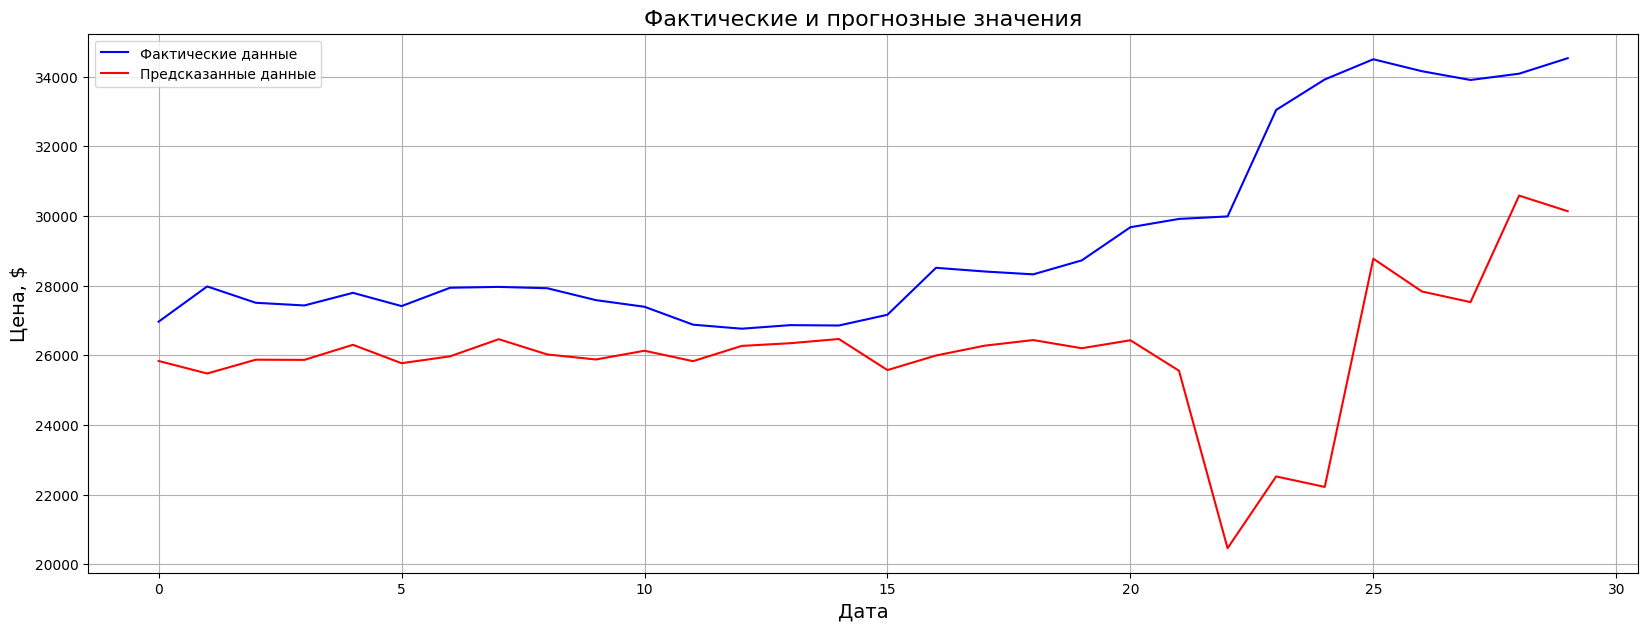

In [15]:
plt.figure(figsize=(20,7))
plt.plot(forecast_2_real['close'], color = 'blue', label='Фактические данные')
plt.plot(pred, color = 'red', label='Предсказанные данные')
plt.legend()
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена, $', fontsize = 14)
plt.grid()
plt.title('Фактические и прогнозные значения', fontsize = 16)
plt.show()

### test 3 FEDOT


In [16]:
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

In [17]:
train

,date,close,high,low,open,volume
1700,24.05.2017,2445.3,2272.6,2497.0,2263.3,149260.0
1701,25.05.2017,2307.2,2445.3,2781.8,2210.5,248440.0
1702,26.05.2017,2244.9,2307.0,2616.5,2051.4,191490.0
1703,27.05.2017,2052.4,2244.9,2322.4,1868.6,222950.0
1704,28.05.2017,2189.0,2052.4,2300.5,2051.1,125000.0
...,...,...,...,...,...,...
4015,25.09.2023,26302.7,26251.6,26423.6,26013.6,38200.0
4016,26.09.2023,26218.9,26303.1,26396.2,26093.4,26410.0
4017,27.09.2023,26366.1,26218.9,26836.9,26109.1,50800.0
4018,28.09.2023,27022.6,26368.2,27283.6,26339.4,64560.0


In [18]:
train_fedot = train.drop(['date'], axis=1)

In [19]:
task = Task(TaskTypesEnum.ts_forecasting,
            TsForecastingParams(forecast_length=30))

In [20]:
input_data = InputData(idx=np.arange(len(train)),
                       features=train_fedot.drop('close', axis=1).values,
                       target=train_fedot['close'].values,
                       task=task,
                       data_type=DataTypesEnum.ts)

In [21]:
model_fedot = Fedot(
    problem='ts_forecasting', 
    task_params=task.task_params,
    timeout=30,  # time in minutes
    n_jobs=-1,  # use all cores
    cv_folds=3,  # number of folds for cross-validation
    preset='light_tun'  # try a different preset
)

In [22]:
pipeline = model_fedot.fit(input_data)

2025-05-02 17:14:14,465 - Extra dependencies for time series forecasting are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:14,561 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:14,600 - LaggedTransformationImplementation - Window size of lagged transformation was changed by WindowSizeSelector from 0 to 778
2025-05-02 17:14:16,219 - ApiComposer - Initial pipeline was fitted in 1.6 sec.
2025-05-02 17:14:16,220 - ApiComposer - Taking into account n_folds=3, estimated fit time for initial assumption is 4.9 sec.
2025-05-02 17:14:16,222 - Extra dependencies for time series forecasting are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:16,227 - Extra dependencies for time series forecasting are not 

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-05-02 17:14:27,775 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:27,775 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:27,775 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:27,775 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-02 17:14:27,797 - LaggedTransformationImplementation - Window size of lagged transformation was changed by Windo

Generations:   0%|          | 0/10000 [00:26<?, ?gen/s]

2025-05-02 17:14:43,269 - ApiComposer - Hyperparameters tuning started with 30 min. timeout


2025-05-02 17:14:45,039 - SimultaneousTuner - Initial graph: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {}
lagged - {'window_size': 226.17981309136192} 
Initial metric: [152959.526]
  1%|          | 1207/100000 [29:29<40:13:51,  1.47s/trial, best loss: 18732.57867136427]
2025-05-02 17:44:15,691 - SimultaneousTuner - Final graph: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 9.96711805589419}
lagged - {'window_size': 20}
2025-05-02 17:44:15,694 - SimultaneousTuner - Final metric: 18732.579
2025-05-02 17:44:15,714 - ApiComposer - Hyperparameters tuning finished
2025-05-02 17:44:15,986 - ApiComposer - Model generation finished
2025-05-02 17:44:16,205 - FEDOT logger - Final pipeline was fitted
2025-05-02 17:44:16,217 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 9.96711805589419}
lagged - {'window_size': 20}


In [32]:
pipeline.print_structure()

Pipeline structure:
{'depth': 2, 'length': 2, 'nodes': [ridge, lagged]}
ridge - {'alpha': 9.96711805589419}
lagged - {'window_size': 20}


In [24]:
forecast_fedot = pipeline.predict(input_data)

In [25]:
forecast_fedot = pd.DataFrame(forecast_fedot.predict).reset_index(drop=True)


In [26]:
forecast_fedot

,0
0,26841.449112
1,26748.887326
2,26877.760511
3,26647.045973
4,26452.110926
5,26235.036895
6,26191.097598
7,26138.195243
8,26243.287830
9,26196.353343


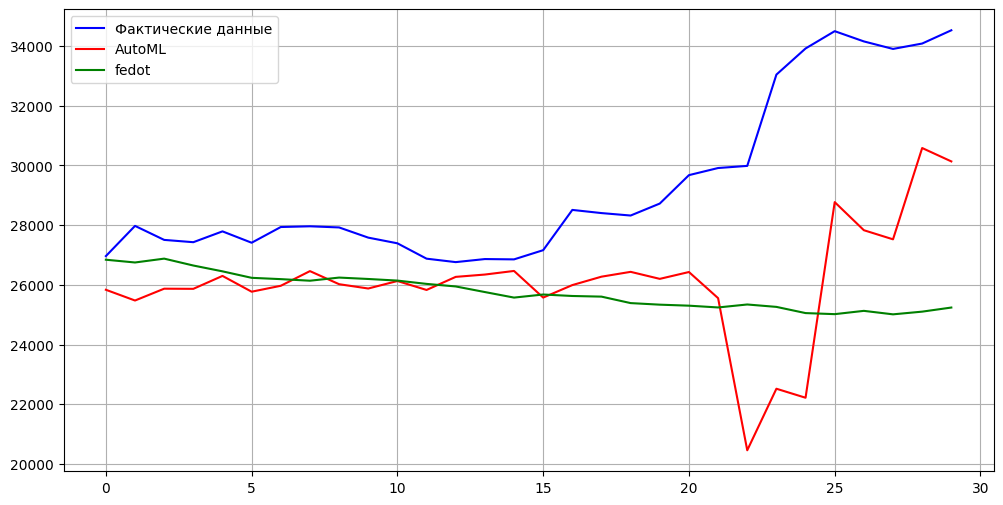

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_2_real['close'], color = 'blue', label='Фактические данные')
plt.plot(pred, color = 'red', label='AutoML')
plt.plot(forecast_fedot, color = 'green', label='fedot')
plt.legend()
plt.grid()
plt.show()